# Initialize

In [5]:
%reset -f
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import math
import itertools
from scipy import stats
from scipy.stats import beta
from scipy import sparse
from scipy.stats import pearsonr

plt.rc('font', size=16)
mycolor1 = [0.368417, 0.506779, 0.709798]
mycolor2 = [0.880722, 0.611041, 0.142051]
mycolor3 = [0.560181, 0.691569, 0.194885]
mycolor4 = [0.922526, 0.385626, 0.209179]
mycolor5 = [0.528488, 0.470624, 0.701351]
mycolor6 = [0.772079, 0.431554, 0.102387]
mycolor7 = [0.363898, 0.618501, 0.782349]
mycolor8 = [1, 0.75, 0]
mycolor9 = [0.647624, 0.37816, 0.614037]
mycolor10 = [0.571589, 0.586483, 0.]

N = 500

import time
from tqdm import tqdm
import csv

In [6]:
gamma_list = [0, .3, .6, 1, 5]
beta_list = [0, .4, .8, 1, 2, 5]
rho_list = [0, .1, .3, .5, .7, .9]
sigma_list = [.25, .5, 1, 2, 4]

# Import Data

In [7]:
df = pd.read_csv('data_for_stata.csv')

# Plots

## Functions

In [8]:
def series_df(regime, cond, y):
    if cond == '':
        return df.loc[
        (df['formatted_regime'] == regime)
            ][y]
    else:
        return df.loc[
        (df['formatted_regime'] == regime) & eval(cond)
            ][y]
def mean_df(regime, cond, x, y):
    if x != "":
        if cond == '':
            return df.loc[
            (df['formatted_regime'] == regime)
                ].groupby([x])[y].mean()
        else:
            return df.loc[
            (df['formatted_regime'] == regime) & eval(cond)
                ].groupby([x])[y].mean()
    else:
        if cond == '':
            return df.loc[
            (df['formatted_regime'] == regime)
                ][y].mean()
        else:
            return df.loc[
            (df['formatted_regime'] == regime) & eval(cond)
                ][y].mean()
def u_ci_df(regime, cond, x, y):
    if cond == '':
        return mean_df(regime, cond, x, y) + 1.96*df.loc[
            (df['formatted_regime'] == regime)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['formatted_regime'] == regime)
            ].groupby([x])[y].count())
    else:
        return mean_df(regime, cond, x, y) + 1.96*df.loc[
            (df['formatted_regime'] == regime) & eval(cond)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['formatted_regime'] == regime) & eval(cond)
            ].groupby([x])[y].count())
def l_ci_df(regime, cond, x, y):
    if cond == '':
        return mean_df(regime, cond, x, y) - 1.96*df.loc[
            (df['formatted_regime'] == regime)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['formatted_regime'] == regime)
            ].groupby([x])[y].count())
    else:
        return mean_df(regime, cond, x, y) - 1.96*df.loc[
            (df['formatted_regime'] == regime) & eval(cond)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['formatted_regime'] == regime) & eval(cond)
            ].groupby([x])[y].count())

# Welfare and $\rho$

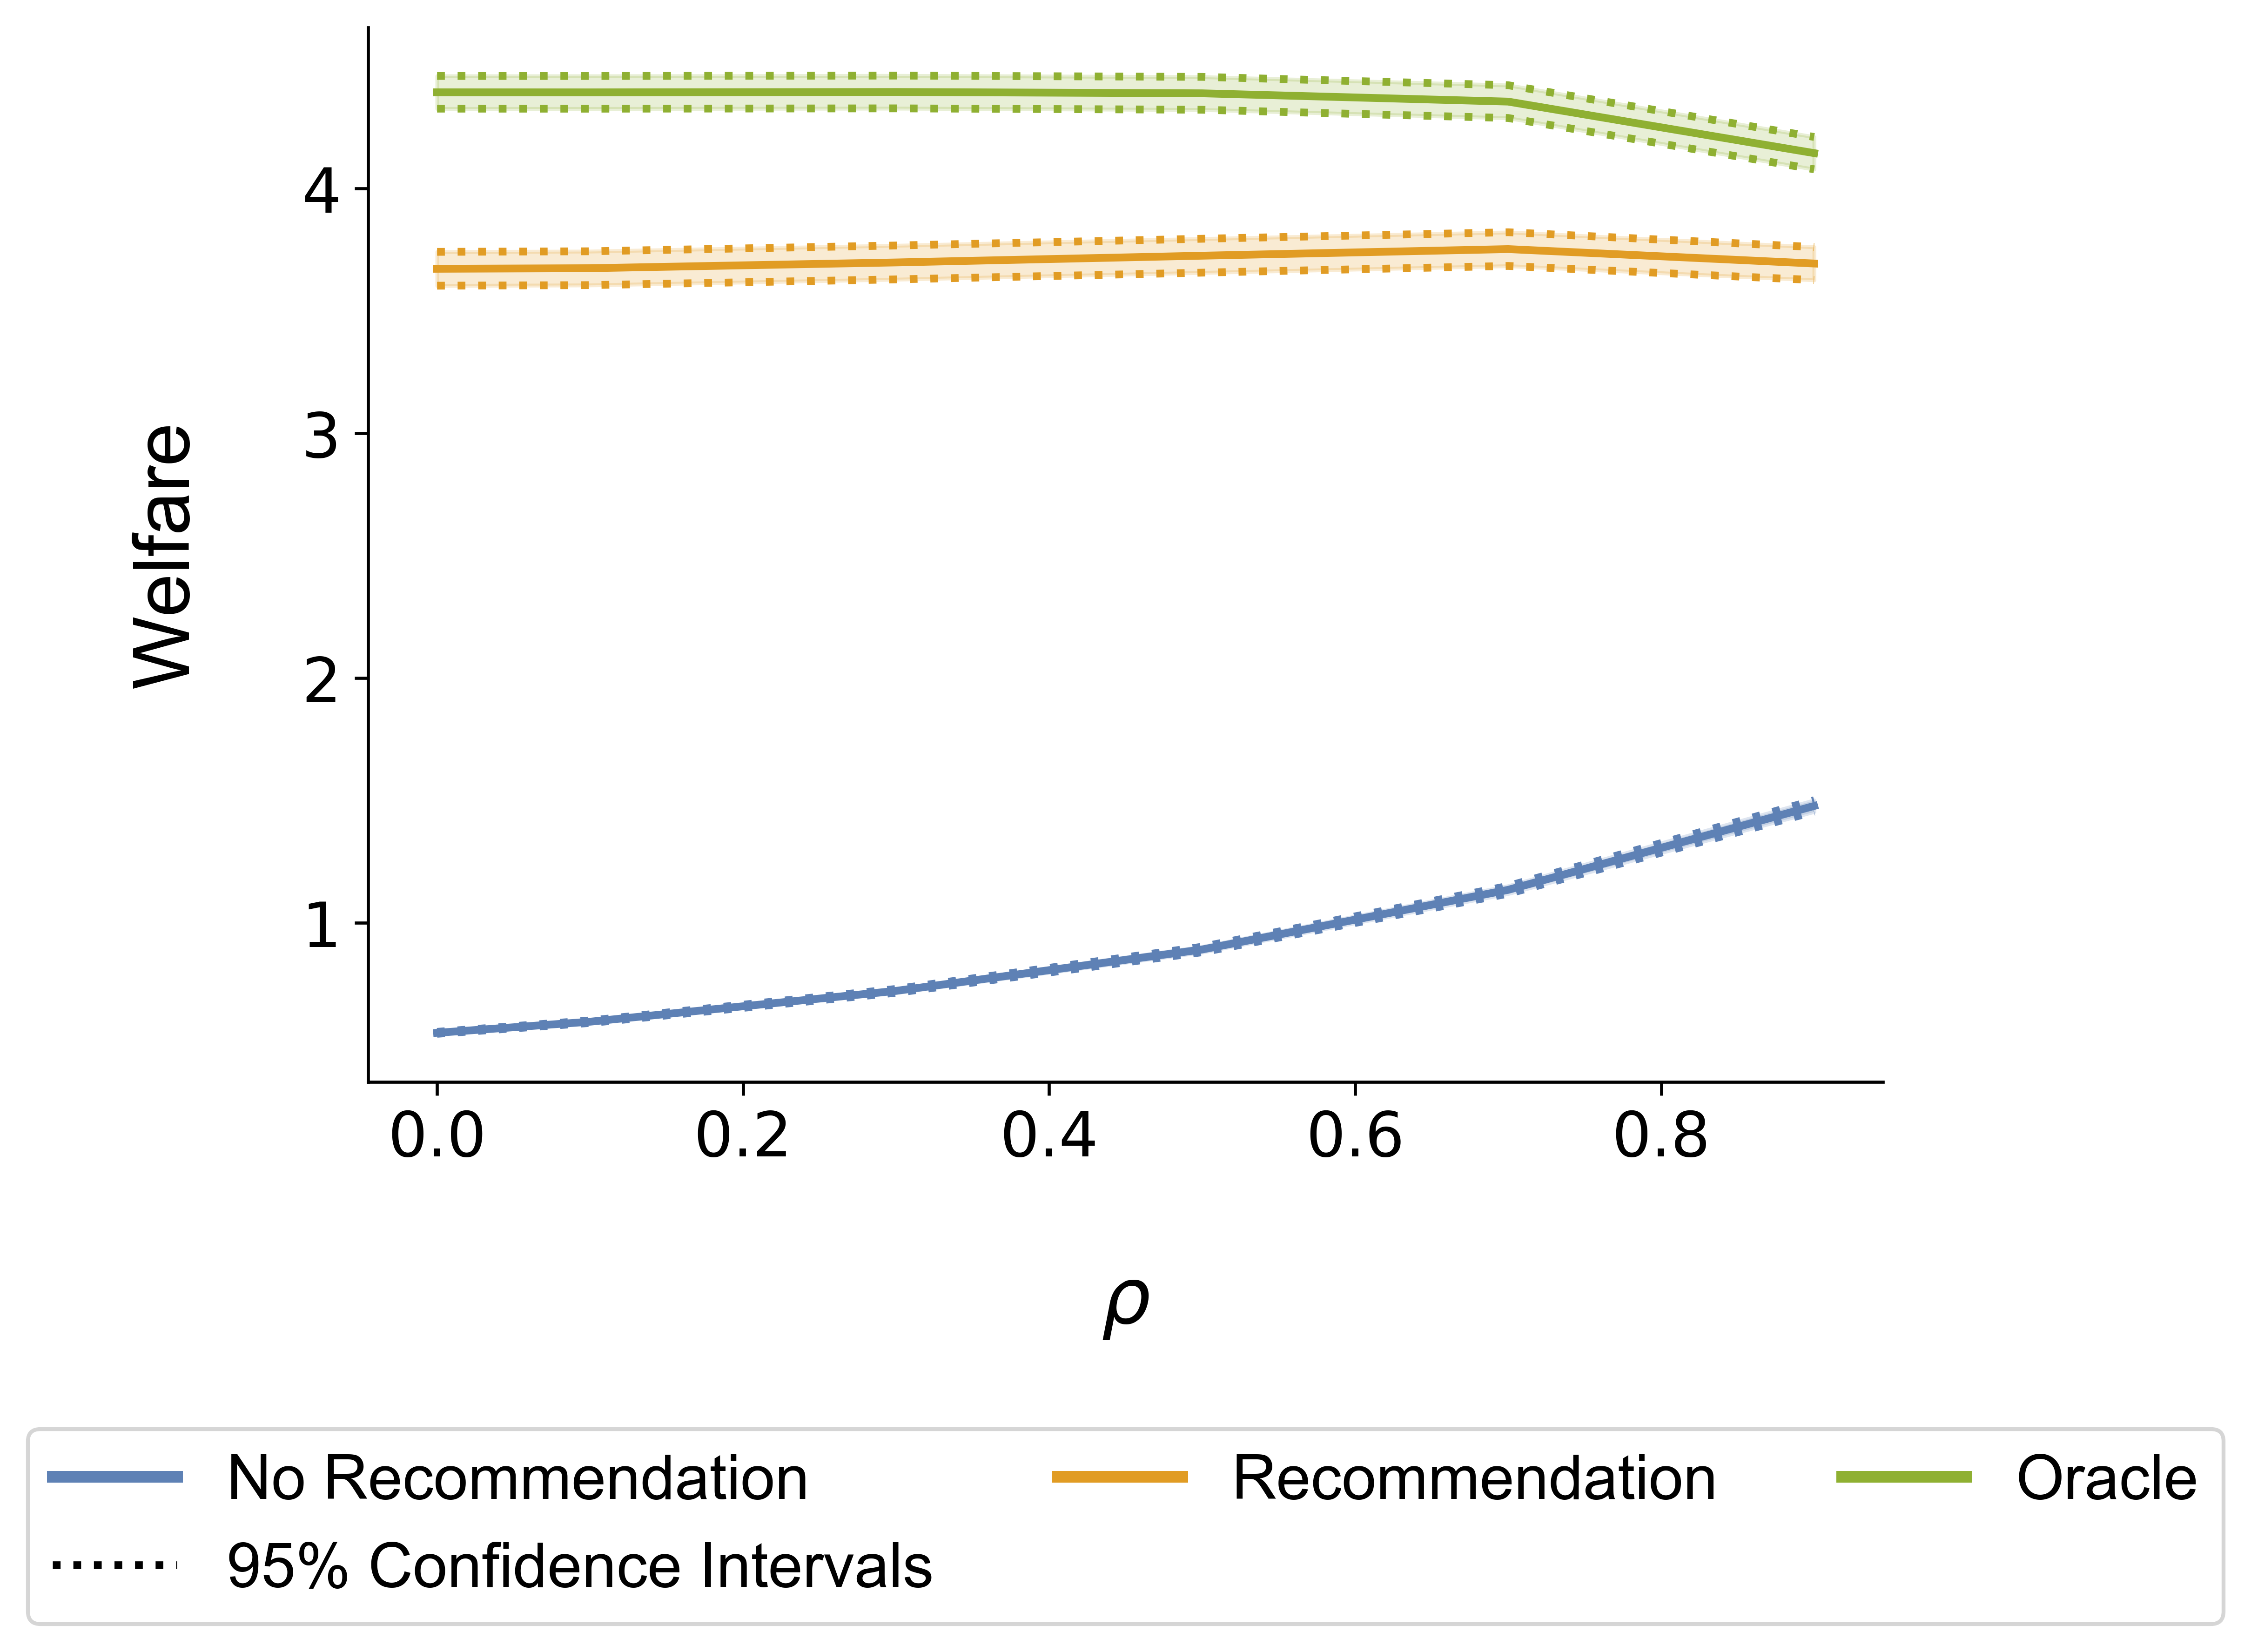

In [9]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df['beta'] != 0)"
x = 'rho'
y = 'pop_welfare_avg'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    df[x].unique(),
    mean_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    df[x].unique(),
    u_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    df[x].unique(),
    l_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('No Rec', cond, x, y),
    u_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    df[x].unique(),
    mean_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    df[x].unique(),
    u_ci_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    df[x].unique(),
    l_ci_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('Partial', cond, x, y),
    u_ci_df('Partial', cond, x, y),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    df[x].unique(),
    mean_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    df[x].unique(),
    u_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    df[x].unique(),
    l_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('Omniscient', cond, x, y),
    u_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\rho$', **cfont, fontsize=20)
plt.ylabel('Welfare' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
    '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_welfare_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

# Welfare and $\sigma$

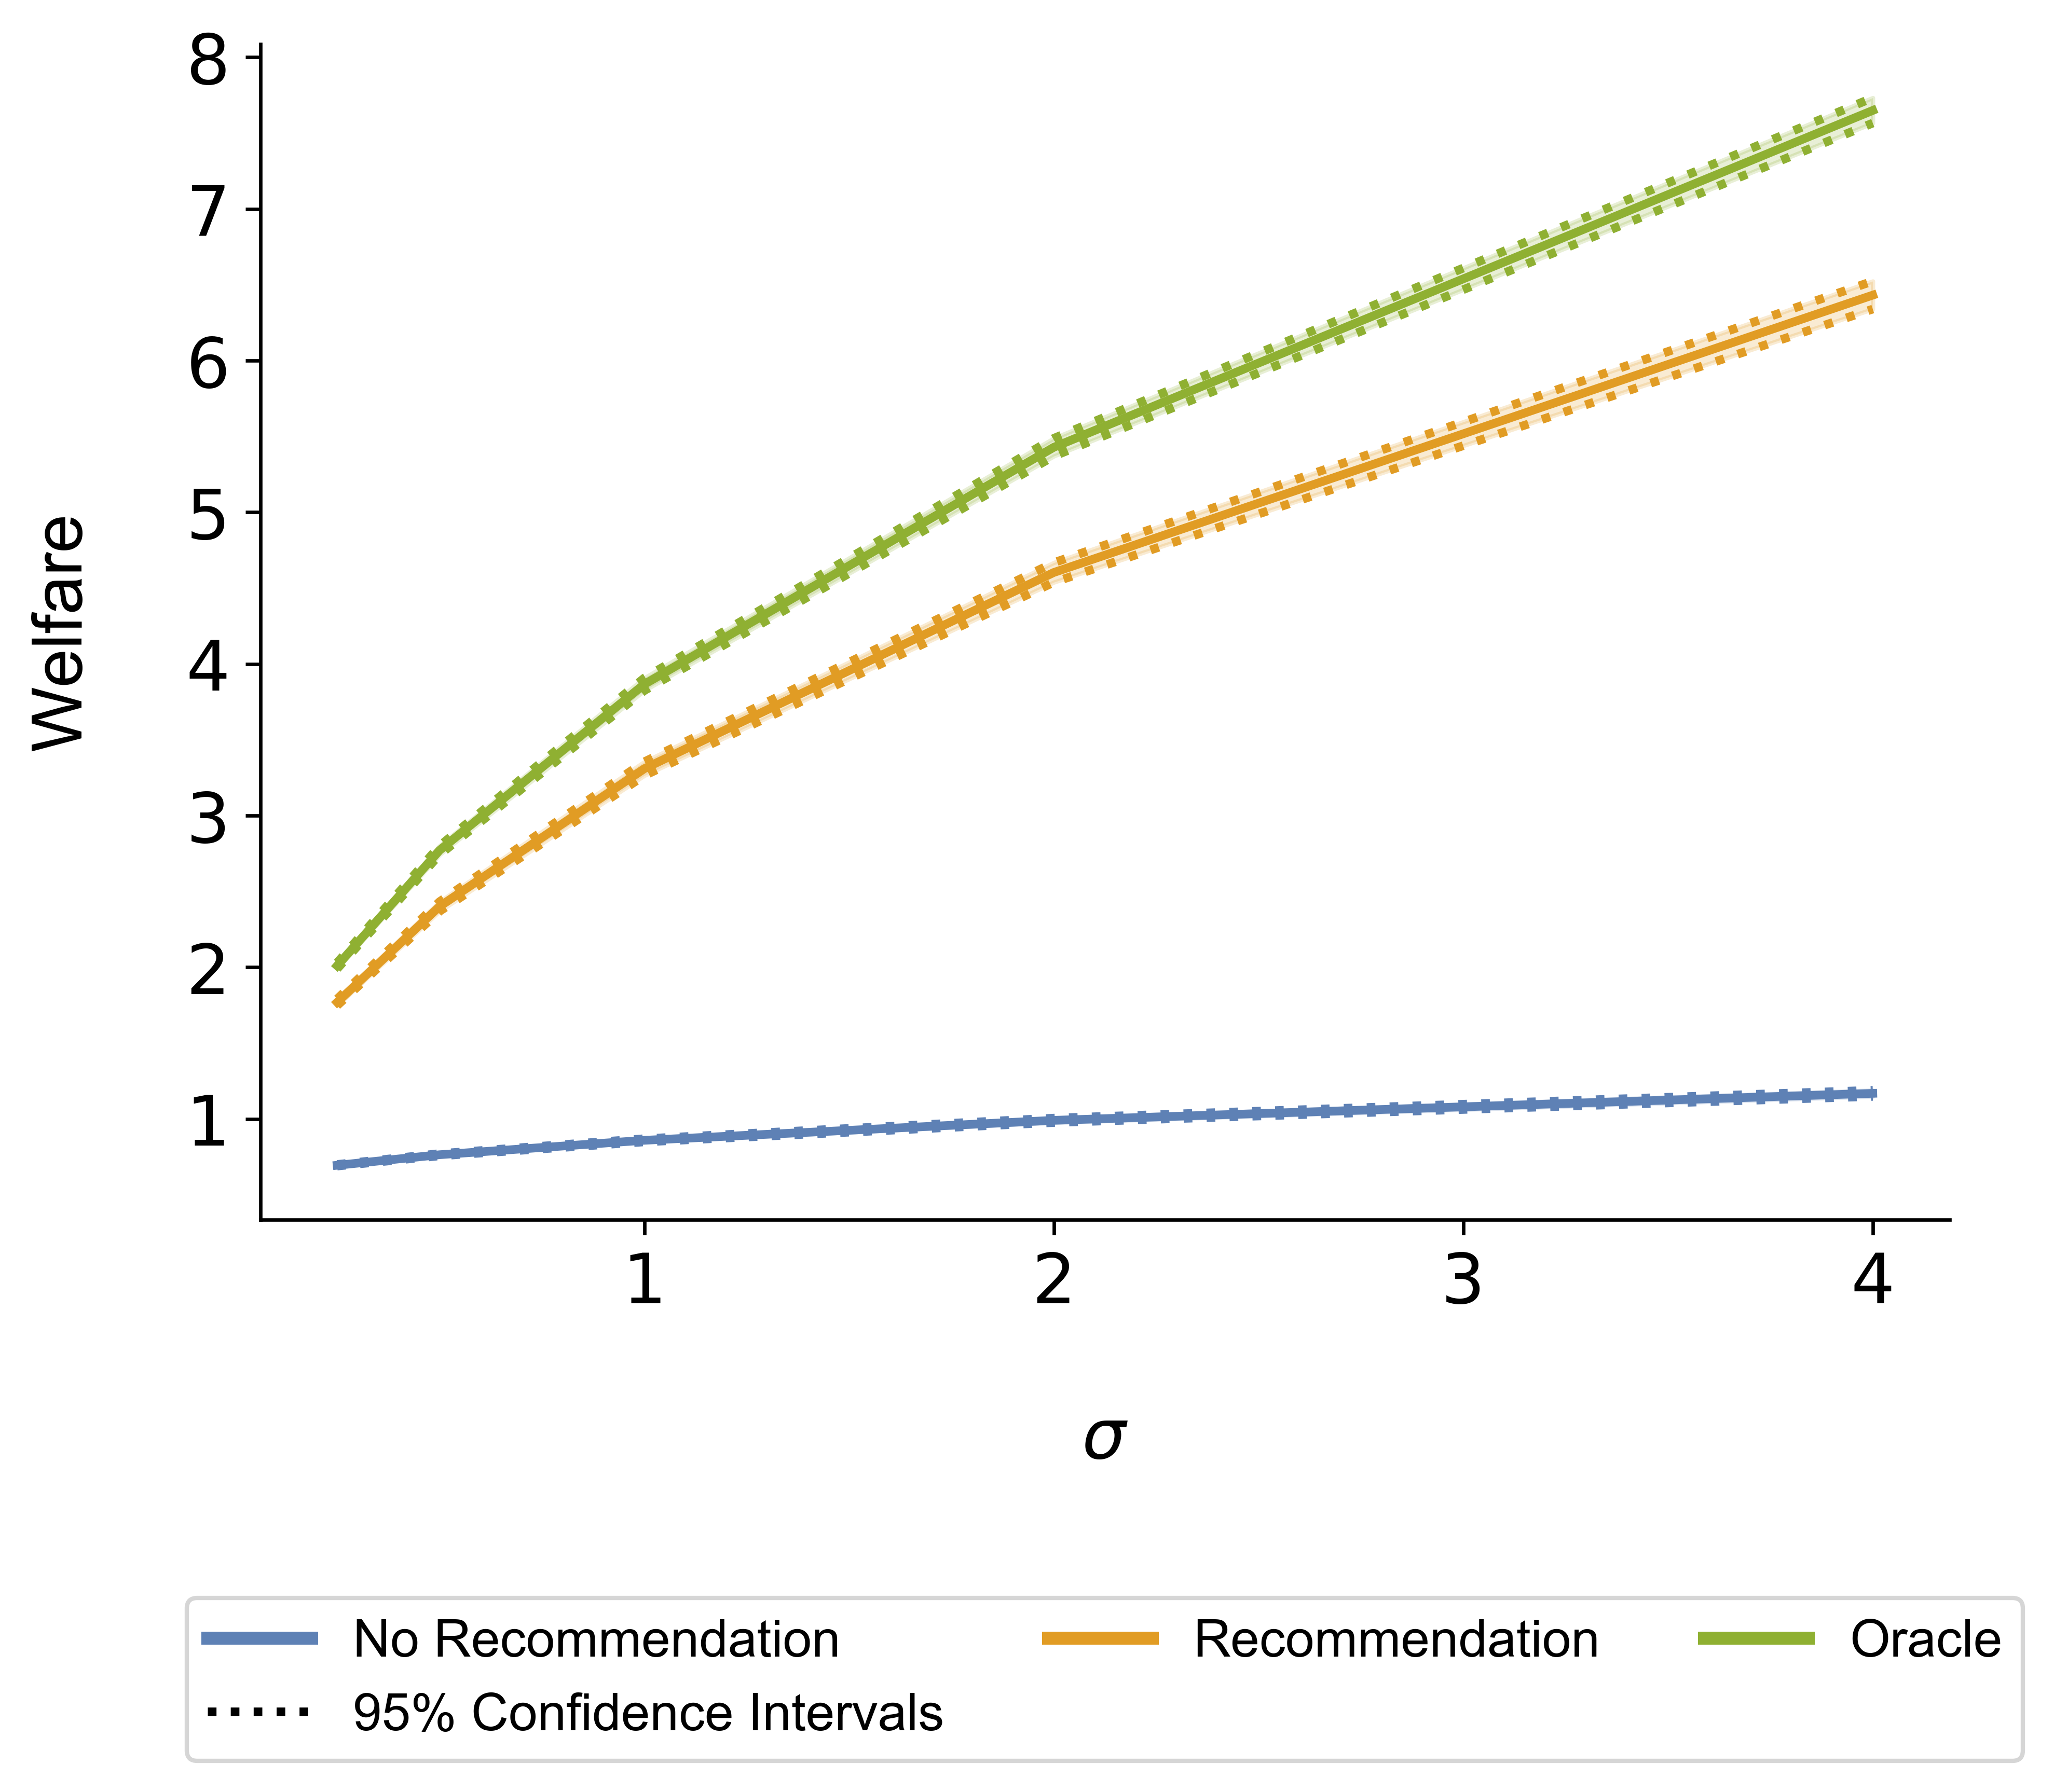

In [10]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df['beta'] != 0)"
x = 'sigma'
y = 'pop_welfare_avg'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    df[x].unique(),
    mean_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    df[x].unique(),
    u_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    df[x].unique(),
    l_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('No Rec', cond, x, y),
    u_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    df[x].unique(),
    mean_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    df[x].unique(),
    u_ci_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    df[x].unique(),
    l_ci_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('Partial', cond, x, y),
    u_ci_df('Partial', cond, x, y),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    df[x].unique(),
    mean_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    df[x].unique(),
    u_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    df[x].unique(),
    l_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('Omniscient', cond, x, y),
    u_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\sigma$', **cfont, fontsize=16)
plt.ylabel('Welfare' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
    '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/sigma_welfare_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

# Diversity and $\rho$

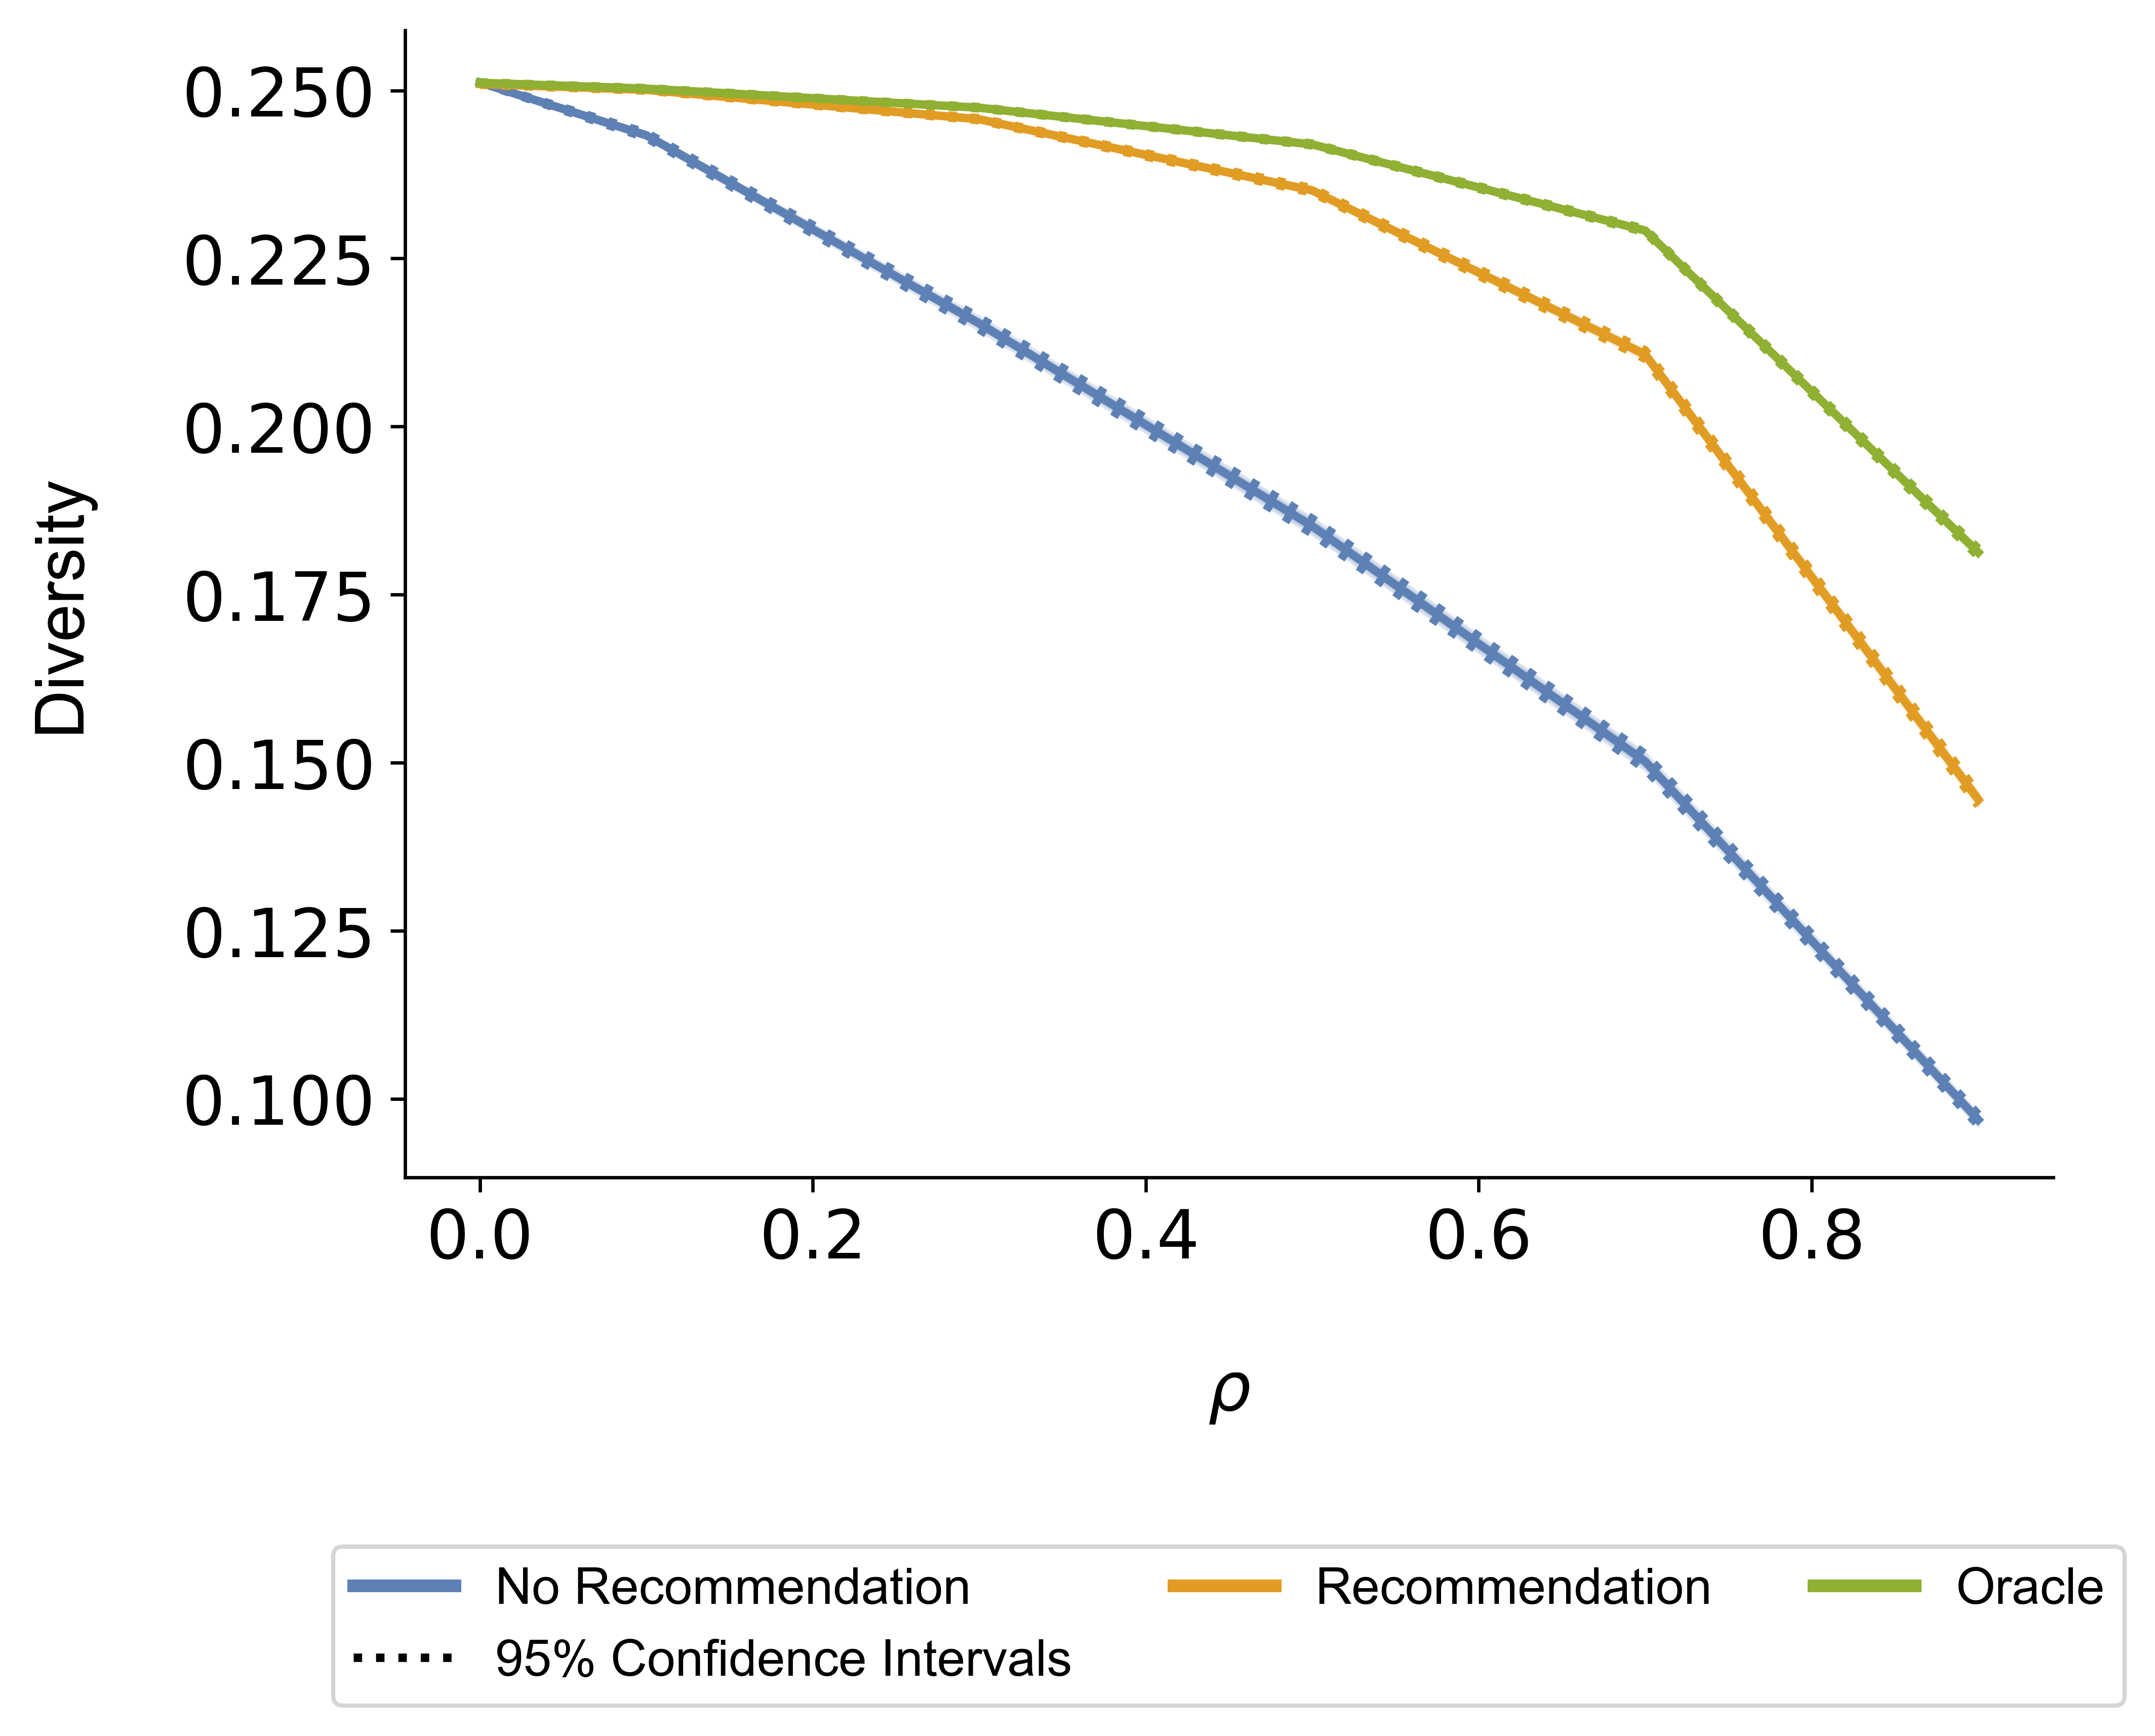

In [11]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df['beta'] != 0)"
x = 'rho'
y = 'pop_diversity_avg'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    df[x].unique(),
    mean_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    df[x].unique(),
    u_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    df[x].unique(),
    l_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('No Rec', cond, x, y),
    u_ci_df('No Rec', cond, x, y),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    df[x].unique(),
    mean_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    df[x].unique(),
    u_ci_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    df[x].unique(),
    l_ci_df('Partial', cond, x, y),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('Partial', cond, x, y),
    u_ci_df('Partial', cond, x, y),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    df[x].unique(),
    mean_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    df[x].unique(),
    u_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    df[x].unique(),
    l_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    df[x].unique(),
    l_ci_df('Omniscient', cond, x, y),
    u_ci_df('Omniscient', cond, x, y),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\rho$', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
    '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_diversity_N_200_T_20.pdf",
    bbox_inches="tight"
)

## Welfare and Diversity over $\rho$

In [12]:
gamma_list = [0, .3, .6, 1, 5]
beta_list = [0, .4, .8, 1, 2, 5]
rho_list = [0, .1, .3, .5, .7, .9]
sigma_list = [.25, .5, 1, 2, 4]

In [13]:
x = 'pop_welfare_avg'
y = 'pop_diversity_avg'
corr = []
for regime in ['No Rec', 'Partial', 'Omniscient']:
    for g in gamma_list:
        for b in beta_list:
            for r in rho_list:
                for s in sigma_list:
                    corr_it = pearsonr(
                        series_df(
                            regime,
                            "(df['gamma'] == g) & (df['beta'] == b) & (df['sigma'] == s) & (df['rho'] == r)",
                            x),
                        series_df(
                            regime,
                            "(df['gamma'] == g) & (df['beta'] == b) & (df['sigma'] == s) & (df['rho'] == r)",
                            y)
                        )[0]
                    corr += [[corr_it, regime, g, b, r, s]]

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [14]:
dfc = pd.DataFrame(corr, columns = ['corr', 'regime', 'gamma', 'beta', 'rho', 'sigma'])  

In [15]:
dfc.loc[(dfc['rho']>0) & (dfc['corr']<-0.01) & (dfc['gamma']==5) & (dfc['regime'] == 'No Rec')]


corr  regime  gamma  beta  rho  sigma
725 -0.160767  No Rec    5.0   0.0  0.1   0.25
726 -0.143869  No Rec    5.0   0.0  0.1   0.50
727 -0.154172  No Rec    5.0   0.0  0.1   1.00
728 -0.210728  No Rec    5.0   0.0  0.1   2.00
729 -0.225064  No Rec    5.0   0.0  0.1   4.00
..        ...     ...    ...   ...  ...    ...
879 -0.398009  No Rec    5.0   5.0  0.1   4.00
880 -0.515114  No Rec    5.0   5.0  0.3   0.25
881 -0.392793  No Rec    5.0   5.0  0.3   0.50
882 -0.036876  No Rec    5.0   5.0  0.3   1.00
885 -0.328276  No Rec    5.0   5.0  0.5   0.25

[119 rows x 6 columns]

In [16]:
def mean_bin(x, y, grid, cond, regime):
    to_ret = []
    for it in range(0,len(grid)-1):
        x_it = .5*grid[it] + .5*grid[it+1]
        if cond == '':
            y_it = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        else:
            y_it = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        if y_count > 0:
            to_ret += [[x_it , y_it]]
    return np.array(to_ret).T

def u_bin(x, y, grid, cond, regime):
    to_ret = []
    for it in range(0,len(grid)-1):
        x_it = .5*grid[it] + .5*grid[it+1]
        if cond == '':
            y_it = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].std()
            y_count = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        else:
            y_it = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        if y_count > 0:
            to_ret += [[x_it , y_it+1.96*y_std/np.sqrt(y_count)]]
    return np.array(to_ret).T

def l_bin(x, y, grid, cond, regime):
    to_ret = []
    for it in range(0,len(grid)-1):
        x_it = .5*grid[it] + .5*grid[it+1]
        if cond == '':
            y_it = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].std()
            y_count = df.loc[(df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        else:
            y_it = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[eval(cond) & (df['formatted_regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        if y_count > 0:
            to_ret += [[x_it , y_it-1.96*y_std/np.sqrt(y_count)]]
    return np.array(to_ret).T

In [17]:
def gaussian_kernel(x, x0, h):
    return np.exp(- 0.5 * np.power((x - x0) / h, 2))
def nw(x, xs, ys, h):
    id_list = np.argwhere(1*(abs(xs-np.ones(len(xs))*x)<h)==1)
    ret_num = 0
    ret_den = 0
    for it in id_list:
        ret_num += gaussian_kernel(x, xs[it], h)*ys[it]
        ret_den += gaussian_kernel(x, xs[it], h)
    if (ret_num != 0) and (ret_den >0):
        return float(ret_num/ret_den)
def nw_grid(grid, xs, ys, h):
    return np.array([nw(x, xs, ys, h) for x in grid])
        

In [18]:
def nw_fit(regime, cond, scale, grid, x, y):
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    return x_grid, nw_grid(x_grid, xs, ys, scale*1.06*np.std(xs)*len(xs)**(-.2))
    

    

In [19]:
def lin_fun(x, a, b):
    return a + b * x

def ls_fit(x_data, y_data, x_grid):
    params, params_covariance = scipy.optimize.curve_fit(lin_fun, x_data, y_data,
                                               p0=[2, 2])
    return lin_fun(x_grid, params[0], params[1])

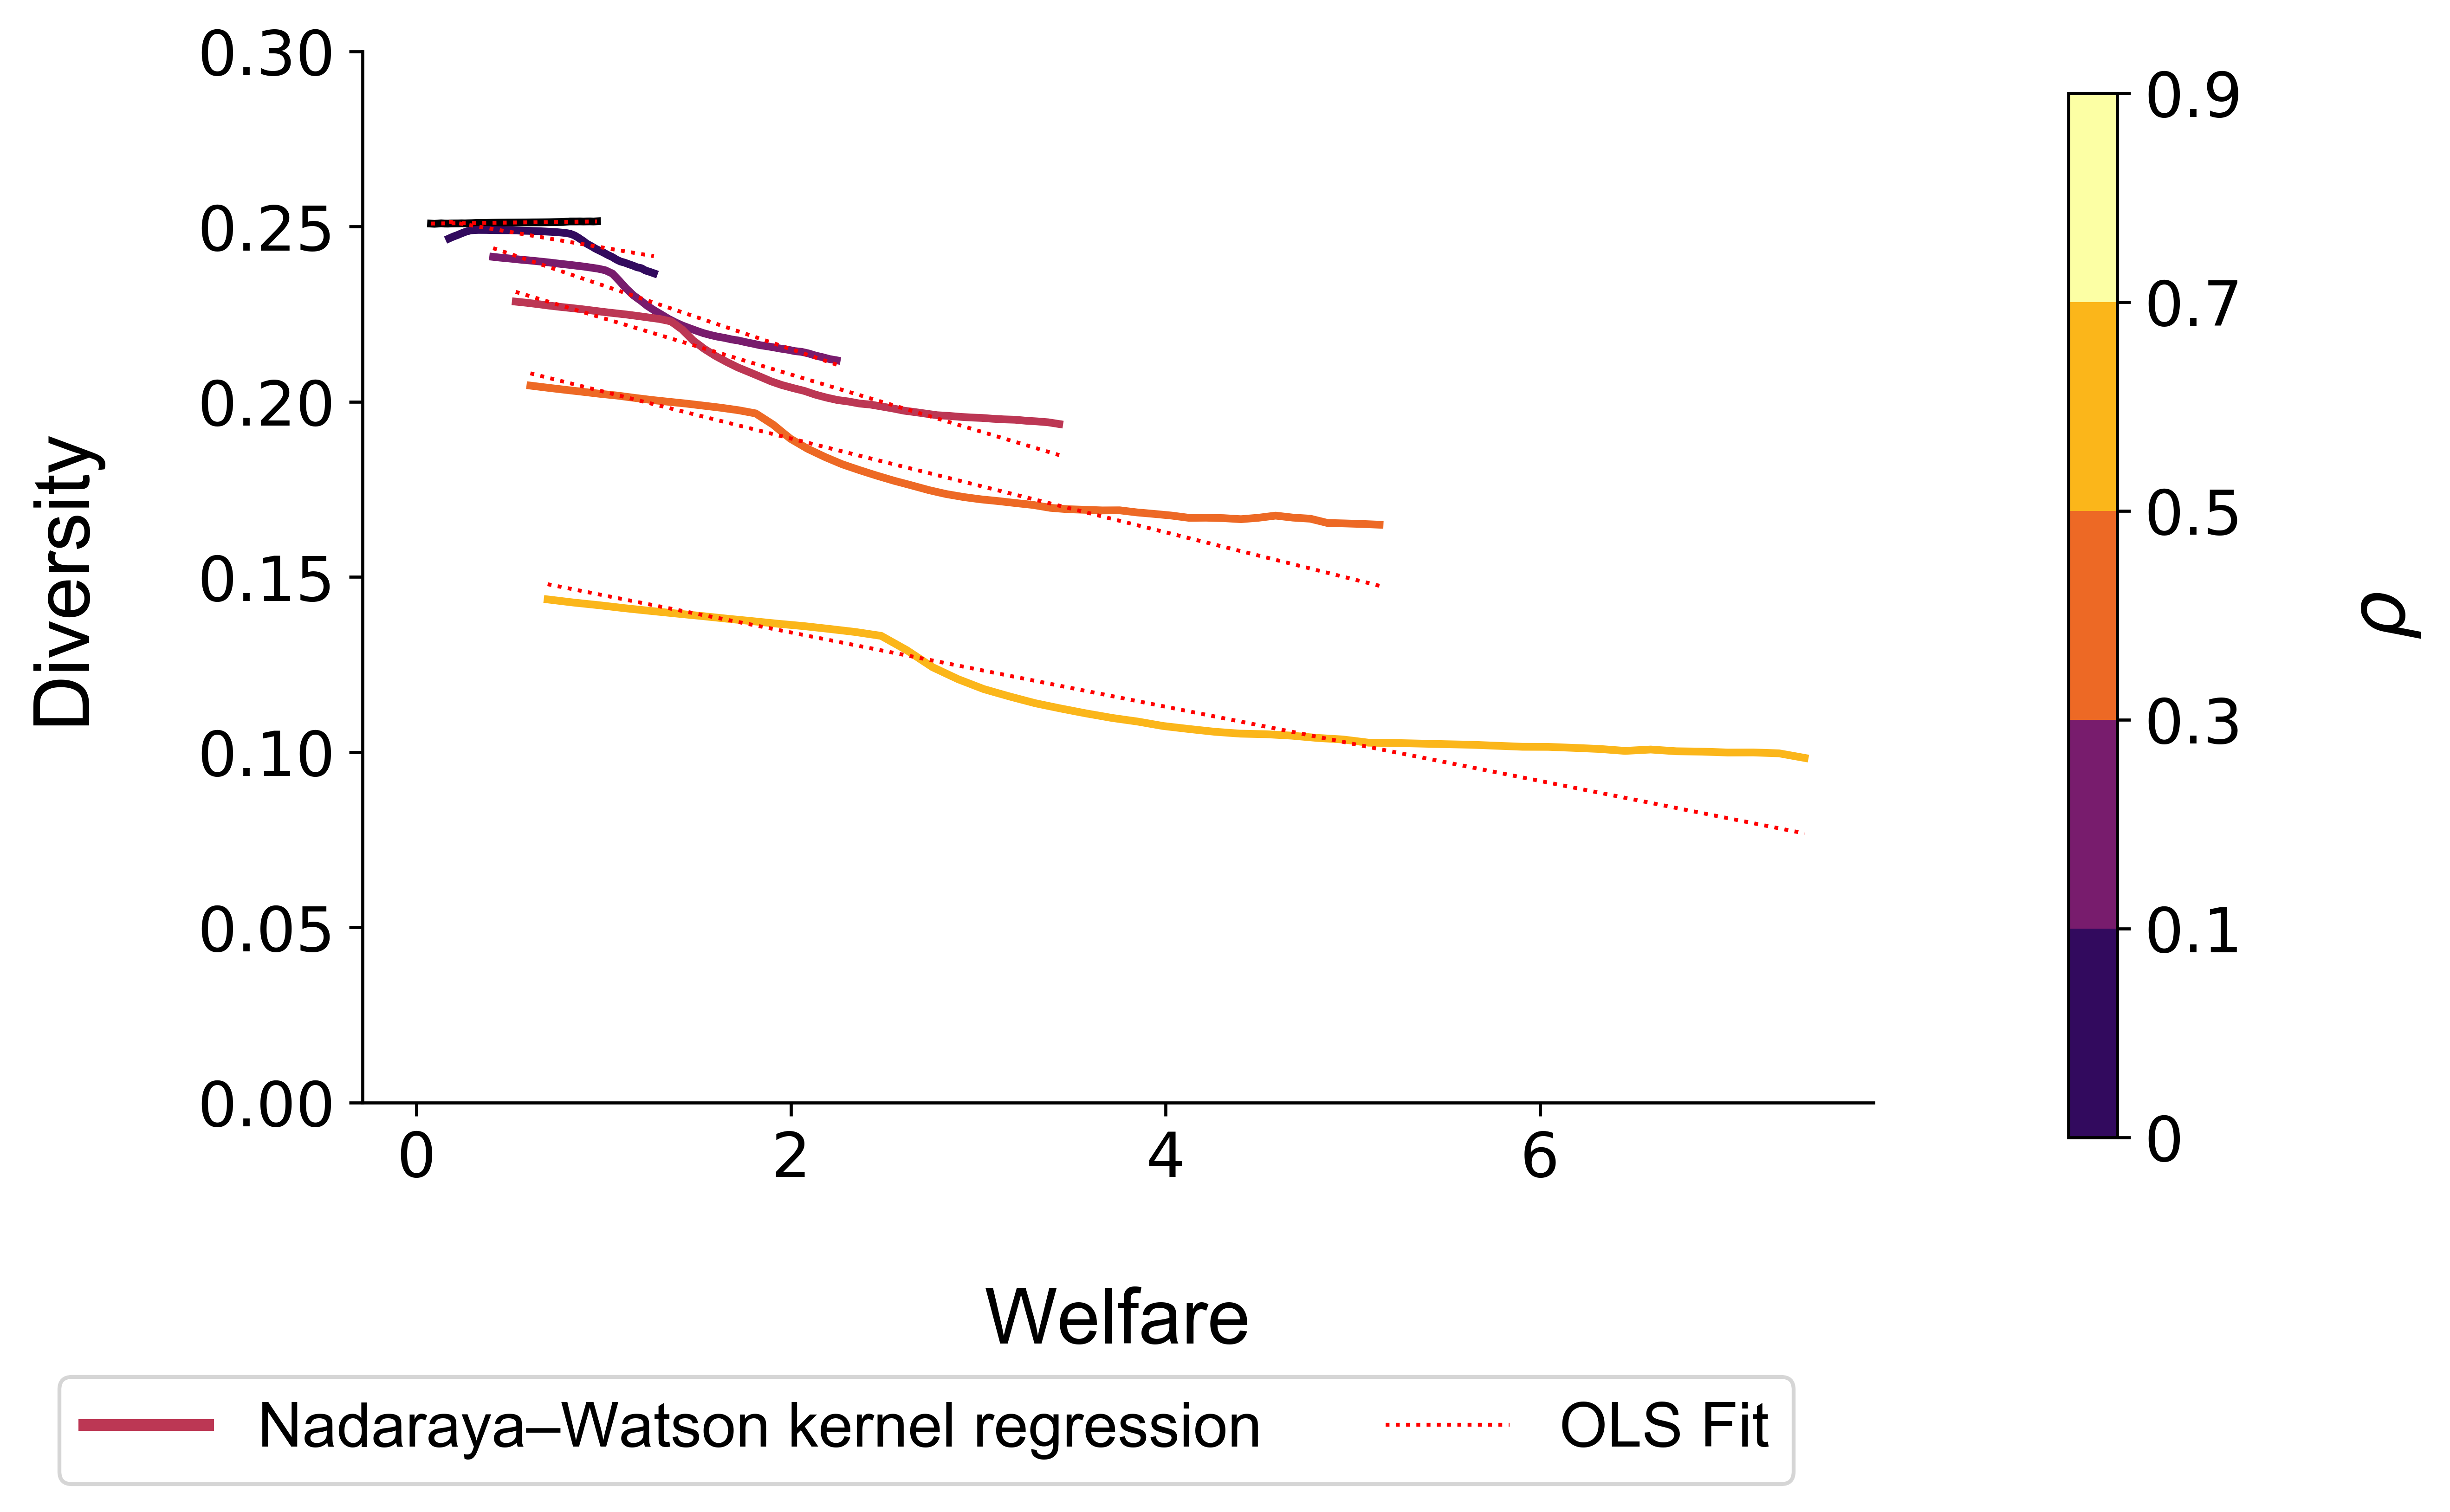

In [20]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df['gamma'] == 0) & (df['rho'] == "+str(rho_list[i])+")"
    regime = 'No Rec'
    x = 'pop_welfare_avg'
    y = 'pop_diversity_avg'
    grid_size = 50
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=20)
plt.ylabel('Diversity' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =20)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn.pdf",
    bbox_inches="tight"
)

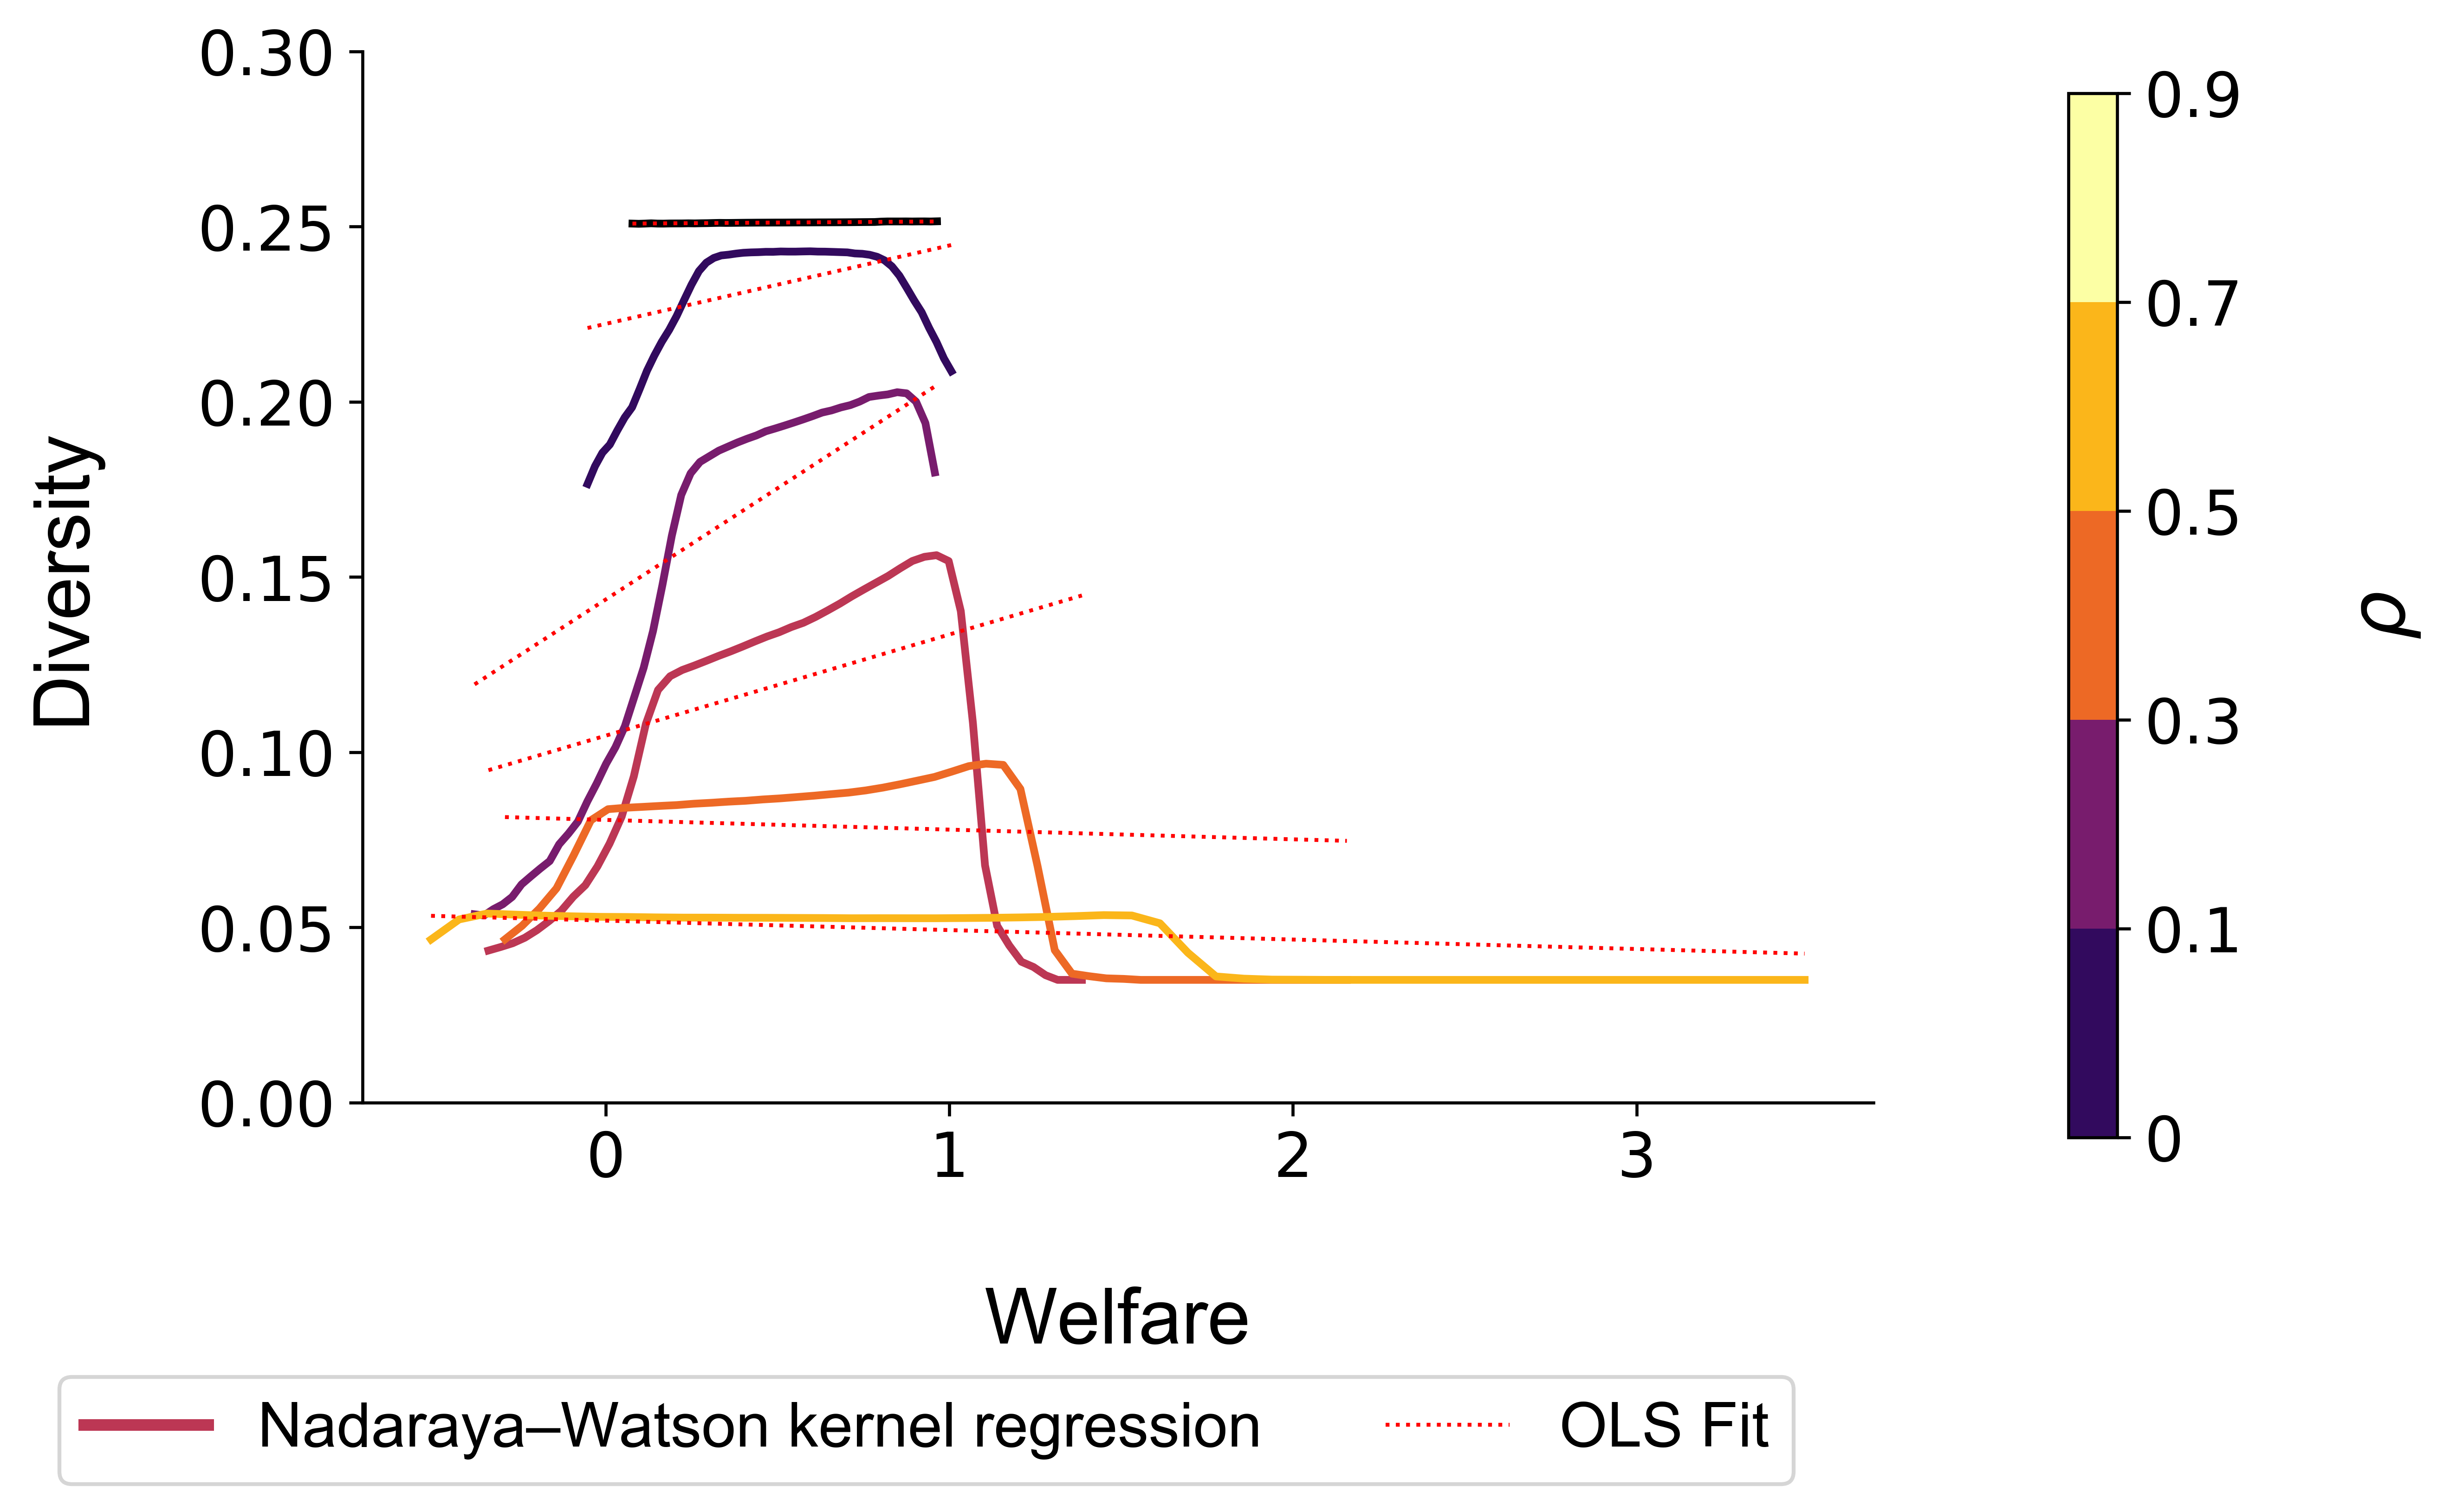

In [21]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df['gamma'] == 5) & (df['rho'] == "+str(rho_list[i])+")"
    regime = 'No Rec'
    x = 'pop_welfare_avg'
    y = 'pop_diversity_avg'
    grid_size = 50
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=20)
plt.ylabel('Diversity' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =20)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_ra.pdf",
    bbox_inches="tight"
)

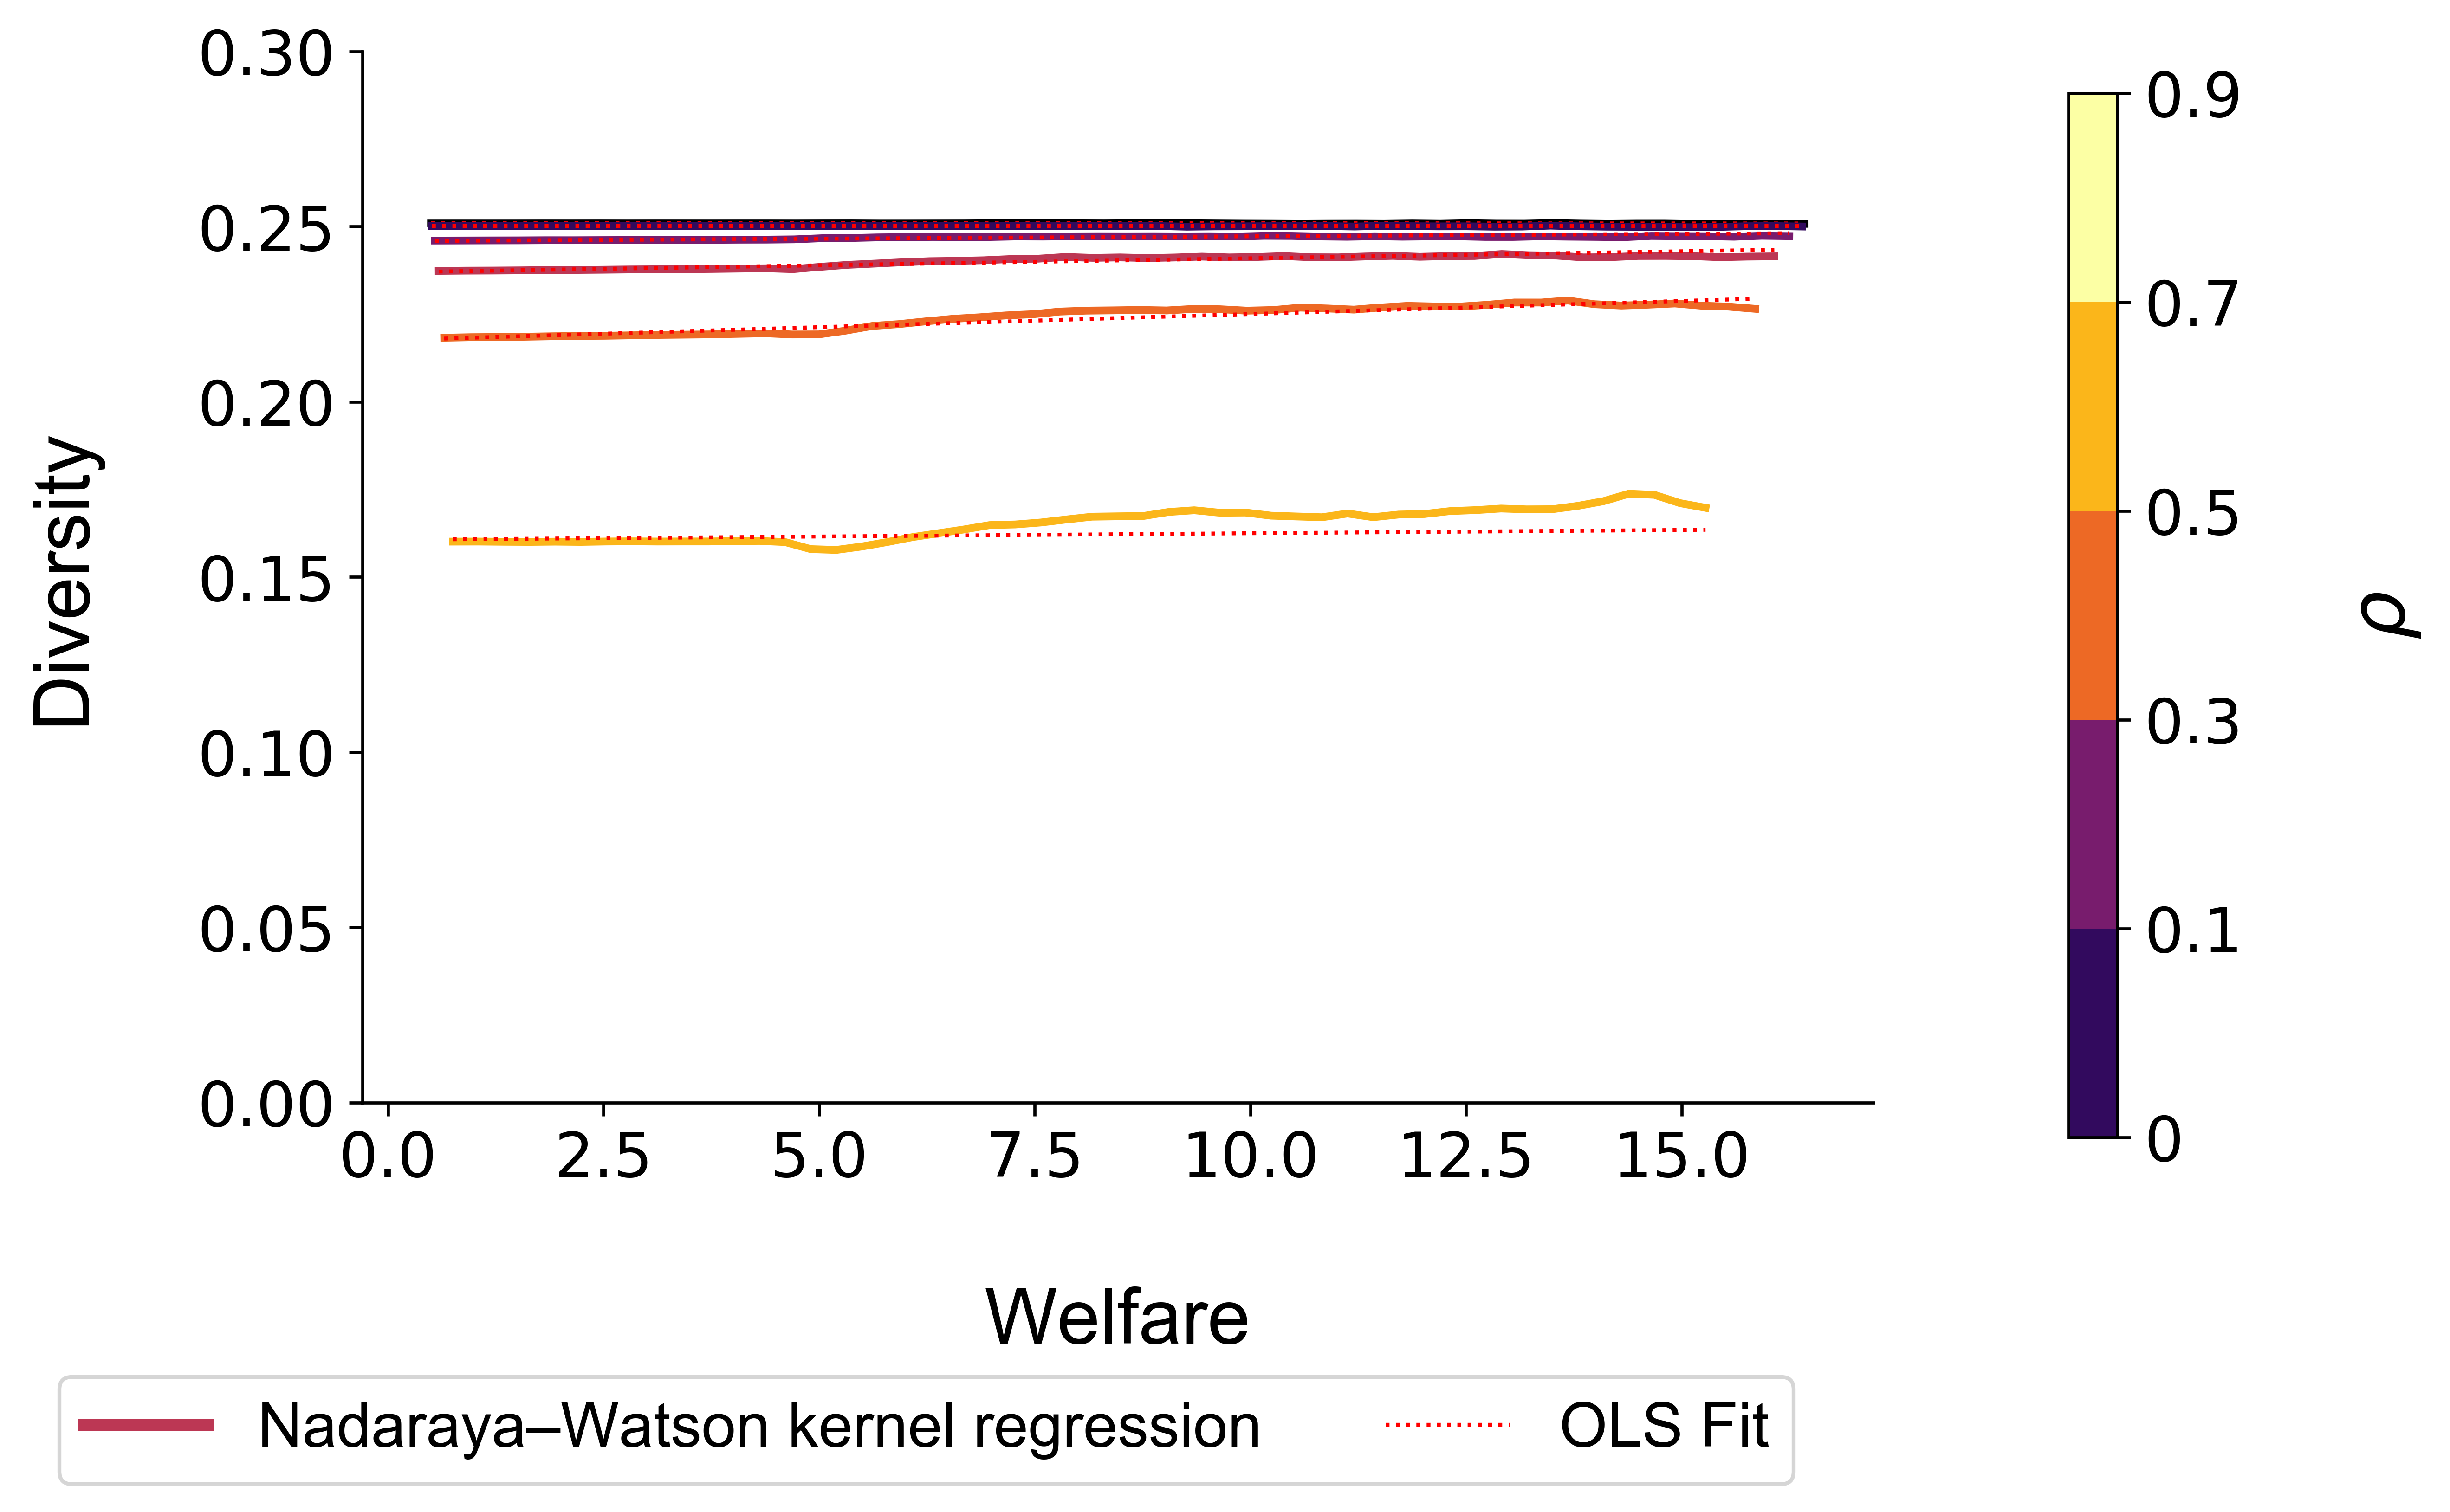

In [22]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df['gamma'] == 0) & (df['rho'] == "+str(rho_list[i])+")"
    regime = 'Partial'
    x = 'pop_welfare_avg'
    y = 'pop_diversity_avg'
    grid_size = 50
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=20)
plt.ylabel('Diversity' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =20)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_partial.pdf",
    bbox_inches="tight"
)

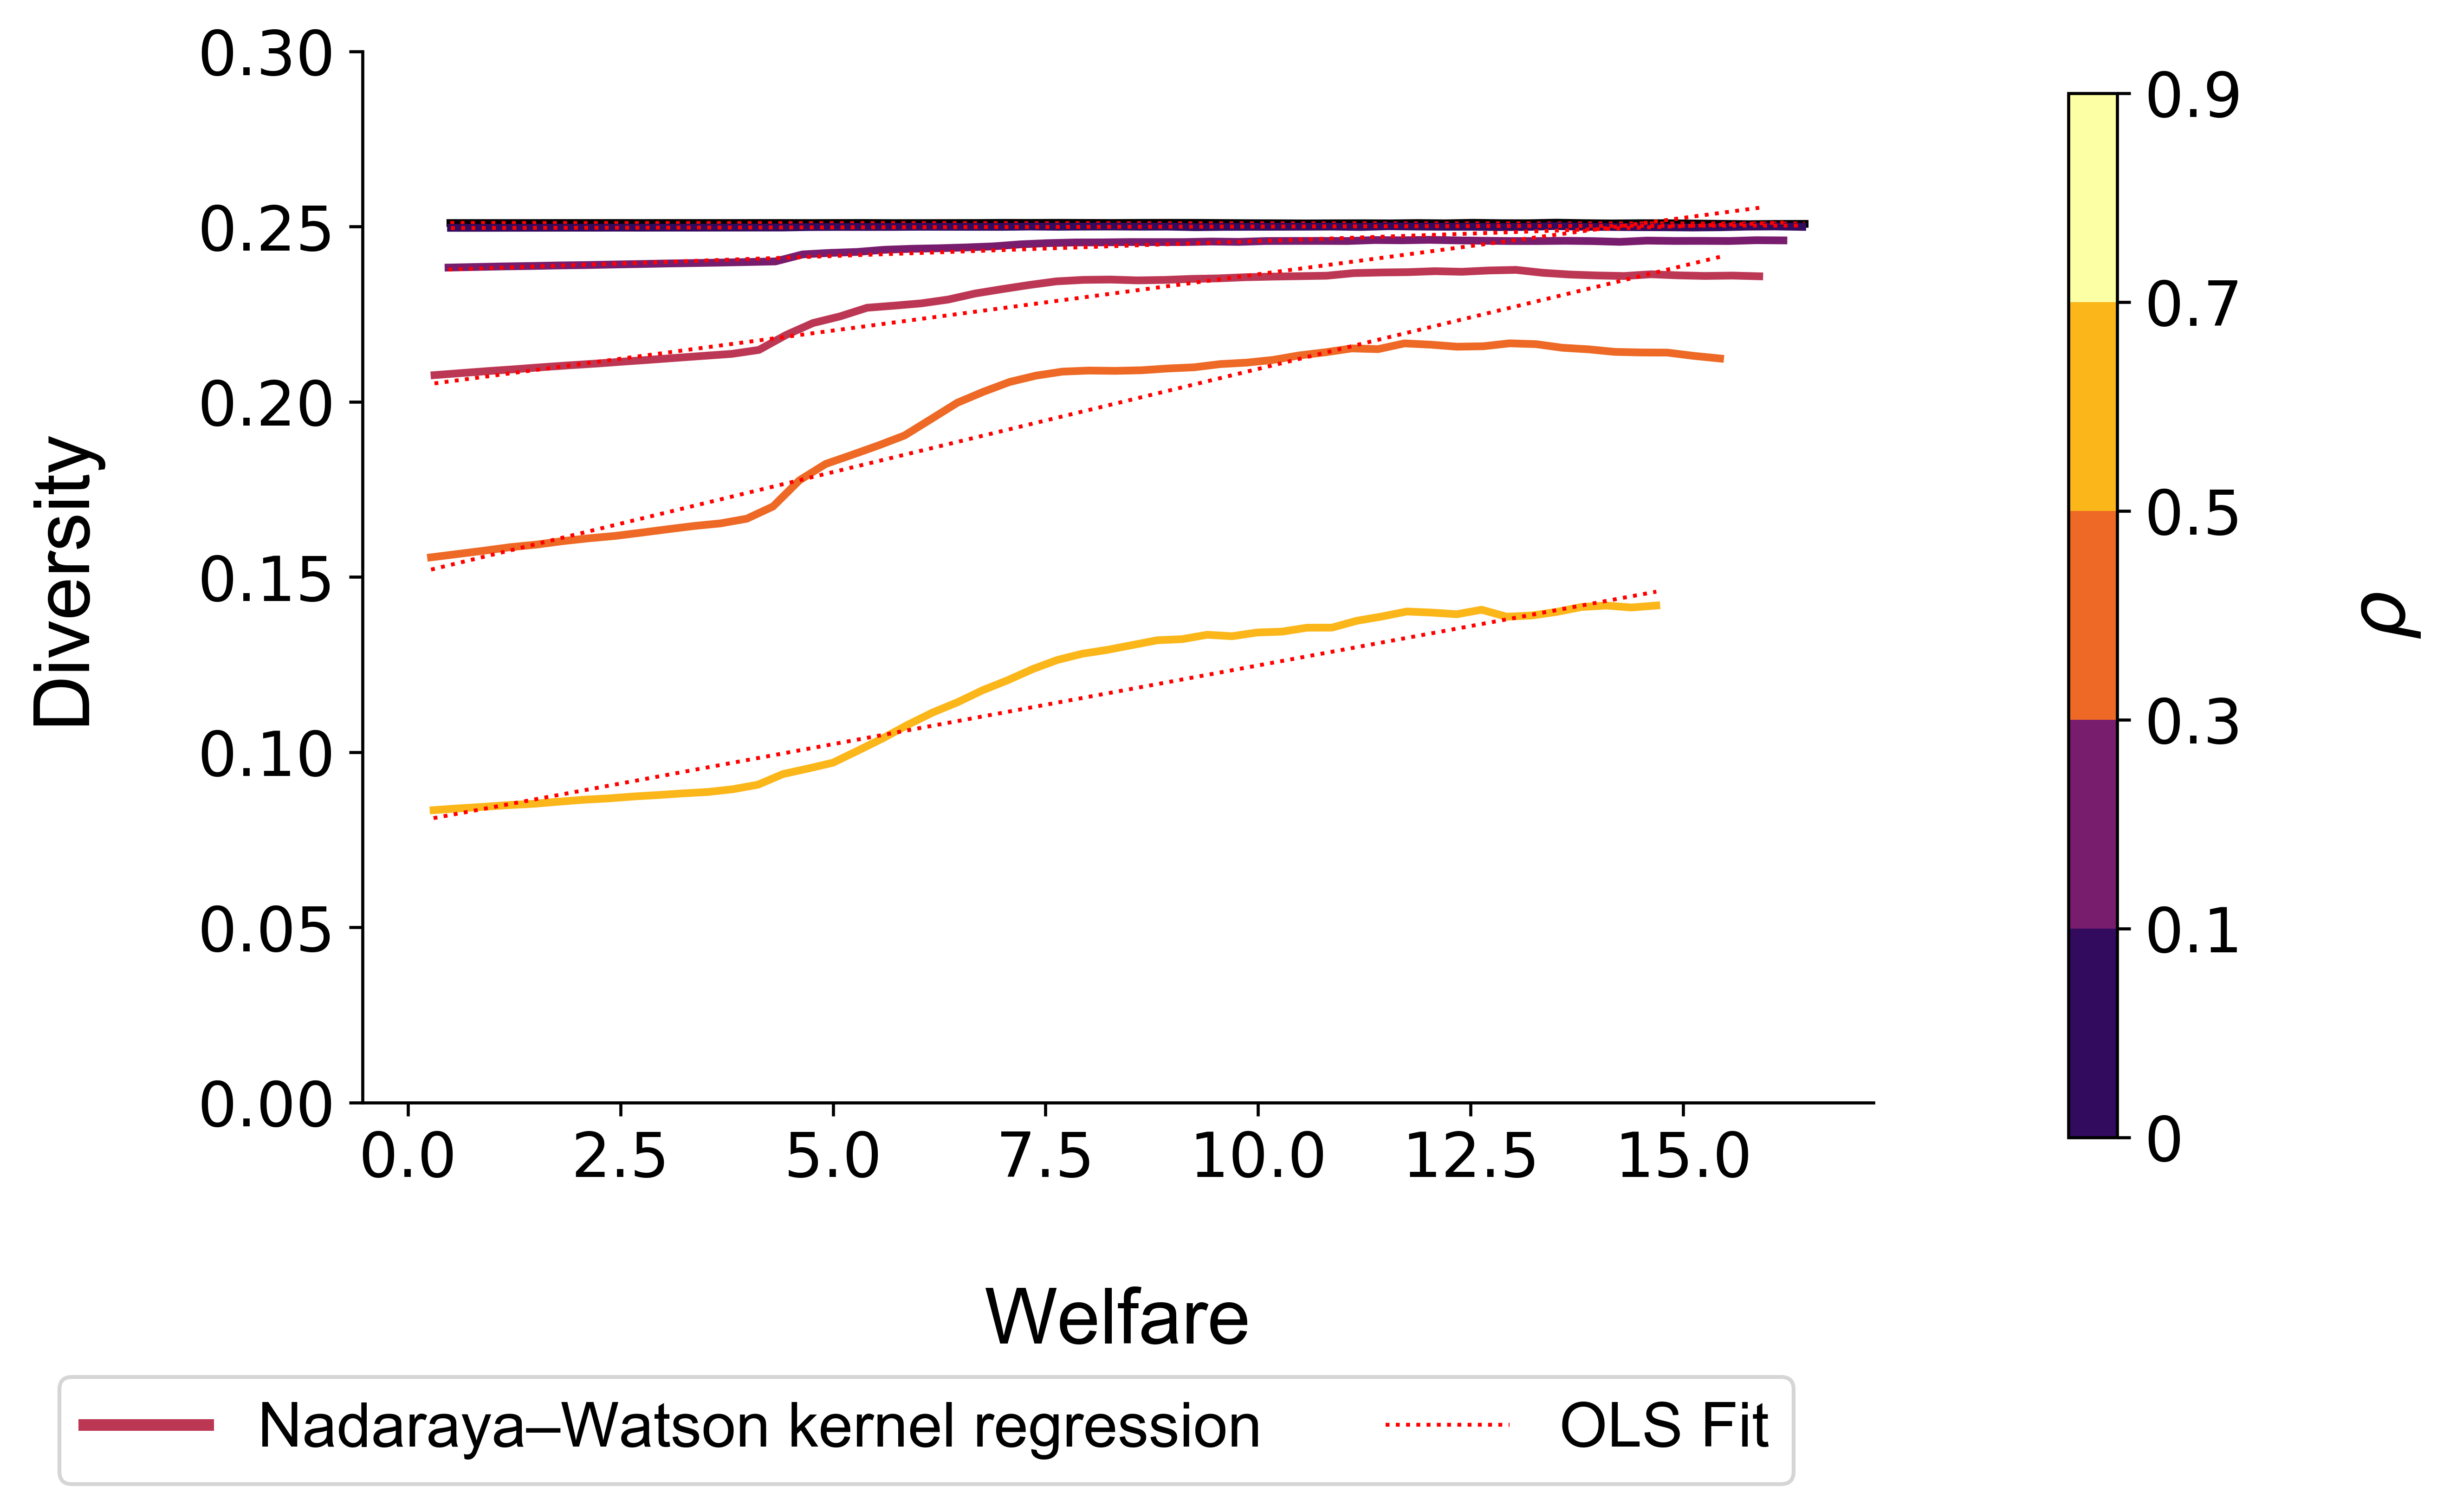

In [23]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df['gamma'] == 5) & (df['rho'] == "+str(rho_list[i])+")"
    regime = 'Partial'
    x = 'pop_welfare_avg'
    y = 'pop_diversity_avg'
    grid_size = 50
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=20)
plt.ylabel('Diversity' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =20)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "diversity_welfare_ra_partial.pdf",
    bbox_inches="tight"
)

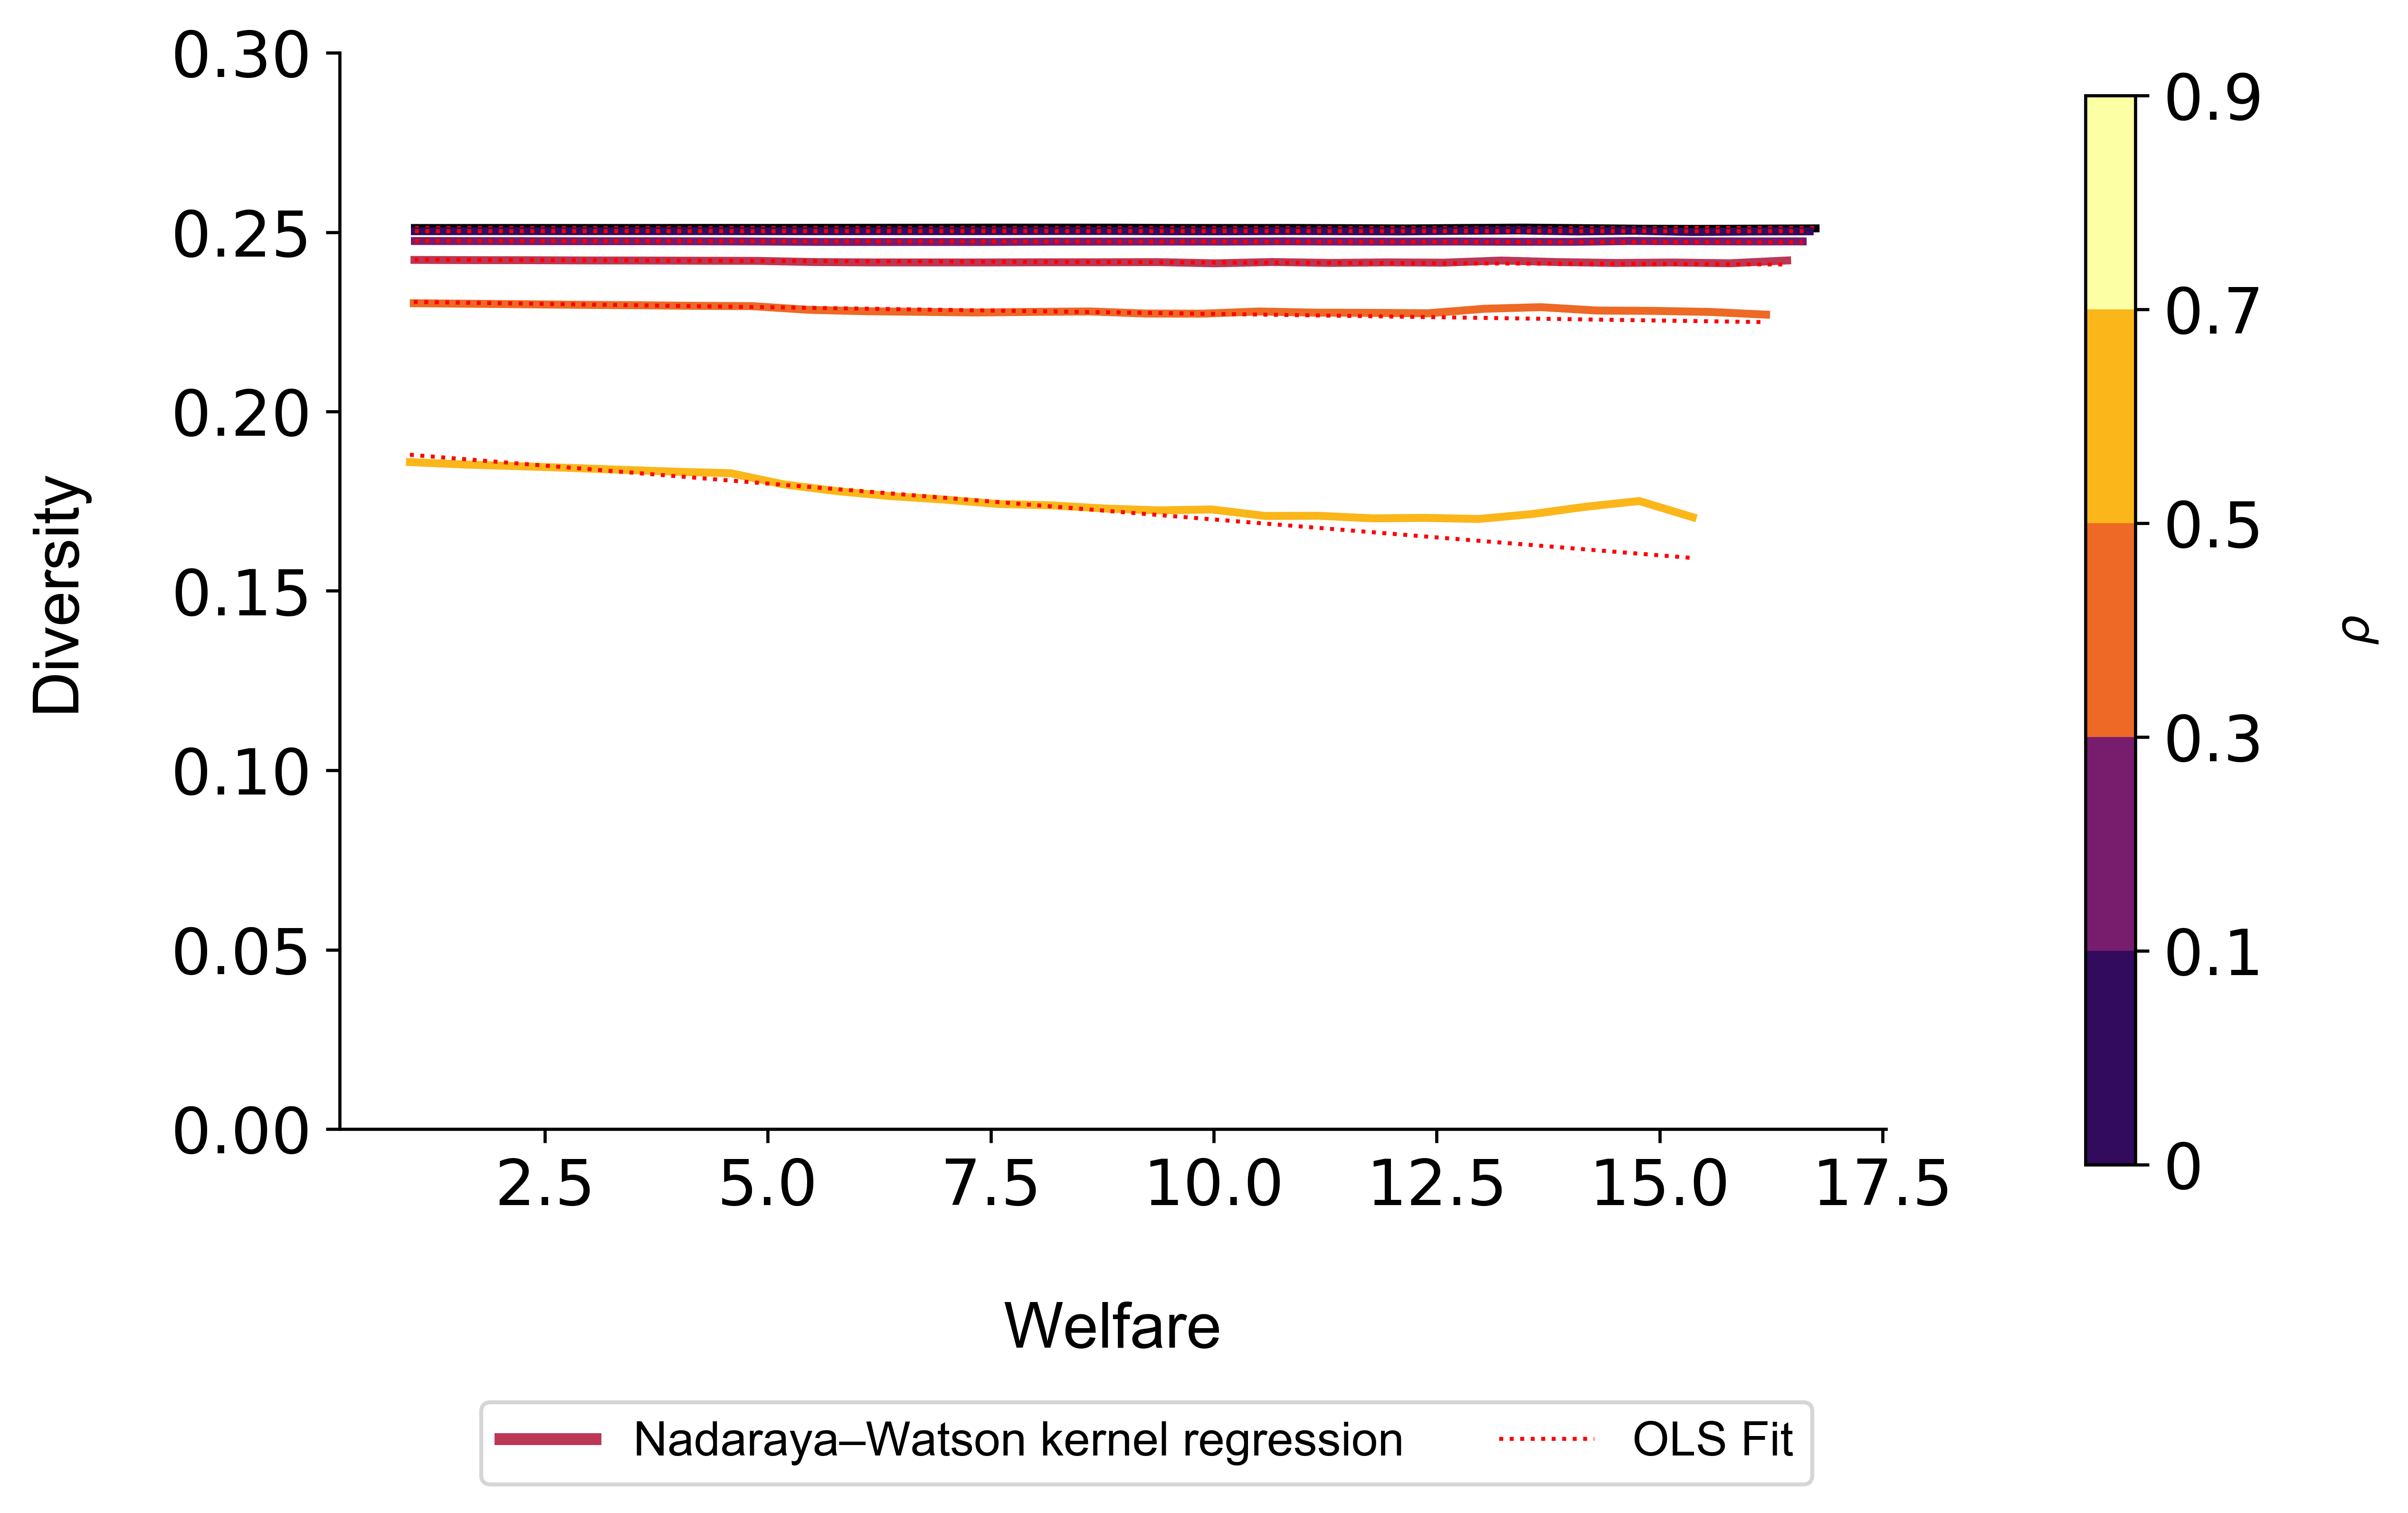

In [24]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df['gamma'] == 0) & (df['rho'] == "+str(rho_list[i])+")"
    regime = 'Omniscient'
    x = 'pop_welfare_avg'
    y = 'pop_diversity_avg'
    grid_size = 25
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_omni.pdf",
    bbox_inches="tight"
)

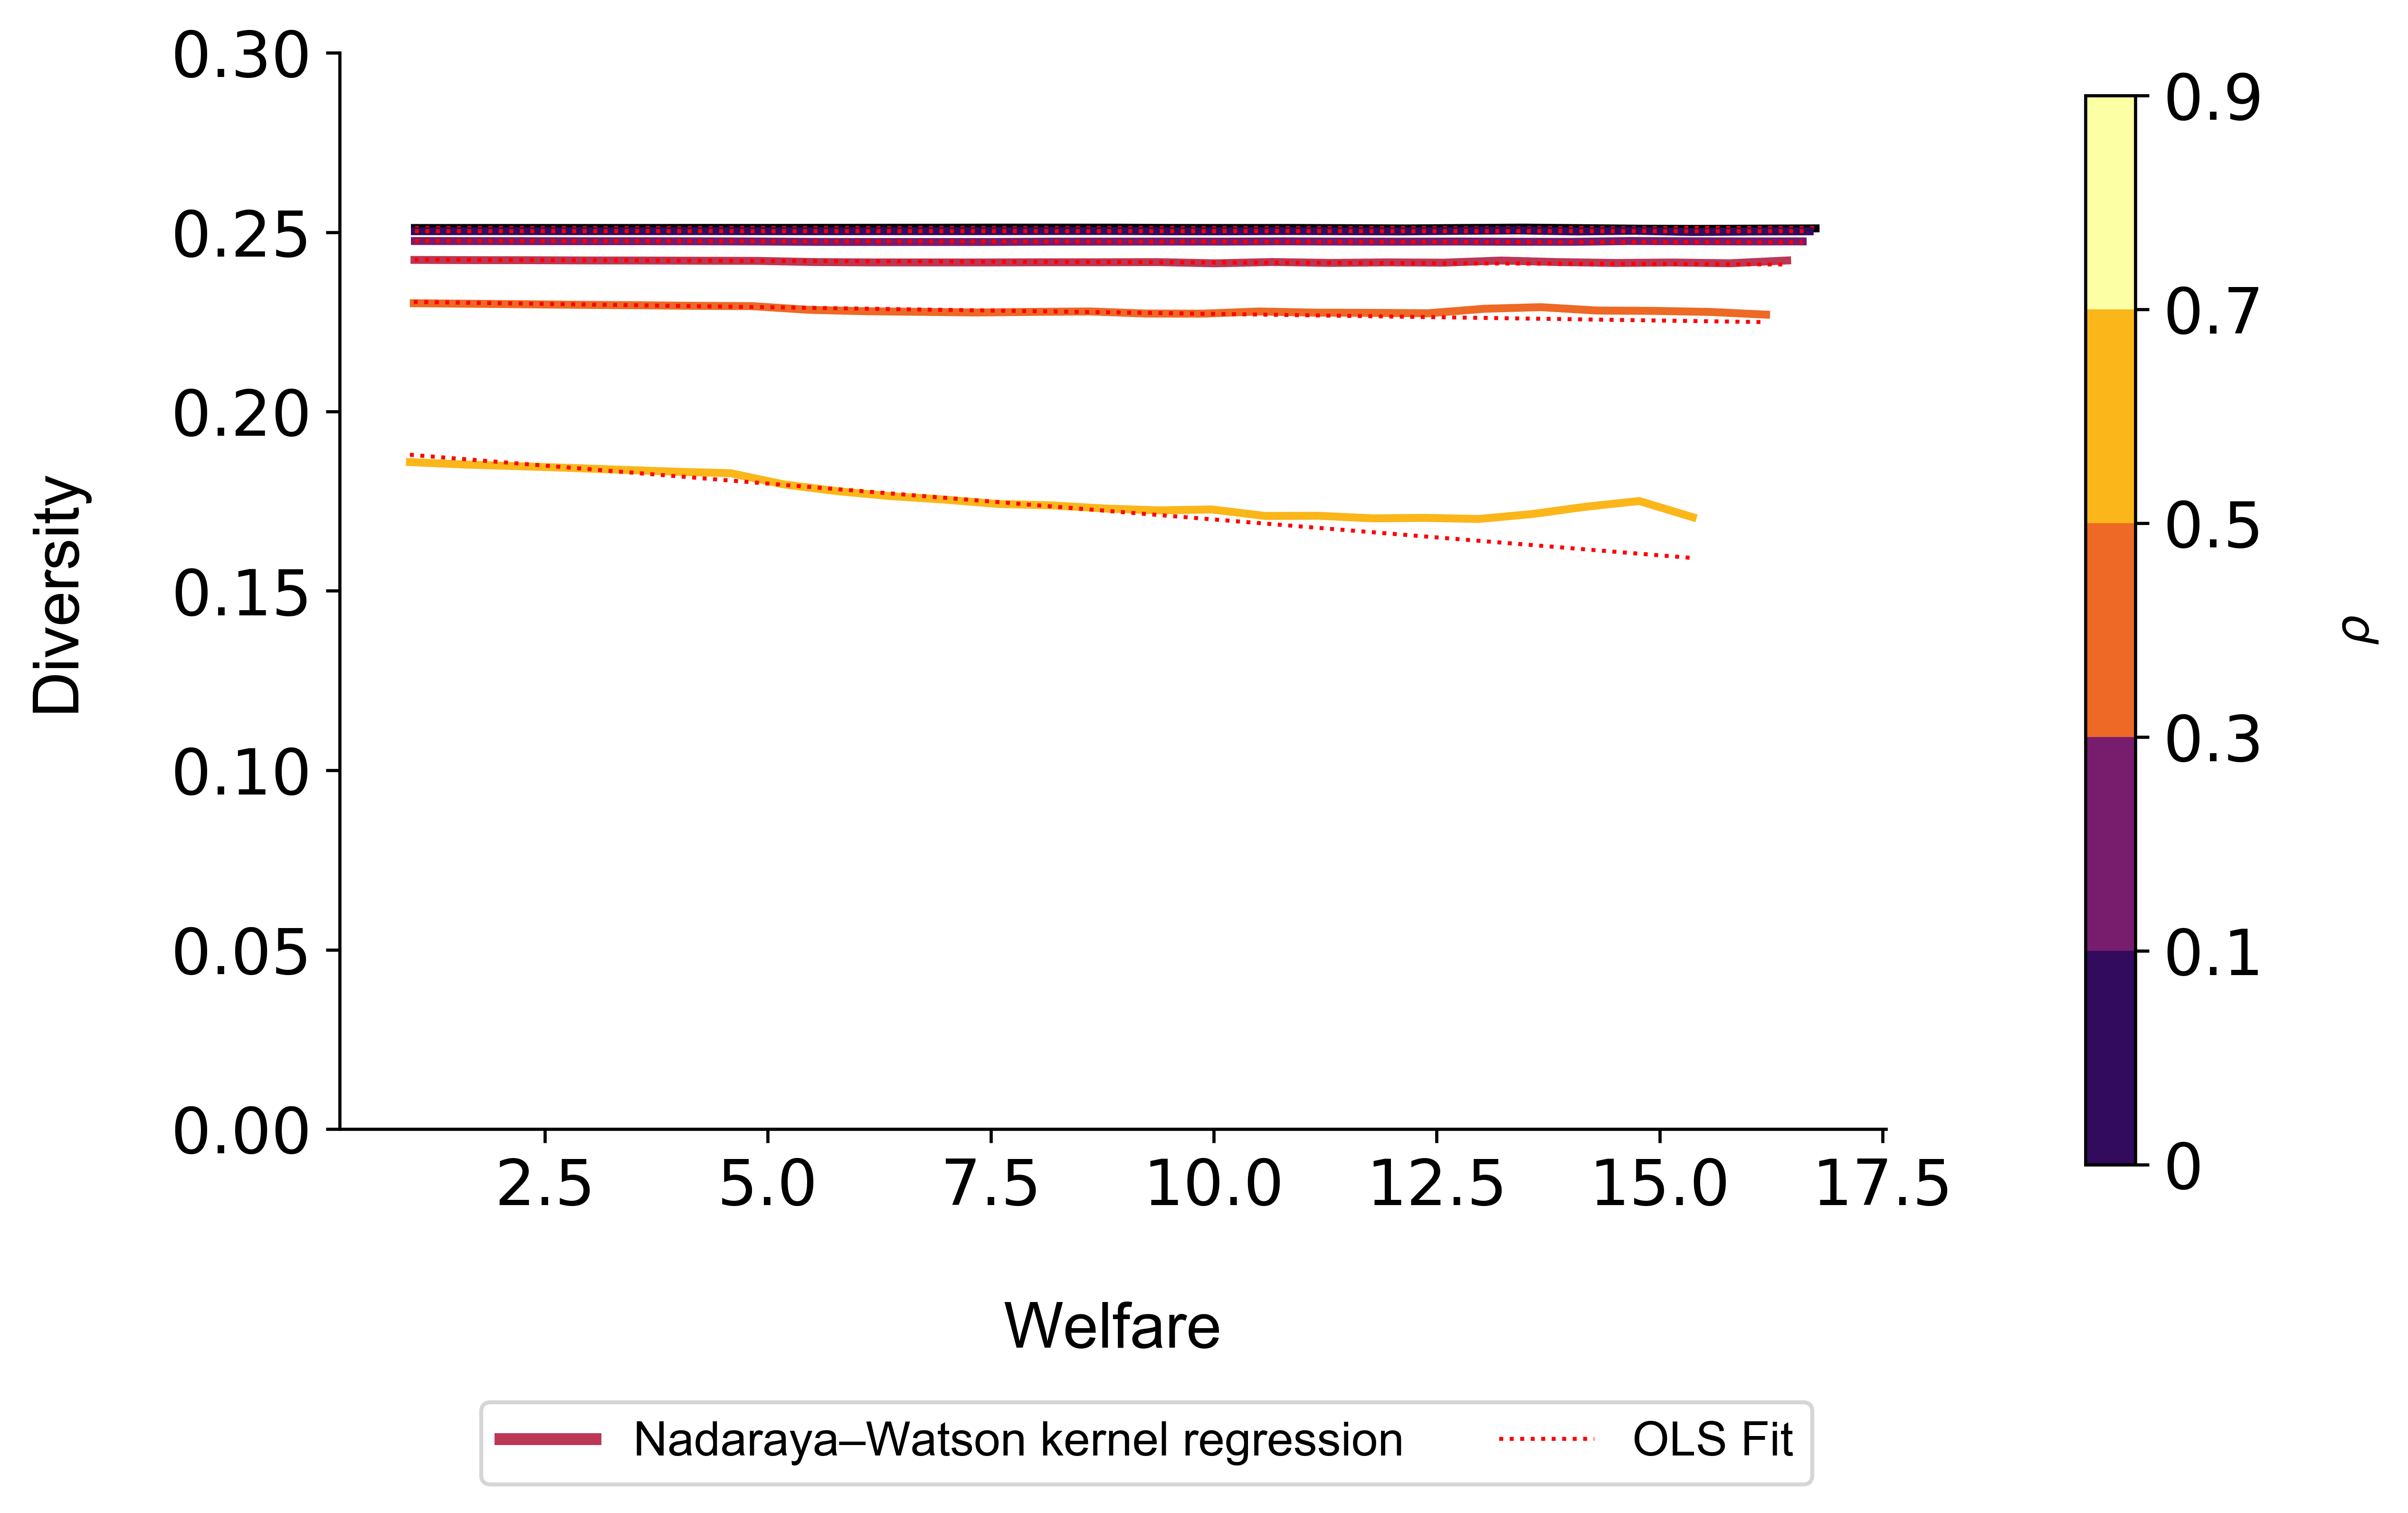

In [25]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]

fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df['gamma'] == 5) & (df['rho'] == "+str(rho_list[i])+")"
    regime = 'Omniscient'
    x = 'pop_welfare_avg'
    y = 'pop_diversity_avg'
    grid_size = 25
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "diversity_welfare_ra_omni.pdf",
    bbox_inches="tight"
)

In [26]:
rho_list

[0, 0.1, 0.3, 0.5, 0.7, 0.9]

In [27]:
cond = "(df['gamma'] == 0) & (df['rho'] == "+str(0.7)+")"
regime = 'Partial'
x = 'pop_welfare_avg'
y = 'pop_diversity_avg'
grid_size = 50
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
xpartial_rn, ypartial_rn = nw_fit(regime, cond, 5, x_grid, x, y)
xspartial_rn, yspartial_rn = xs, ys
xpartial_rn_grid = np.copy(x_grid)

cond = "(df['gamma'] == 5) & (df['rho'] == "+str(0.7)+")"
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
xpartial_ra, ypartial_ra = nw_fit(regime, cond, 5, x_grid, x, y)
xspartial_ra, yspartial_ra = xs, ys
xpartial_ra_grid = np.copy(x_grid)

In [28]:
cond = "(df['gamma'] == 0) & (df['rho'] == "+str(0.7)+")"
regime = 'No Rec'
x = 'pop_welfare_avg'
y = 'pop_diversity_avg'
grid_size = 50
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
xnorec_rn, ynorec_rn = np.copy(nw_fit(regime, cond, 5, x_grid, x, y))
xsnorec_rn, ysnorec_rn = xs, ys
xnorec_rn_grid = np.copy(x_grid)

cond = "(df['gamma'] == 5) & (df['rho'] == "+str(0.7)+")"
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
xnorec_ra, ynorec_ra = np.copy(nw_fit(regime, cond, 5, x_grid, x, y))
xsnorec_ra, ysnorec_ra = xs, ys
xnorec_ra_grid = np.copy(x_grid)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


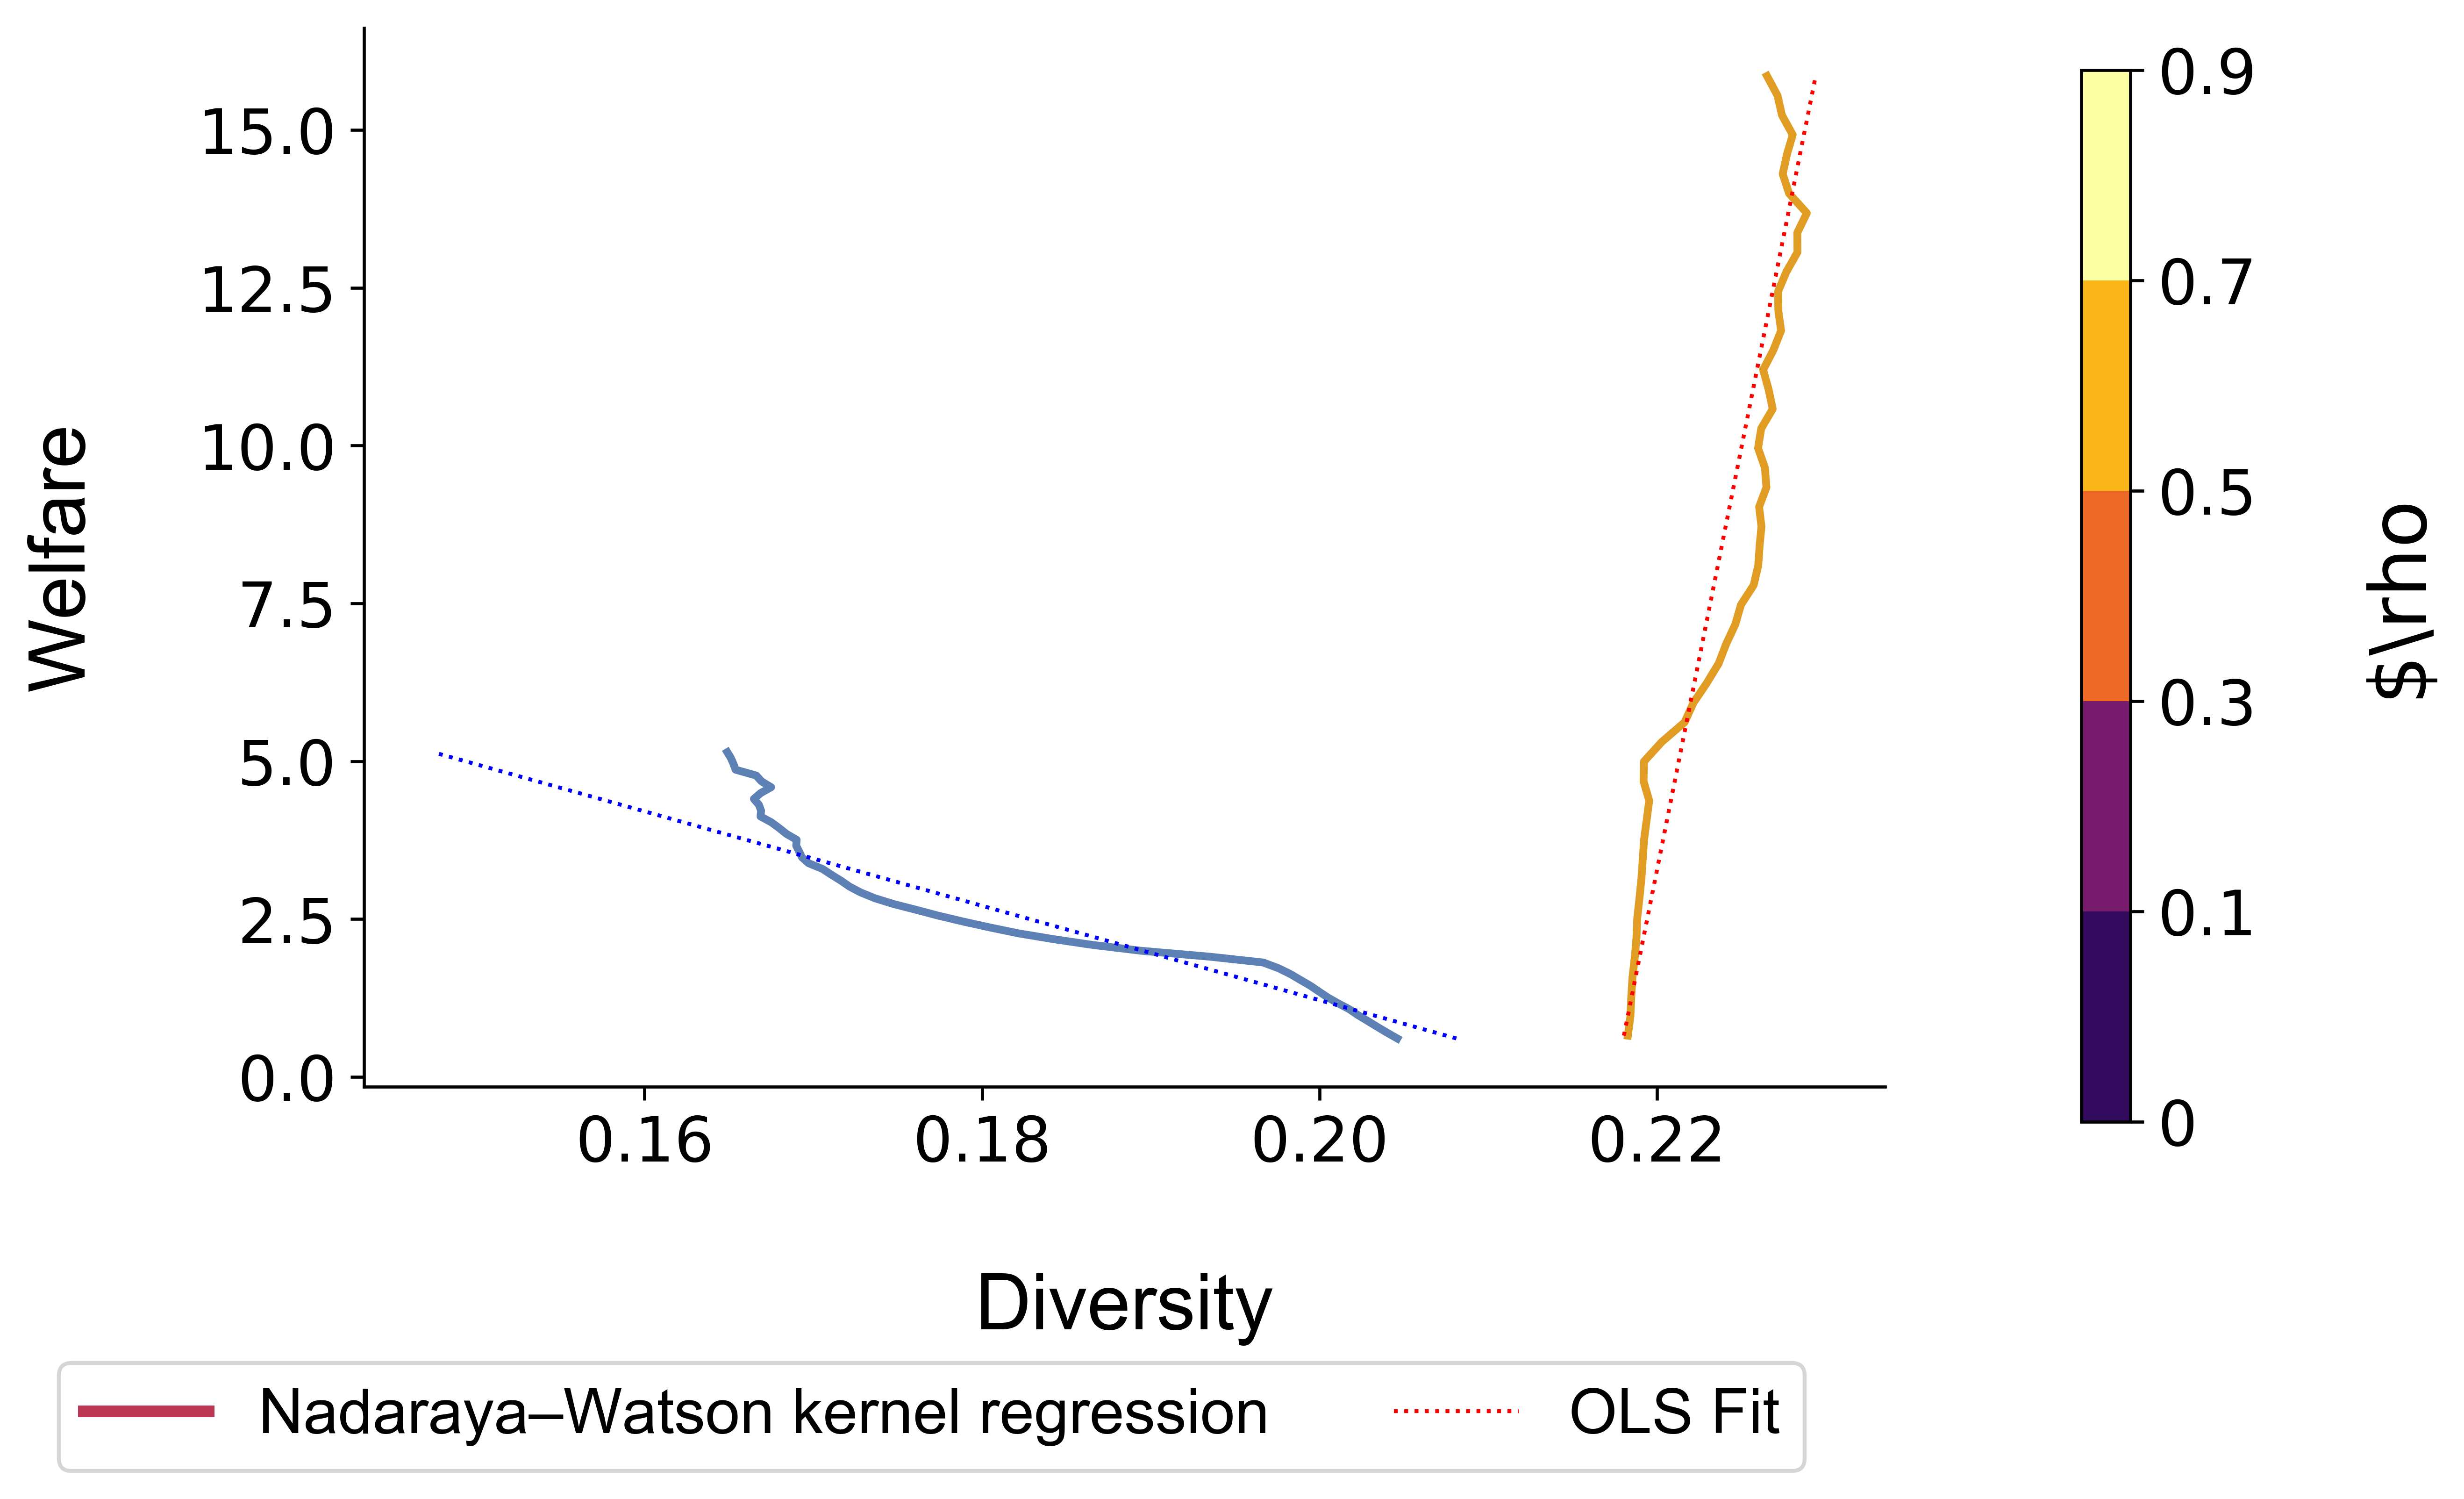

In [29]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

# mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len([rho_list])))[0:3] for i in range(1,len(rho_list)+1)])
# Z = [[0,0],[0,0]]
# levels = range(1,len(rho_list)+1)
# CS3 = plt.contourf(Z, levels, cmap=mycmap)
# plt.clf()
ax = fig.add_subplot(1, 1, 1)
cond = "(df['gamma'] == 0) & (df['rho'] == "+str(0.7)+")"
regime = 'No Rec'
x = 'pop_welfare_avg'
y = 'pop_diversity_avg'
grid_size = 50
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)

ax.plot(
    yhat,
    x_grid,
    color = mycolor1,
    linewidth=2, linestyle='-'
)
ax.plot(
    ls_fit(xs, ys, x_grid),
    x_grid,
    color = 'blue',
    linewidth=1, linestyle=':'
)

ax = fig.add_subplot(1, 1, 1)
cond = "(df['gamma'] == 0) & (df['rho'] == "+str(0.7)+")"
regime = 'Partial'
x = 'pop_welfare_avg'
y = 'pop_diversity_avg'
grid_size = 50
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y)

ax.plot(
    yhat,
    x_grid,
    color = mycolor2,
    linewidth=2, linestyle='-'
)
ax.plot(
    ls_fit(xs, ys, x_grid),
    x_grid,
    color = 'red',
    linewidth=1, linestyle=':'
)
# ax.set_ylim([0.1, .3])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Diversity', **cfont, fontsize=20)
plt.ylabel('Welfare' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho', rotation=90, fontsize =20)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_norec_partial.pdf",
    bbox_inches="tight"
)

# Welfare and Diversity

## Import rec_data

In [50]:
N = 500
df2 = pd.read_csv('rec_data.csv')
dfn = pd.read_csv('rec_data_other_n.csv')
if N == 100:
    df2 = dfn[dfn['N'] == 100]
if N == 500:
    df2 = dfn[dfn['N'] == 500]



## Functions

In [45]:
def mean_df2(regime, cond, x, y, df):
    if x != "":
        if cond == '':
            return df.loc[
            (df['regime'] == regime)
                ].groupby([x])[y].mean()
        else:
            return df.loc[
            (df['regime'] == regime) & eval(cond)
                ].groupby([x])[y].mean()
    else:
        if cond == '':
            return df.loc[
            (df['regime'] == regime)
                ][y].mean()
        else:
            return df.loc[
            (df['regime'] == regime) & eval(cond)
                ][y].mean()
def u_ci_df2(regime, cond, x, y, df):
    if cond == '':
        return mean_df2(regime, cond, x, y, df) + 1.96*df.loc[
            (df['regime'] == regime)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['regime'] == regime)
            ].groupby([x])[y].count())
    else:
        return mean_df2(regime, cond, x, y, df) + 1.96*df.loc[
            (df['regime'] == regime) & eval(cond)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['regime'] == regime) & eval(cond)
            ].groupby([x])[y].count())
def l_ci_df2(regime, cond, x, y, df):
    if cond == '':
        return mean_df2(regime, cond, x, y, df) - 1.96*df.loc[
            (df['regime'] == regime)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['regime'] == regime)
            ].groupby([x])[y].count())
    else:
        return mean_df2(regime, cond, x, y, df) - 1.96*df.loc[
            (df['regime'] == regime) & eval(cond)
            ].groupby([x])[y].std()/np.sqrt(df.loc[
            (df['regime'] == regime) & eval(cond)
            ].groupby([x])[y].count())


def mean_bin2(x, y, grid, cond, regime, df):
    to_ret = []
    for it in range(0,len(grid)-1):
        x_it = .5*grid[it] + .5*grid[it+1]
        if cond == '':
            y_it = df.loc[(df2['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        else:
            y_it = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        if y_count > 0:
            to_ret += [[x_it , y_it]]
    return np.array(to_ret).T

def u_bin2(x, y, grid, cond, regime, df):
    to_ret = []
    for it in range(0,len(grid)-1):
        x_it = .5*grid[it] + .5*grid[it+1]
        if cond == '':
            y_it = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].std()
            y_count = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        else:
            y_it = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        if y_count > 0:
            to_ret += [[x_it , y_it+1.96*y_std/np.sqrt(y_count)]]
    return np.array(to_ret).T

def l_bin2(x, y, grid, cond, regime, df):
    to_ret = []
    for it in range(0,len(grid)-1):
        x_it = .5*grid[it] + .5*grid[it+1]
        if cond == '':
            y_it = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].std()
            y_count = df.loc[(df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        else:
            y_it = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_std = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].mean()
            y_count = df.loc[eval(cond) & (df['regime'] == regime) & (grid[it] <= df[x]) & (df[x] < grid[it+1])][y].count()
        if y_count > 0:
            to_ret += [[x_it , y_it-1.96*y_std/np.sqrt(y_count)]]
    return np.array(to_ret).T


def gaussian_kernel(x, x0, h):
    return np.exp(- 0.5 * np.power((x - x0) / h, 2))
def nw(x, xs, ys, h):
    id_list = np.argwhere(1*(abs(xs-np.ones(len(xs))*x)<h)==1)
    ret_num = 0
    ret_den = 0
    for it in id_list:
        ret_num += gaussian_kernel(x, xs[it], h)*ys[it]
        ret_den += gaussian_kernel(x, xs[it], h)
    if (ret_num != 0) and (ret_den >0):
        return float(ret_num/ret_den)
def nw_grid(grid, xs, ys, h, df):
    return np.array([nw(x, xs, ys, h) for x in grid])
def nw_fit(regime, cond, scale, grid, x, y, df):
    xs = np.array(df.loc[eval(cond) & (df['regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['regime'] == regime)][y])
    return x_grid, nw_grid(x_grid, xs, ys, scale*1.06*np.std(xs)*len(xs)**(-.2), df)
    

def lin_fun(x, a, b):
    return a + b * x

def ls_fit(x_data, y_data, x_grid):
    params, params_covariance = scipy.optimize.curve_fit(lin_fun, x_data, y_data,
                                               p0=[2, 2])
    return lin_fun(x_grid, params[0], params[1])

## Welfare and Diversity

### Risk Neutral, No Rec

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


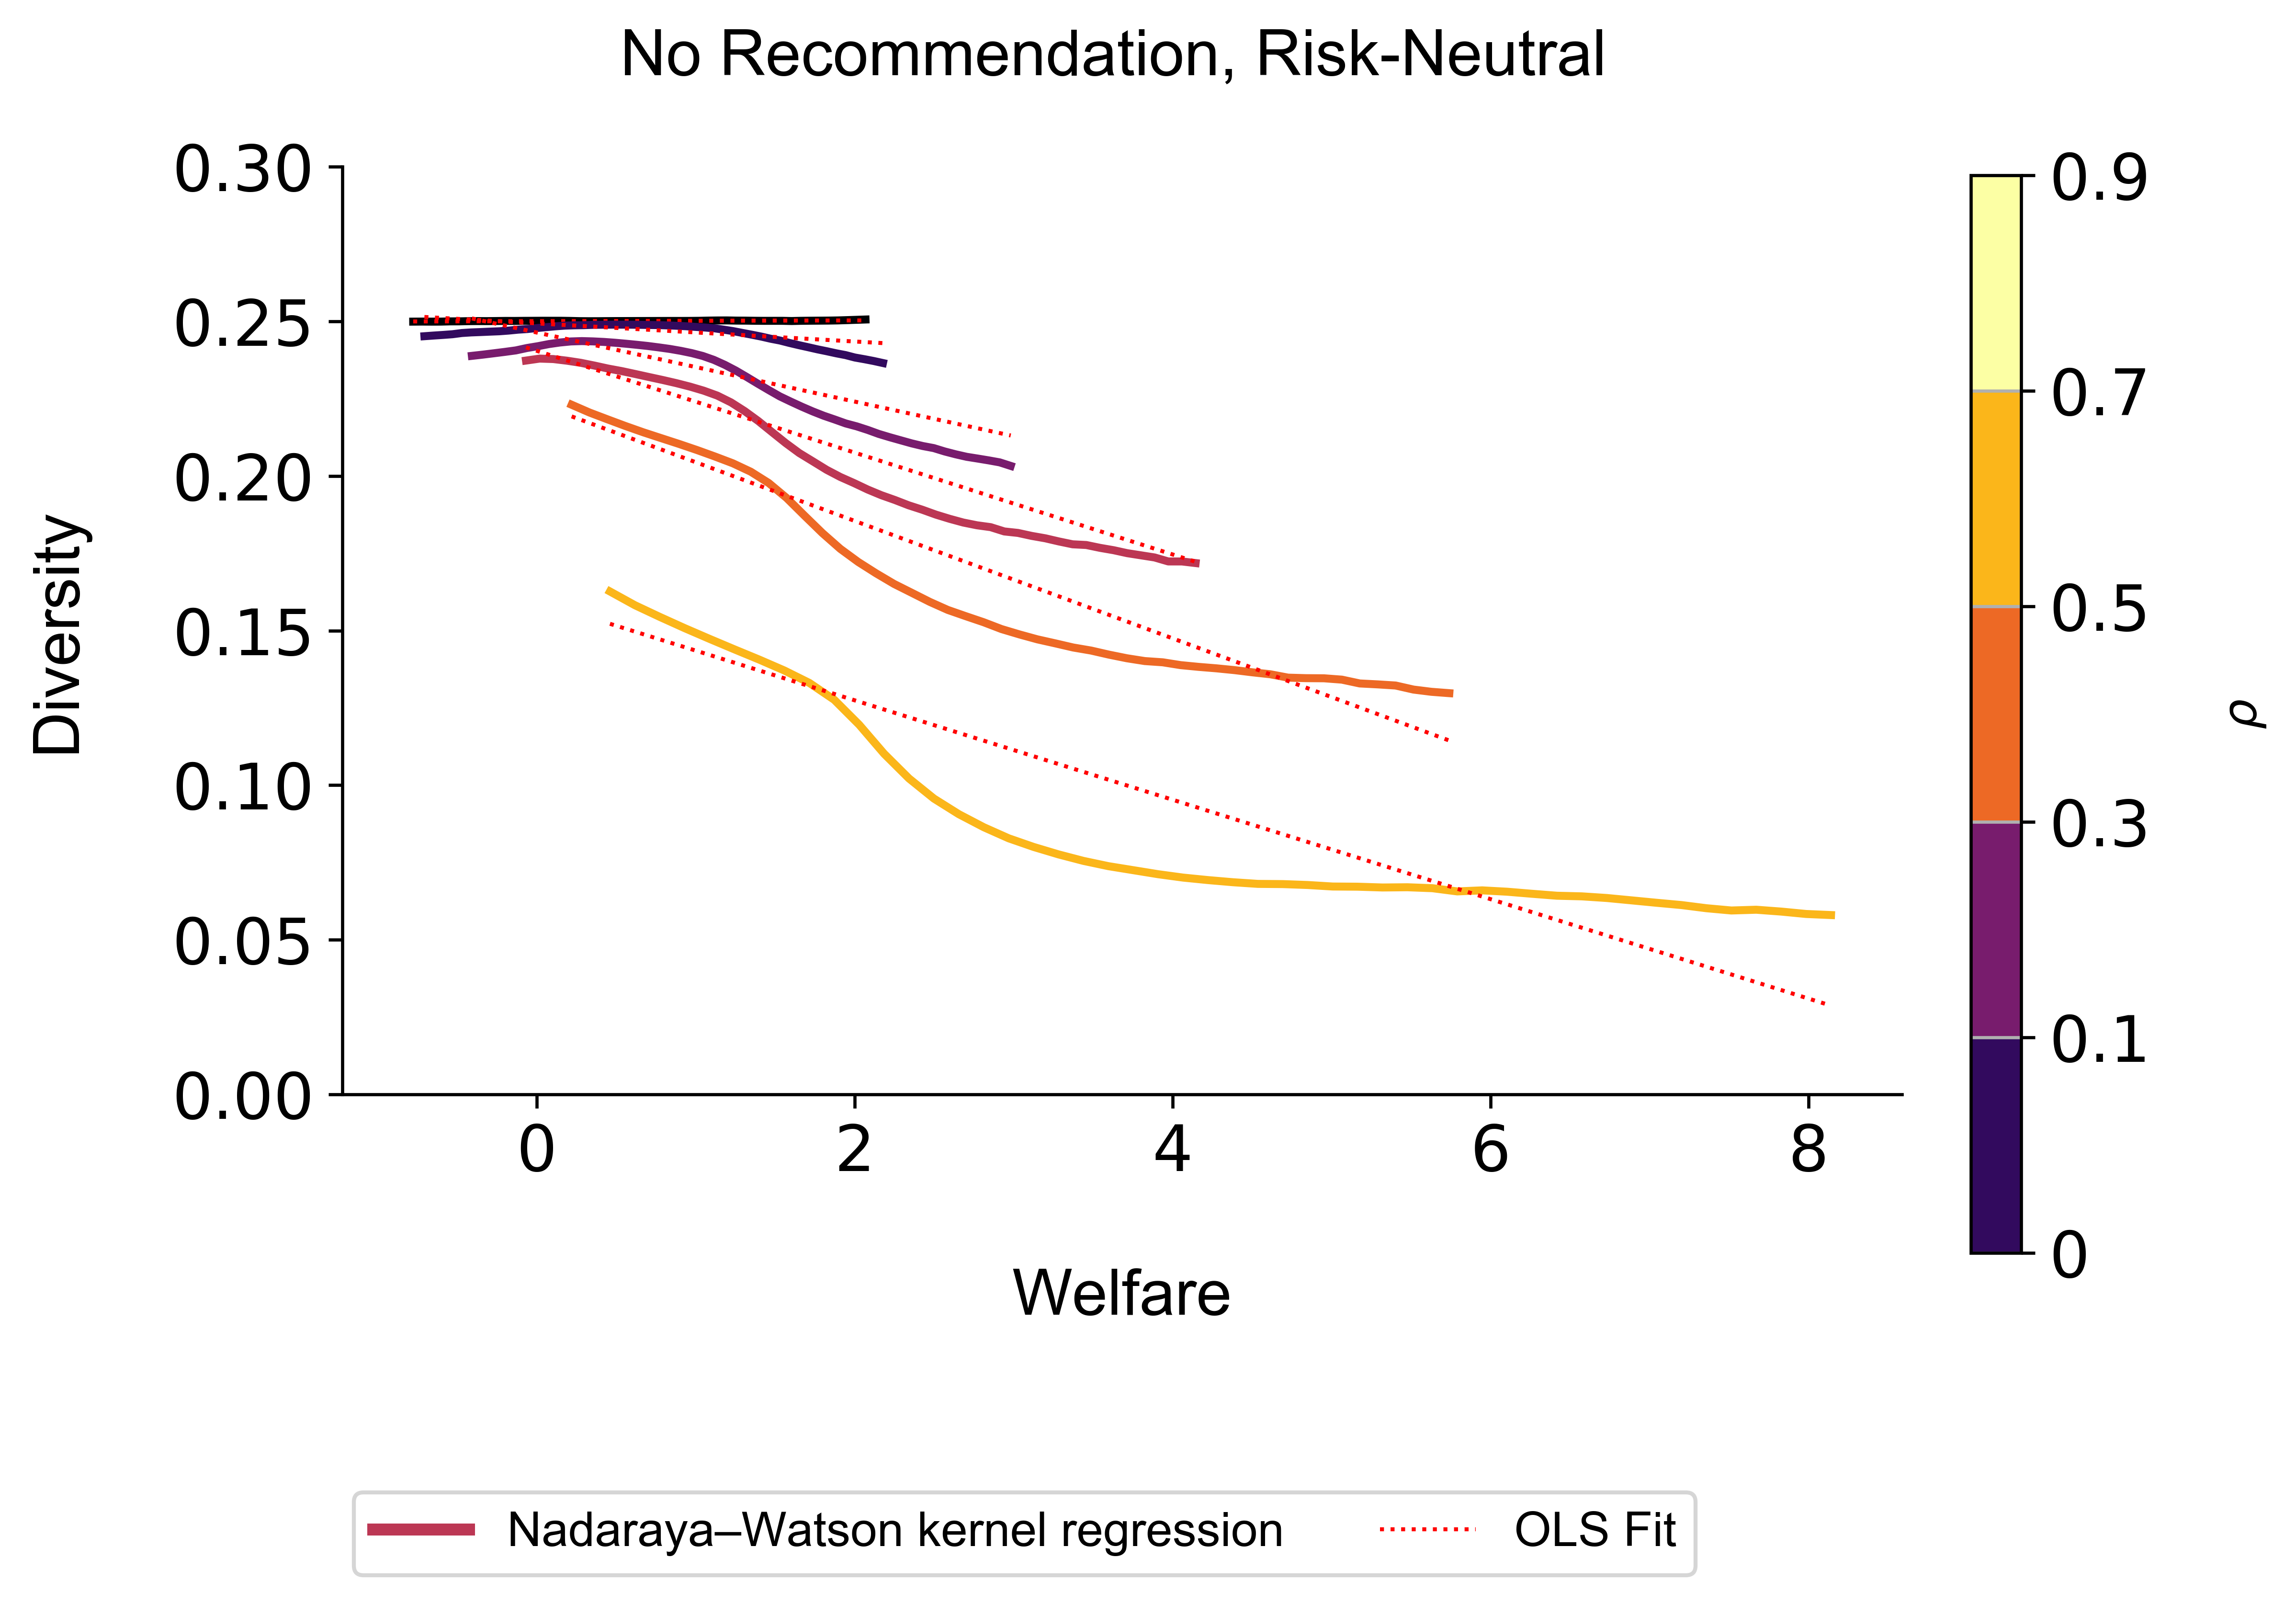

In [32]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 0) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'no_rec'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


plt.title('No Recommendation, Risk-Neutral \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)
plt.grid()
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_" + str(N) + ".pdf",
    bbox_inches="tight"
)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


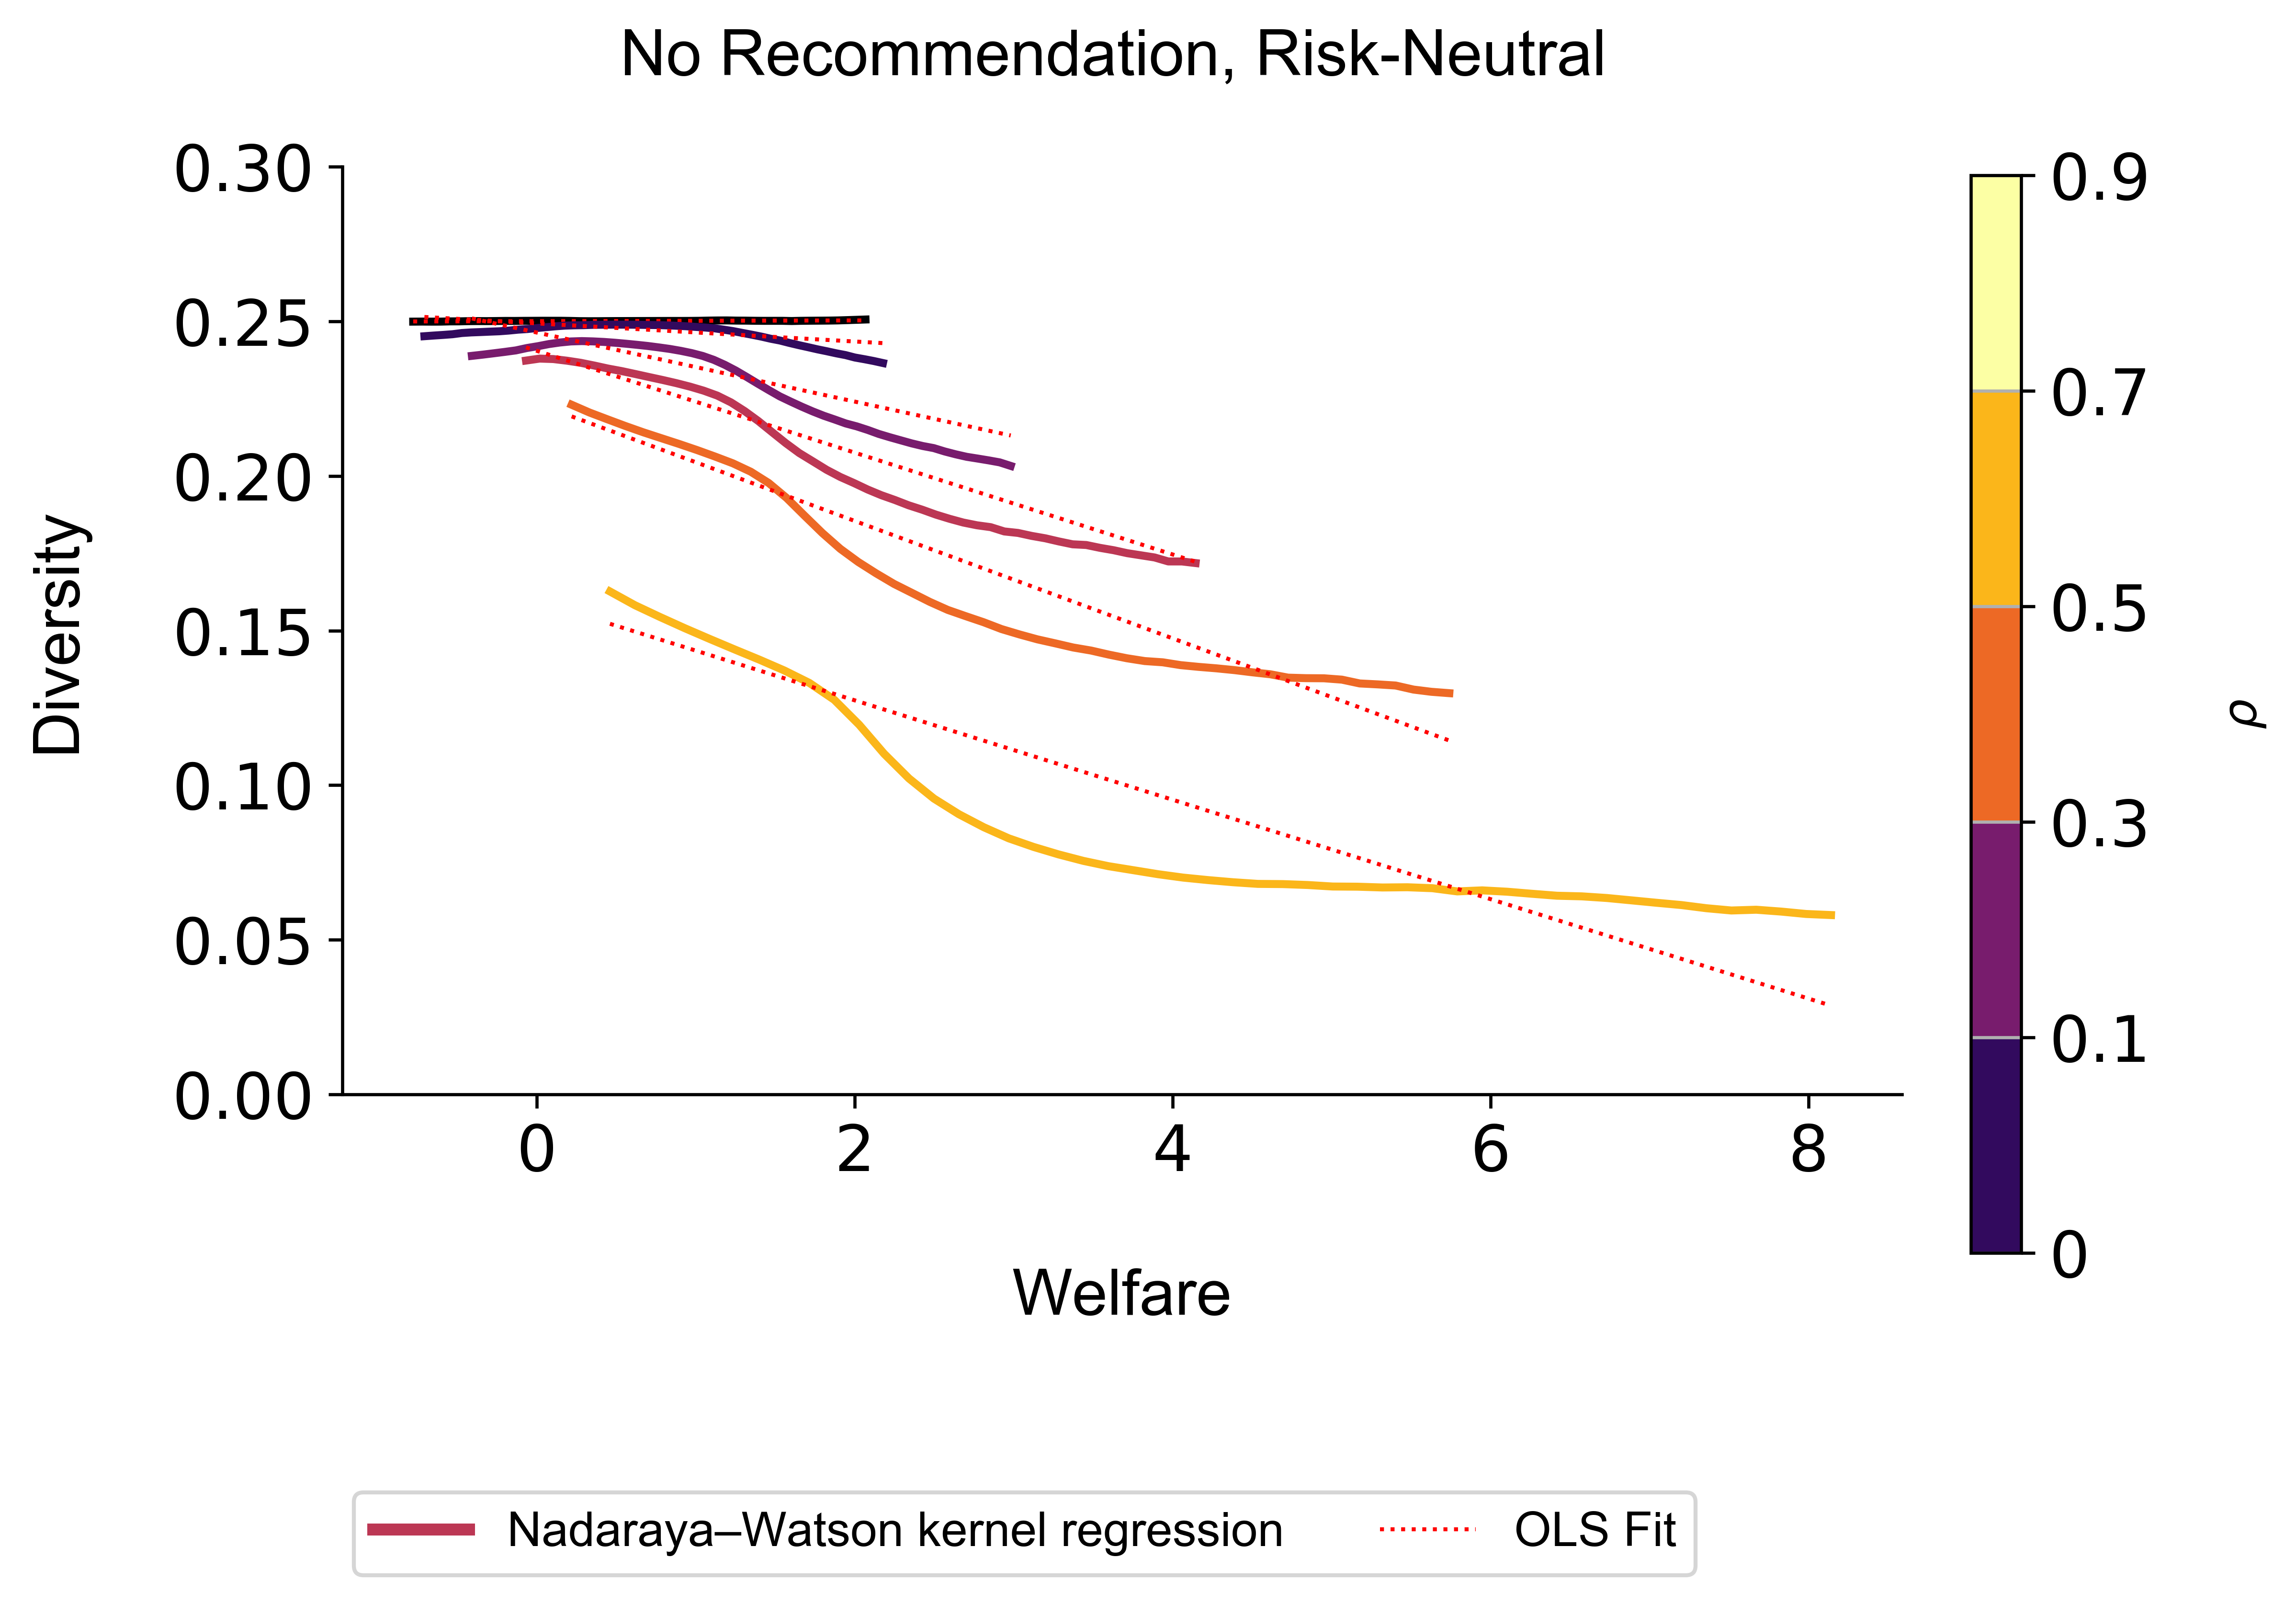

In [33]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 0) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'no_rec'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


plt.title('No Recommendation, Risk-Neutral \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)
plt.grid()
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_n_" + str(N) + ".pdf",
    bbox_inches="tight"
)

### Risk Neutral, Rec

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


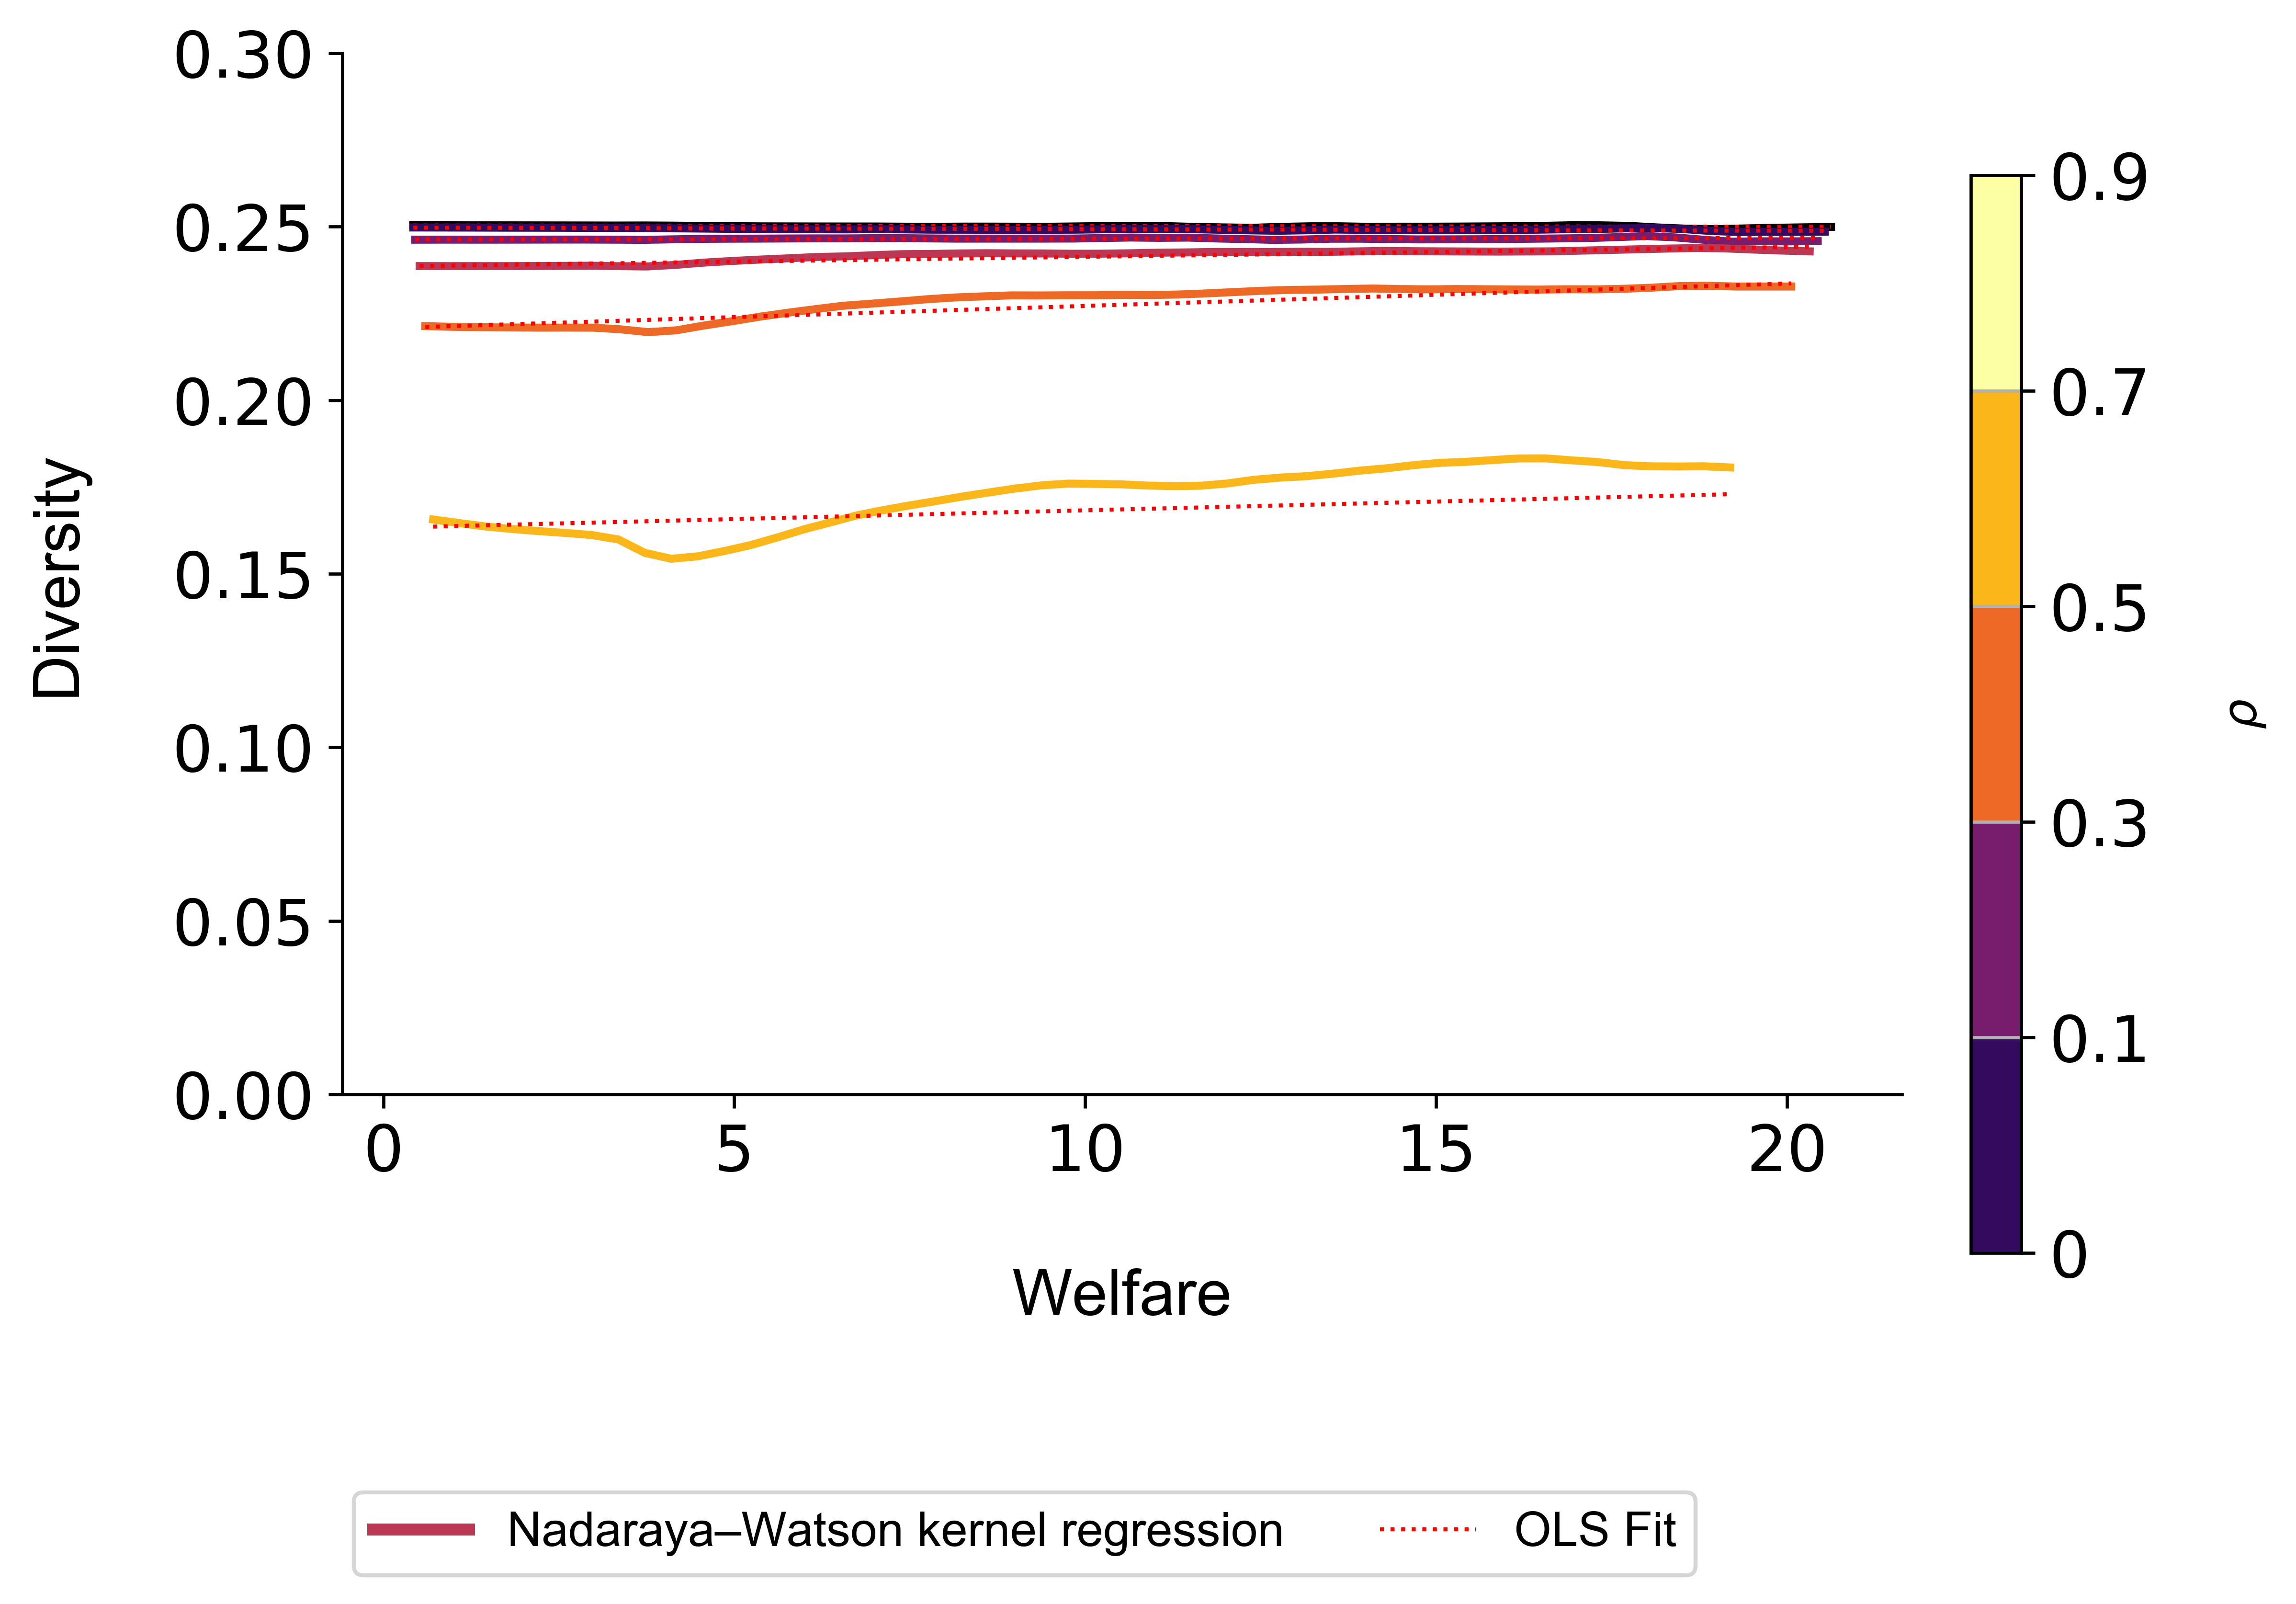

In [34]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 0) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'partial'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


#plt.title('Recommendation, Risk-Neutral \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)
plt.grid()
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_partial_n_" + str(N) + ".pdf",
    bbox_inches="tight"
)

### Risk Neutral, Oracle

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


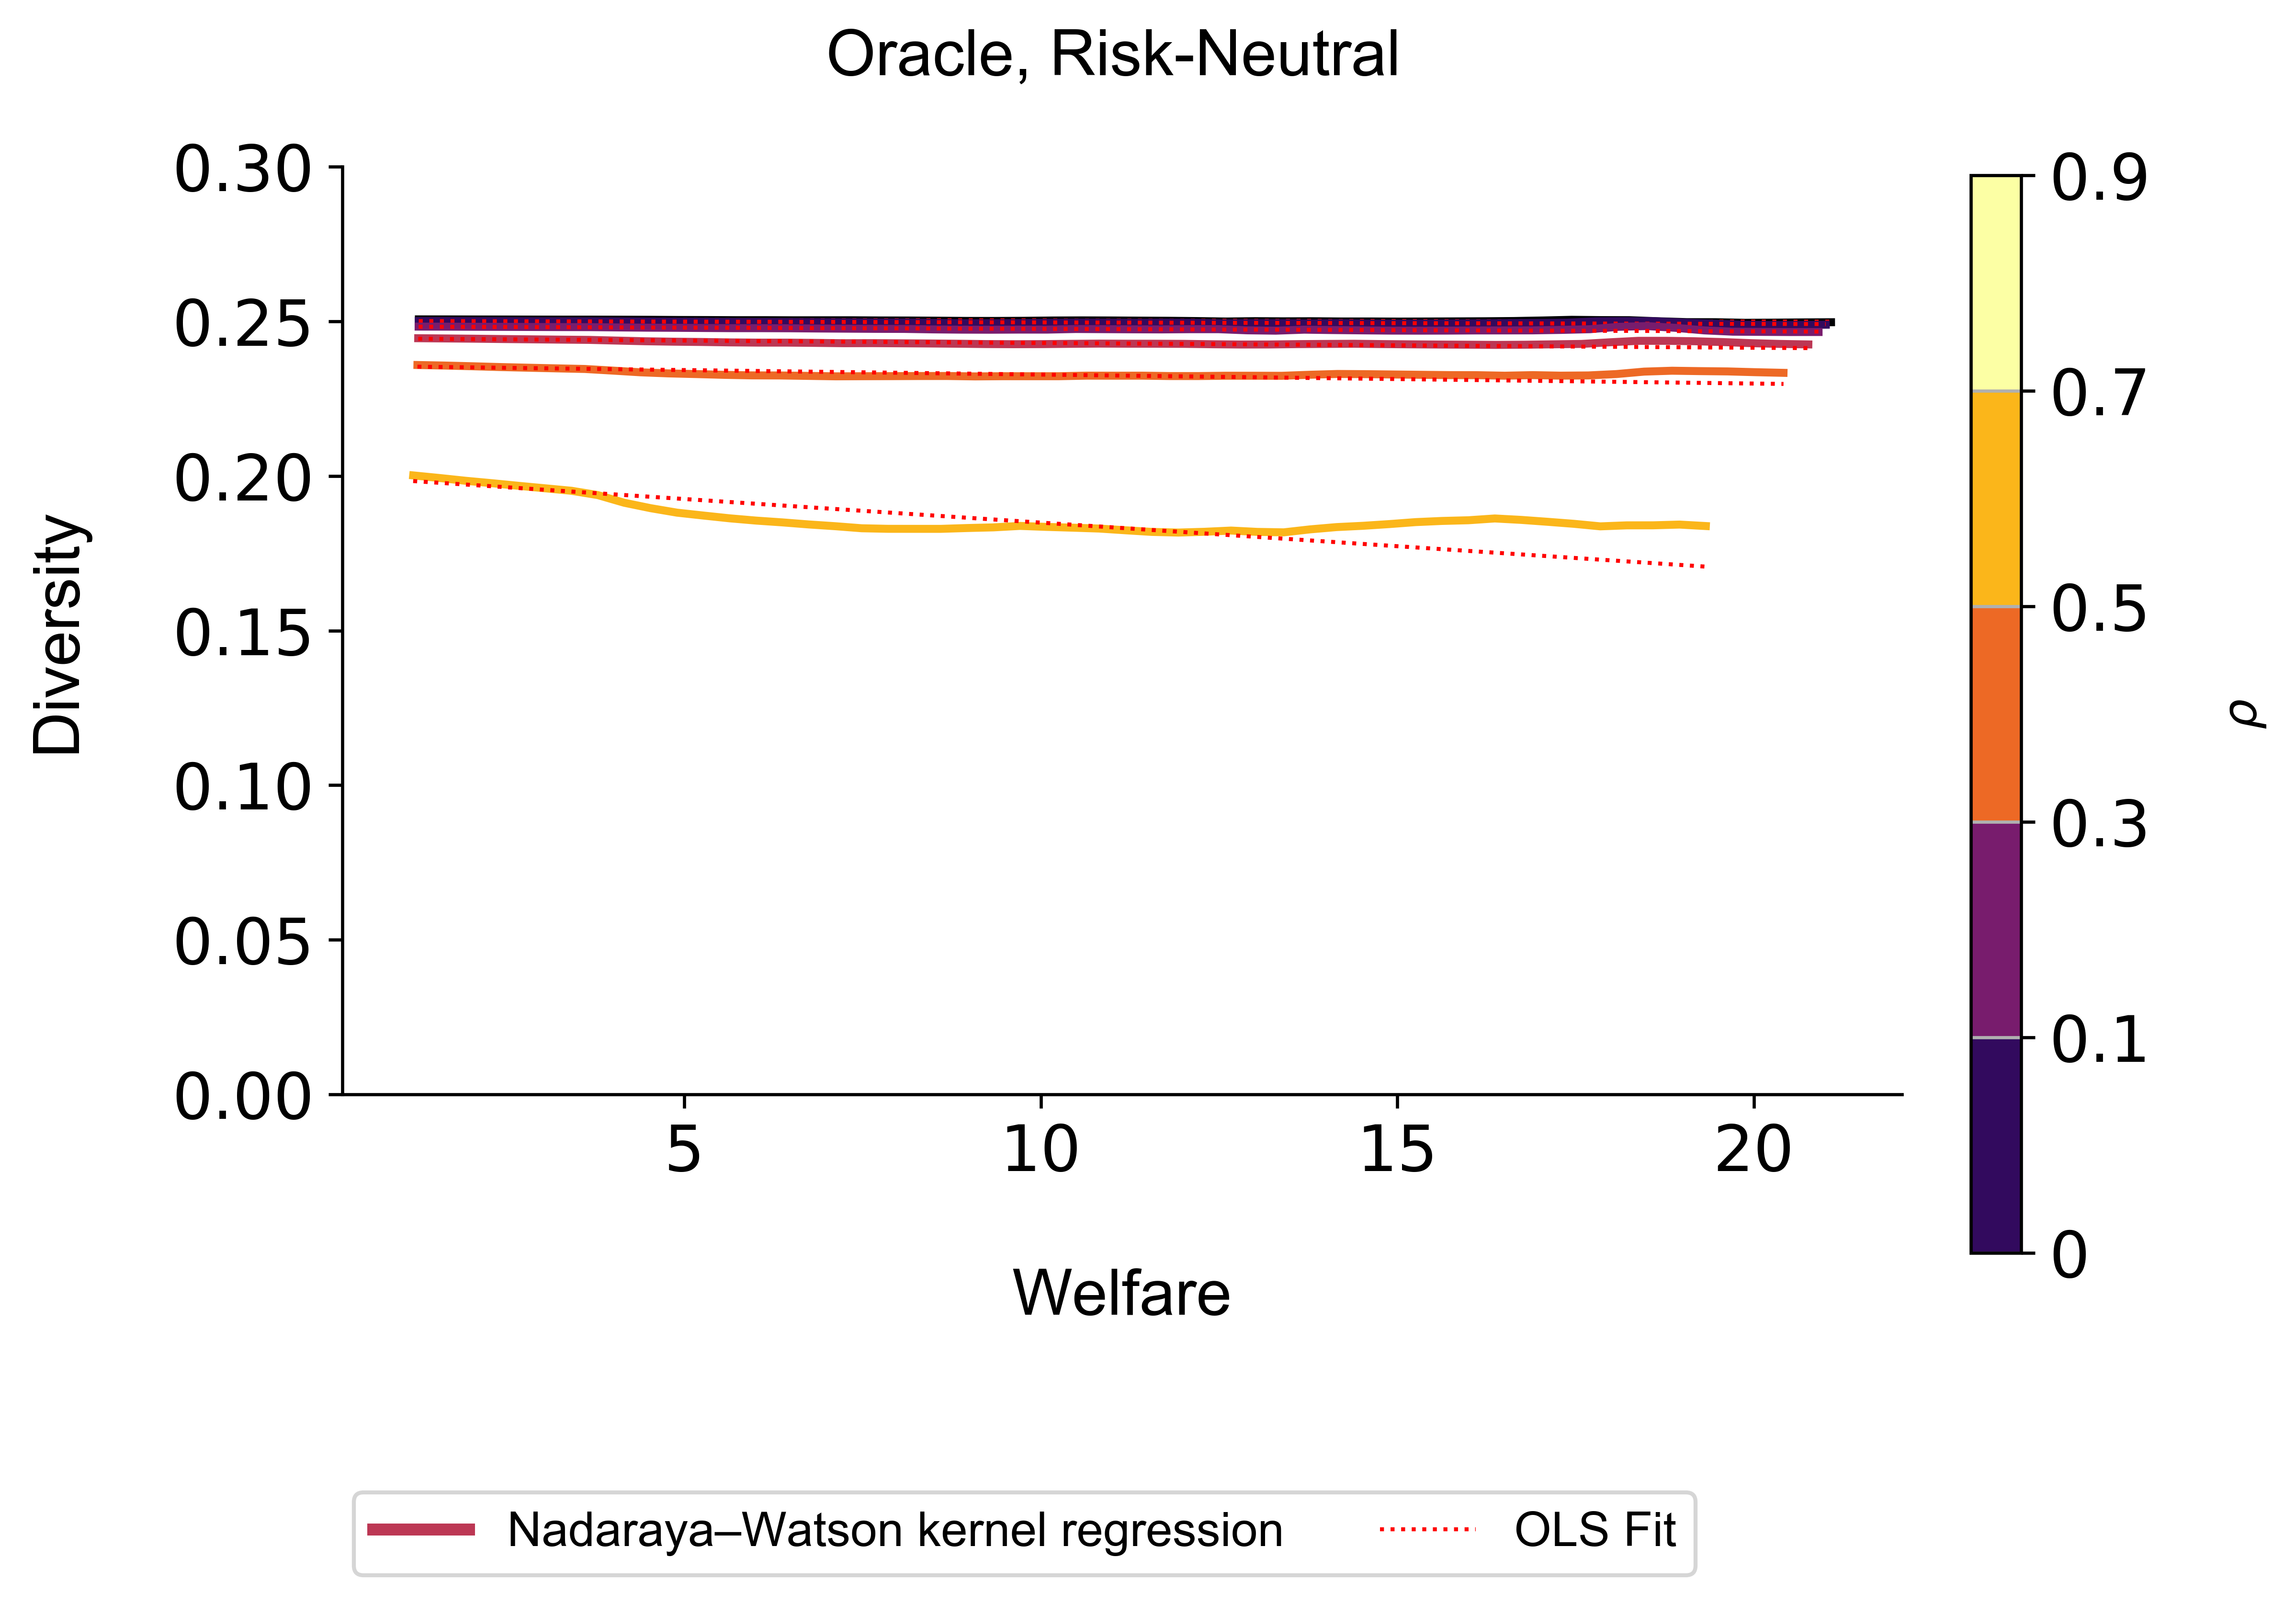

In [35]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 0) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'omni'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


plt.title('Oracle, Risk-Neutral \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})
plt.grid()
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_rn_omni_n_" + str(N) + ".pdf",
    bbox_inches="tight"
)

### Risk Averse, No Rec

KeyboardInterrupt: 

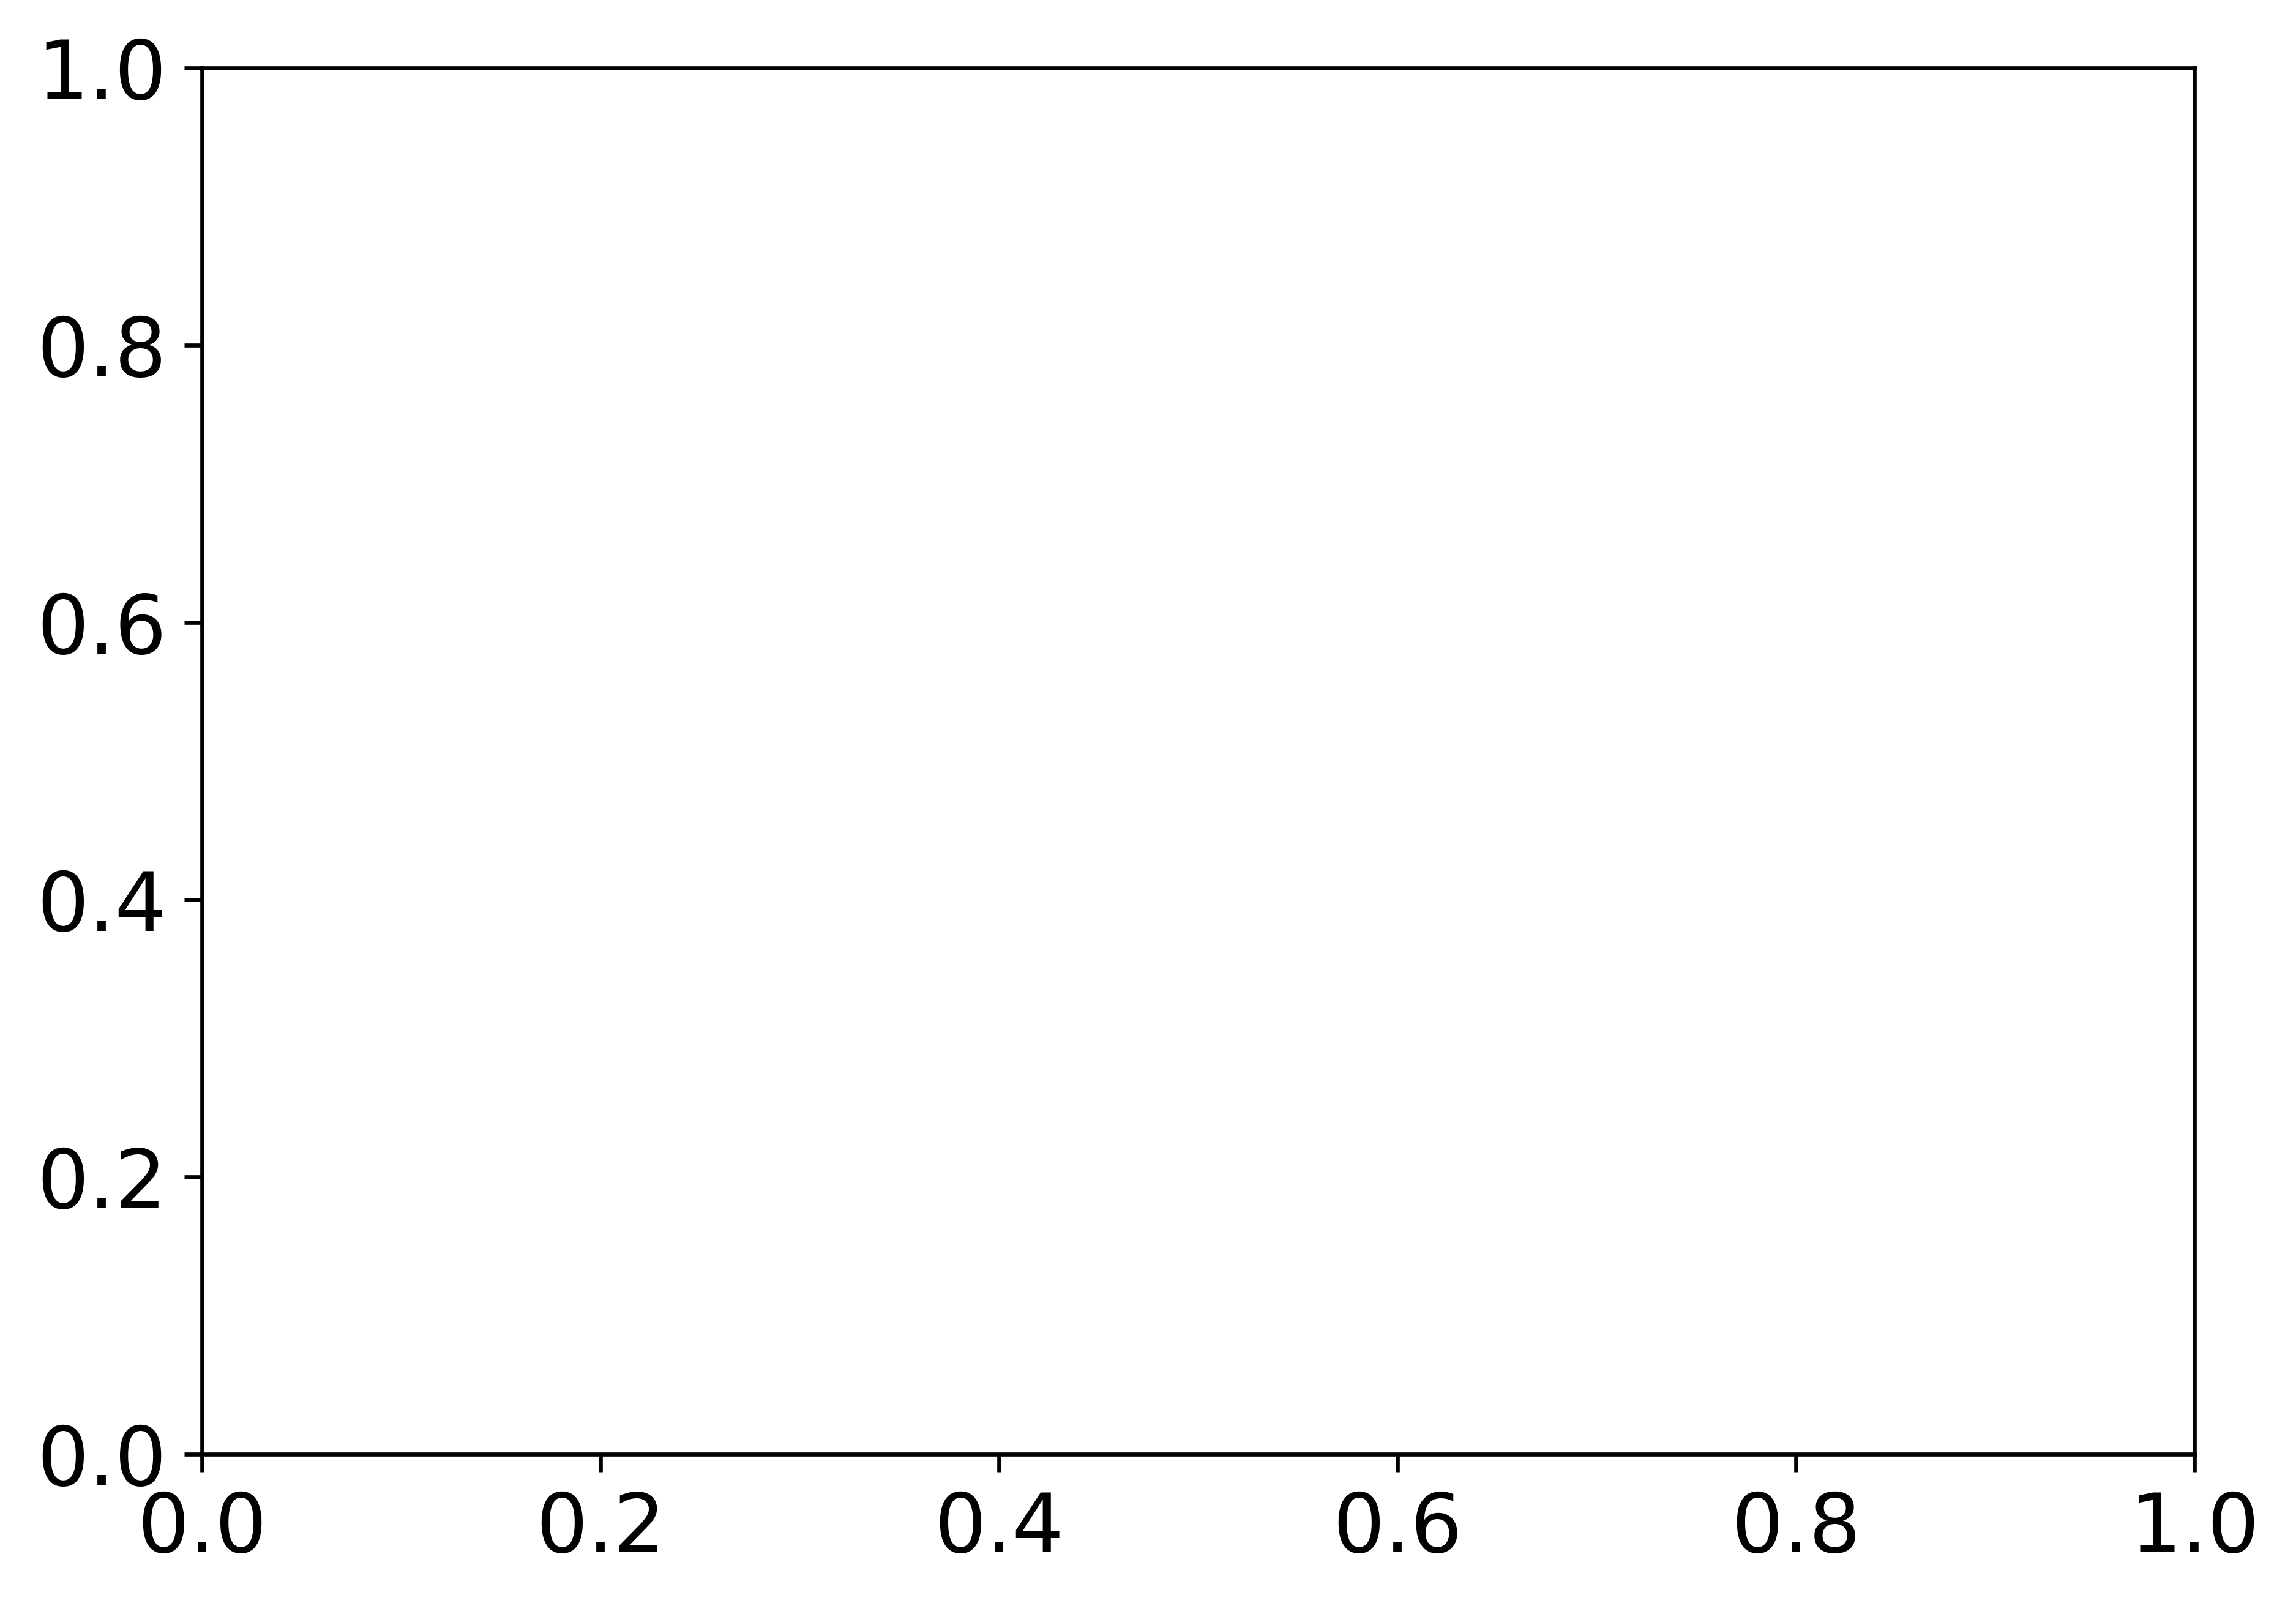

In [36]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 5) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'no_rec'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


#plt.title('No Recommendation, Risk-Averse \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})

plt.grid()
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_ra_n_" + str(N) + ".pdf",
    bbox_inches="tight"
)

### Risk Averse, Rec

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 5) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'partial'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


#plt.title('Recommendation, Risk-Averse \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})

plt.grid()
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_ra_partial_n_" + str(N) + ".pdf",
    bbox_inches="tight"
)

### Risk Averse, Oracle

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df2['alpha'] == 5) & (df2['rho'] == "+str(rho_list[i])+")"
    regime = 'omni'
    x = 'welfare'
    y = 'diversity_score'
    grid_size = 50
    xs = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][x])
    ys = np.array(df2.loc[eval(cond) & (df2['regime'] == regime)][y])
    x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
    x_grid, yhat = nw_fit(regime, cond, 5, x_grid, x, y, df2)
    ax.plot(
        x_grid,
        yhat,
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )
    ax.plot(
        x_grid,
        ls_fit(xs, ys, x_grid),
        color = 'red',
        linewidth=1, linestyle=':'
    )

ax.set_ylim([0, .3])


plt.title('Oracle, Risk-Averse \n',**cfont, fontsize=16)
plt.xlabel('\n' 'Welfare', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
    Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'Nadaraya–Watson kernel regression',
    'OLS Fit',
#     'Recommendation',
#     'Oracle',
]
plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)
plt.grid()
plt.tight_layout()
# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/diversity_welfare_ra_omni_n_" + str(N) + ".pdf",
    bbox_inches="tight"
)

# Diversity and $\rho$, $\beta$

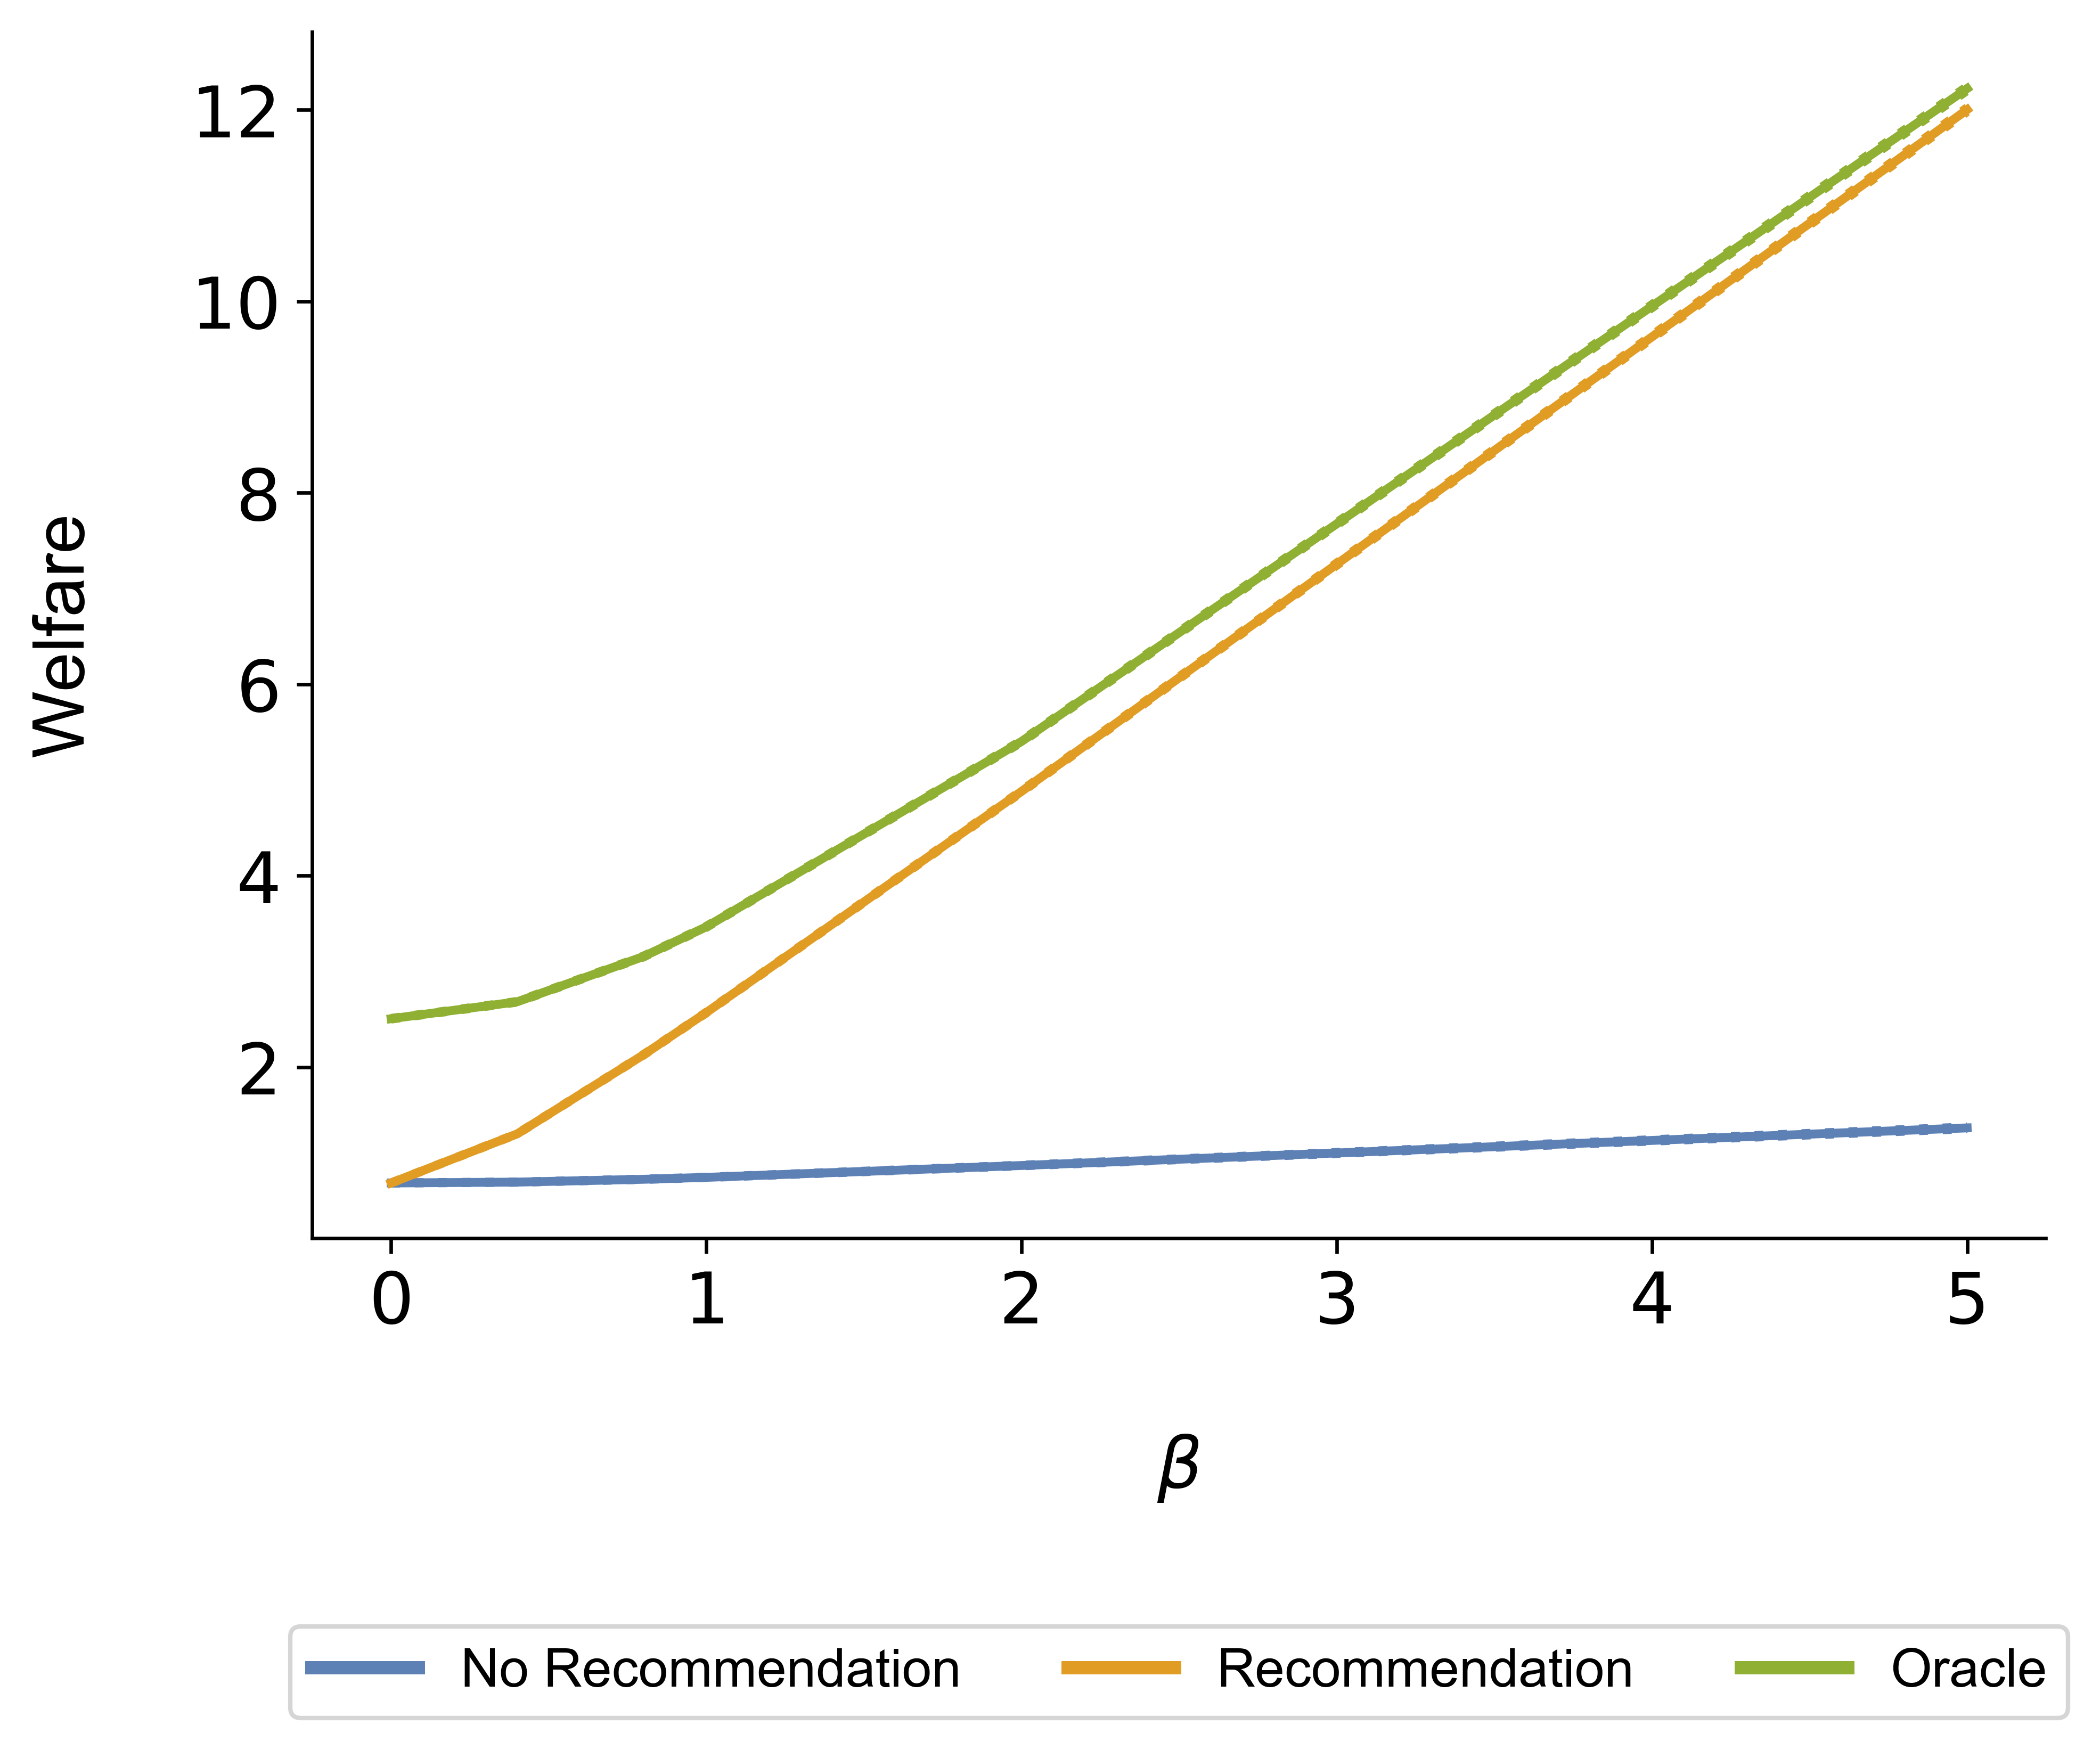

In [51]:

fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = ""
x = 'beta'
y = 'welfare'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    beta_list,
    mean_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    beta_list,
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    beta_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    beta_list,
    mean_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    beta_list,
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    beta_list,
    l_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('partial', cond, x, y, df2),
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    beta_list,
    mean_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    beta_list,
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    beta_list,
    l_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('omni', cond, x, y, df2),
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\beta$', **cfont, fontsize=16)
plt.ylabel('Welfare' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/beta_welfare_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

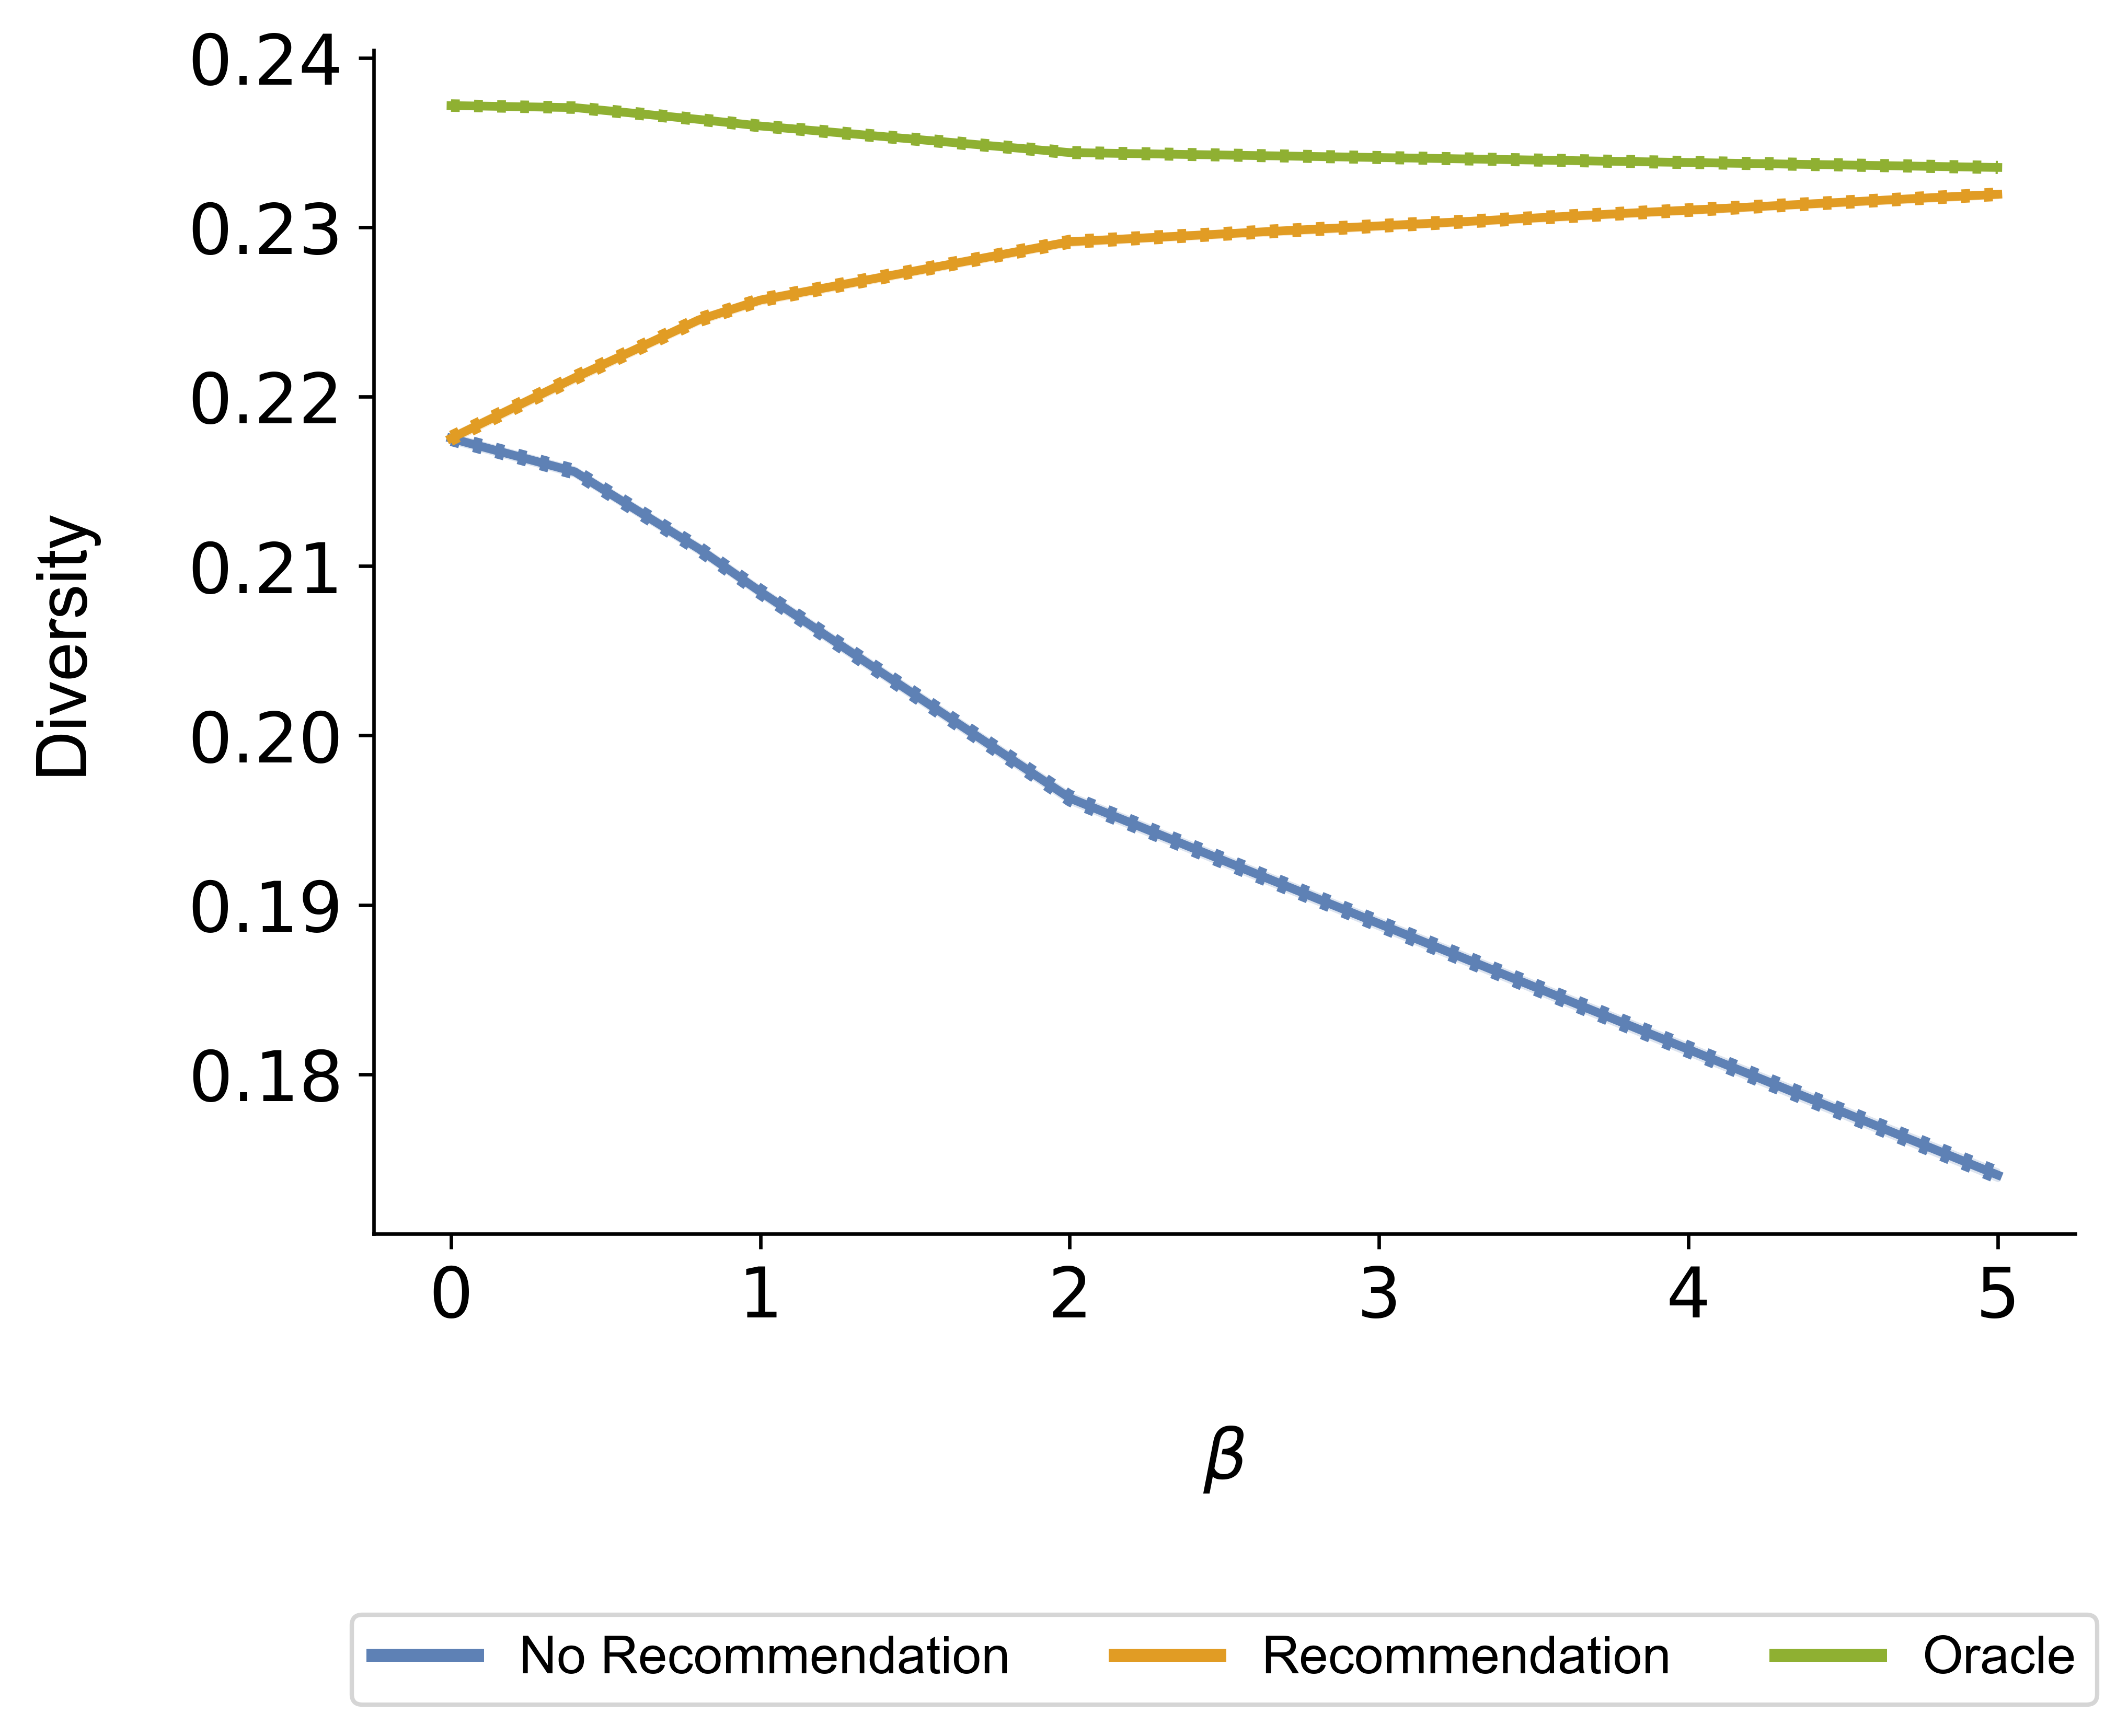

In [49]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = ""
x = 'beta'
y = 'diversity_score'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    beta_list,
    mean_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    beta_list,
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    beta_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    beta_list,
    mean_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    beta_list,
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    beta_list,
    l_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('partial', cond, x, y, df2),
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    beta_list,
    mean_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    beta_list,
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    beta_list,
    l_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('omni', cond, x, y, df2),
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\beta$', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/beta_diversity_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

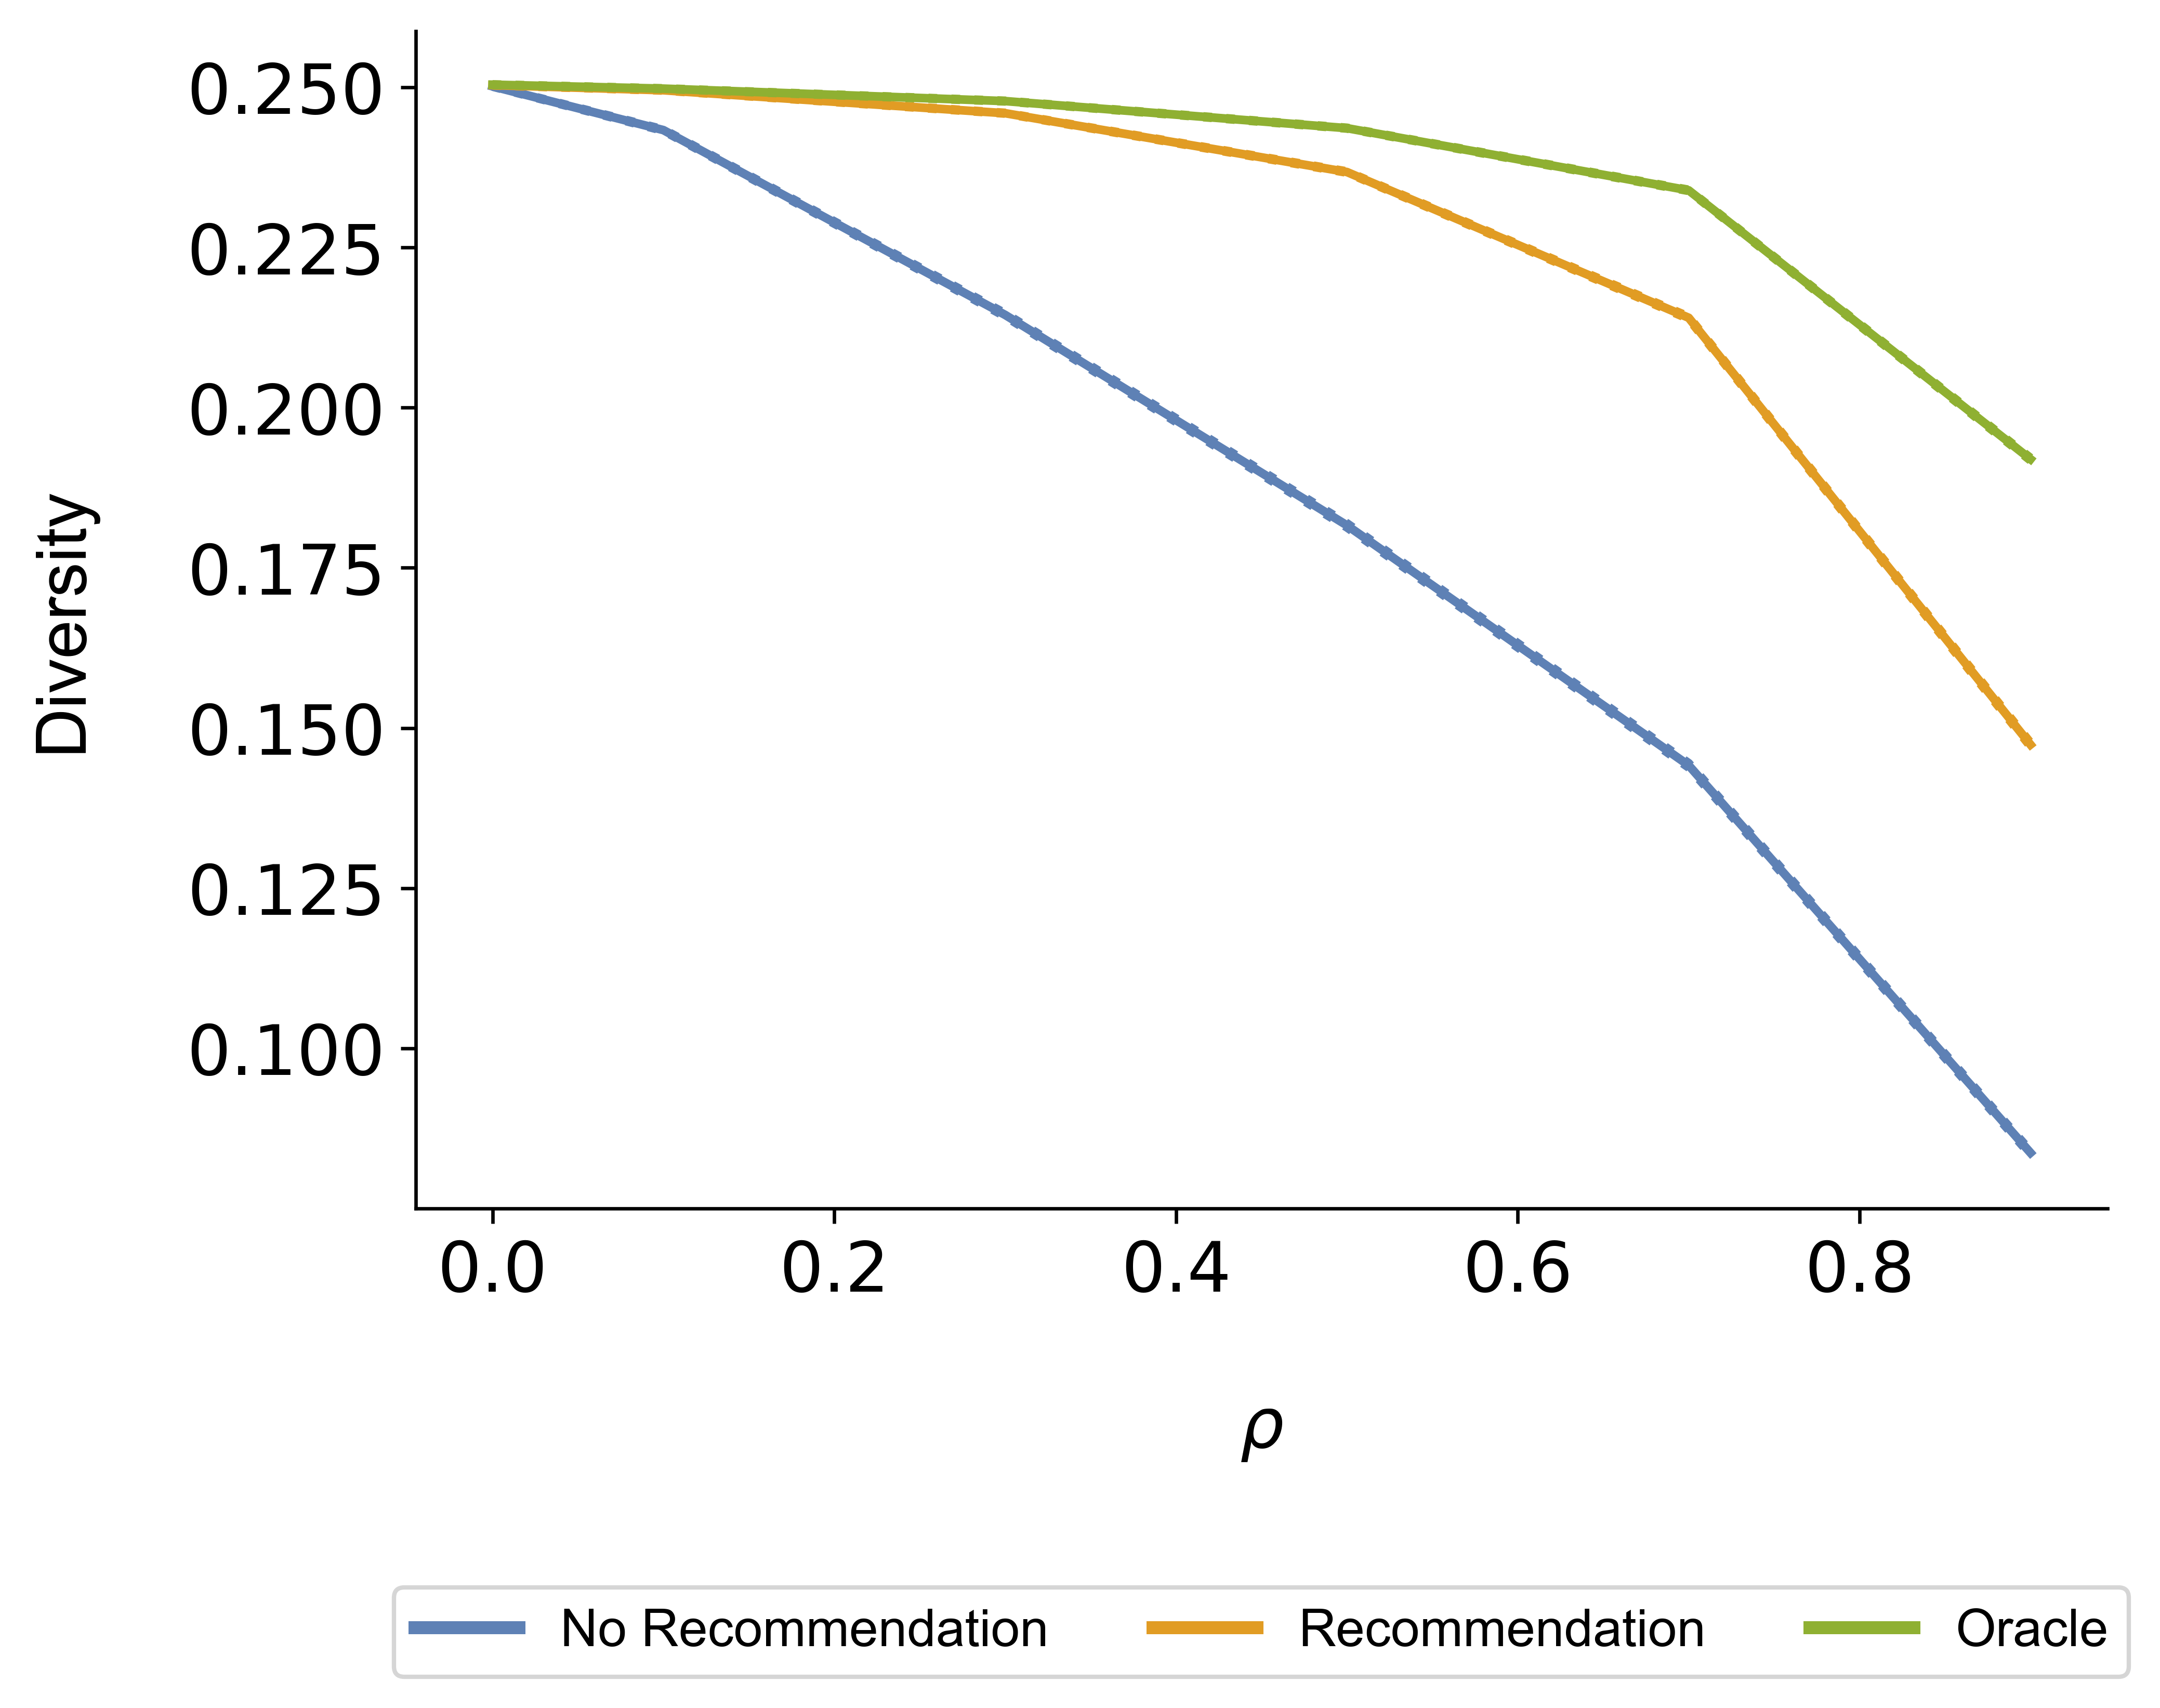

In [52]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df2['beta'] != 0)"
x = 'rho'
y = 'diversity_score'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    rho_list,
    mean_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    rho_list,
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    rho_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    rho_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    rho_list,
    mean_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    rho_list,
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    rho_list,
    l_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    rho_list,
    l_ci_df2('partial', cond, x, y, df2),
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    rho_list,
    mean_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    rho_list,
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    rho_list,
    l_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    rho_list,
    l_ci_df2('omni', cond, x, y, df2),
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\rho$', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_diversity_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

# Diversity and $\gamma$

In [ ]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df2['beta'] != 0)"
x = 'alpha'
y = 'diversity_score'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    gamma_list,
    mean_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    gamma_list,
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    gamma_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    gamma_list,
    l_ci_df2('no_rec', cond, x, y, df2),
    u_ci_df2('no_rec', cond, x, y, df2),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    gamma_list,
    mean_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    gamma_list,
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    gamma_list,
    l_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    gamma_list,
    l_ci_df2('partial', cond, x, y, df2),
    u_ci_df2('partial', cond, x, y, df2),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    gamma_list,
    mean_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    gamma_list,
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    gamma_list,
    l_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    gamma_list,
    l_ci_df2('omni', cond, x, y, df2),
    u_ci_df2('omni', cond, x, y, df2),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\gamma$', **cfont, fontsize=16)
plt.ylabel('Diversity' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/gamma_diversity_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

# Homogeneity

## Import homogeneity_data

In [37]:
df3 = pd.read_csv('homogeneity_data.csv')
dfn = pd.read_csv('homogeneity_data_other_n.csv')
if N == 100:
    df3 = dfn[dfn['N'] == 100]
if N == 500:
    df3 = dfn[dfn['N'] == 500]




HERE


## Homogeneity and $\beta$

In [ ]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = ""
x = 'beta'
y = 'jaccard'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    beta_list,
    mean_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    beta_list,
    u_ci_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    beta_list,
    l_ci_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('no_rec', cond, x, y, df3),
    u_ci_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    beta_list,
    mean_df2('partial', cond, x, y, df3),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    beta_list,
    u_ci_df2('partial', cond, x, y, df3),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    beta_list,
    l_ci_df2('partial', cond, x, y, df3),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('partial', cond, x, y, df3),
    u_ci_df2('partial', cond, x, y, df3),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    beta_list,
    mean_df2('omni', cond, x, y, df3),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    beta_list,
    u_ci_df2('omni', cond, x, y, df3),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    beta_list,
    l_ci_df2('omni', cond, x, y, df3),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    beta_list,
    l_ci_df2('omni', cond, x, y, df3),
    u_ci_df2('omni', cond, x, y, df3),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\beta$', **cfont, fontsize=20)
plt.ylabel('Homogeneity' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/beta_homogeneity_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

## Homogeneity and $\rho$

In [ ]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = ""
x = 'rho'
y = 'jaccard'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    rho_list,
    mean_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    rho_list,
    u_ci_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    rho_list,
    l_ci_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    rho_list,
    l_ci_df2('no_rec', cond, x, y, df3),
    u_ci_df2('no_rec', cond, x, y, df3),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    rho_list,
    mean_df2('partial', cond, x, y, df3),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    rho_list,
    u_ci_df2('partial', cond, x, y, df3),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    rho_list,
    l_ci_df2('partial', cond, x, y, df3),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    rho_list,
    l_ci_df2('partial', cond, x, y, df3),
    u_ci_df2('partial', cond, x, y, df3),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    rho_list,
    mean_df2('omni', cond, x, y, df3),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    rho_list,
    u_ci_df2('omni', cond, x, y, df3),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    rho_list,
    l_ci_df2('omni', cond, x, y, df3),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    rho_list,
    l_ci_df2('omni', cond, x, y, df3),
    u_ci_df2('omni', cond, x, y, df3),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')
# ax.set_ylim([0.4, 1])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$\rho$', **cfont, fontsize=20)
plt.ylabel('Homogeneity' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_homogeneity_N_" + str(N) + "_T_20.pdf",
    bbox_inches="tight"
)

# Time Paths

## Import time_path

In [ ]:
df4 = pd.read_csv('time_path.csv')
dfn = pd.read_csv('time_path_other_n.csv')
if N == 100:
    df4 = dfn[dfn['N'] == 100]
if N == 500:
    df4 = dfn[dfn['N'] == 500]



## Functions

## Overal Time Paths and $\rho=0$

In [ ]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df4['rho'] == 0) & (df4['t'] >0)"
x = 't'
y = 'mean_consumption_dist'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    range(1,20),
    mean_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    range(1,20),
    u_ci_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    range(1,20),
    l_ci_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    range(1,20),
    l_ci_df2('no_rec', cond, x, y, df4),
    u_ci_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    range(1,20),
    mean_df2('partial', cond, x, y, df4),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    range(1,20),
    u_ci_df2('partial', cond, x, y, df4),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    range(1,20),
    l_ci_df2('partial', cond, x, y, df4),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    range(1,20),
    l_ci_df2('partial', cond, x, y, df4),
    u_ci_df2('partial', cond, x, y, df4),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    range(1,20),
    mean_df2('omni', cond, x, y, df4),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    range(1,20),
    u_ci_df2('omni', cond, x, y, df4),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    range(1,20),
    l_ci_df2('omni', cond, x, y, df4),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    range(1,20),
    l_ci_df2('omni', cond, x, y, df4),
    u_ci_df2('omni', cond, x, y, df4),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')

ax.set_ylim([0, (N / 4) + 5])

# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency
plt.xticks(np.arange(0, 20+1, 2.0))

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_zero_consumption_dist_N_" + str(N) + "T_20_overall.pdf",
    bbox_inches="tight"
)

In [ ]:
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

cond = "(df4['rho'] > 0) & (df4['t'] >0)"
x = 't'
y = 'mean_consumption_dist'

ax = fig.add_subplot(1, 1, 1)
l1 = ax.plot(
    range(1,20),
    mean_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    linewidth=2, linestyle='-'
)
l1u = ax.plot(
    range(1,20),
    u_ci_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
l1b = ax.plot(
    range(1,20),
    l_ci_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    range(1,20),
    l_ci_df2('no_rec', cond, x, y, df4),
    u_ci_df2('no_rec', cond, x, y, df4),
    color = mycolor1,
    alpha = 0.2, label = '95% CI')

l2 = ax.plot(
    range(1,20),
    mean_df2('partial', cond, x, y, df4),
    color = mycolor2,
    linewidth=2, linestyle='-'
)
l2u = ax.plot(
    range(1,20),
    u_ci_df2('partial', cond, x, y, df4),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
l2b = ax.plot(
    range(1,20),
    l_ci_df2('partial', cond, x, y, df4),
    color = mycolor2,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    range(1,20),
    l_ci_df2('partial', cond, x, y, df4),
    u_ci_df2('partial', cond, x, y, df4),
    color = mycolor2,
    alpha = 0.2, label = '95% CI')

l3 = ax.plot(
    range(1,20),
    mean_df2('omni', cond, x, y, df4),
    color = mycolor3,
    linewidth=2, linestyle='-'
)
l3u = ax.plot(
    range(1,20),
    u_ci_df2('omni', cond, x, y, df4),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
l3b = ax.plot(
    range(1,20),
    l_ci_df2('omni', cond, x, y, df4),
    color = mycolor3,
    linewidth=2, linestyle=':'
)
ax.fill_between(
    range(1,20),
    l_ci_df2('omni', cond, x, y, df4),
    u_ci_df2('omni', cond, x, y, df4),
    color = mycolor3,
    alpha = 0.2, label = '95% CI')

ax.set_ylim([0, (N / 4) + 5])


# plt.title('Row \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=20)
plt.ylabel('Avg Consecutive' 'Consumption Distance' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency
plt.xticks(np.arange(0, 20+1, 2))

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


# cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
# cbar = fig.colorbar(
#     CS3, 
#     shrink=0.25, aspect=5, 
#     orientation="vertical", 
#     pad=0.5, 
#     cax = cbar_ax,
# )
# cbar.ax.set_yticklabels(x_list)
# cbar.set_label('\n' r'Value of $x$', rotation=90, fontsize =12)

lines = [
    Line2D([0], [0], color=mycolor1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='black', linewidth=2, linestyle=':'),
    Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
    Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
]
labels = [
    'No Recommendation',
#     '95% Confidence Intervals',
    'Recommendation',
    'Oracle',
]
plt.legend(lines, labels,loc=9, bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 16, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_pos_consumption_dist_N_" + str(N) + "T_20_overall.pdf",
    bbox_inches="tight"
)

## Time Paths and $\rho$: No Rec

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df4['rho'] == "+str(rho_list[i])+")"
    regime = 'no_rec'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('No Recommendation \n',**cfont, fontsize=16)
plt.xlabel('\n'r'$t$', **cfont, fontsize=20)
plt.ylabel('Avg Consecutive' 'Consumption Distance' '\n', **cfont, fontsize=20)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =16)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_consumption_dist_N_" + str(N) + "T_20.pdf",
    bbox_inches="tight"
)

## Time Paths and $\rho$: Rec

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df4['rho'] == "+str(rho_list[i])+")"
    regime = 'partial'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('Recommendation \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_consumption_dist_N_" + str(N) + "T_20_partial.pdf",
    bbox_inches="tight"
)

## Time Paths and $\rho$: Oracle

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(rho_list)))[0:3] for i in range(1,len(rho_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(rho_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(rho_list)):
    cond = "(df4['rho'] == "+str(rho_list[i])+")"
    regime = 'omni'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(rho_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('Oracle \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(rho_list)
cbar.set_label('\n' r'$\rho$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/rho_consumption_dist_N_" + str(N) + "T_20_omni.pdf",
    bbox_inches="tight"
)

## Time Paths and $\gamma$: No Rec

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3] for i in range(1,len(gamma_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(gamma_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(gamma_list)):
    cond = "(df4['alpha'] == "+str(gamma_list[i])+")"
    regime = 'no_rec'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('No Recommendation \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(gamma_list)
cbar.set_label('\n' r'$\gamma$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/gamma_consumption_dist_N_" + str(N) + "T_20.pdf",
    bbox_inches="tight"
)

## Time Paths and $\gamma$: Rec

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3] for i in range(1,len(gamma_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(gamma_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(gamma_list)):
    cond = "(df4['alpha'] == "+str(gamma_list[i])+")"
    regime = 'partial'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('Recommendation \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(gamma_list)
cbar.set_label('\n' r'$\gamma$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/gamma_consumption_dist_N_" + str(N) + "T_20_partial.pdf",
    bbox_inches="tight"
)

## Time Paths and $\gamma$: Oracle

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3] for i in range(1,len(gamma_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(gamma_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(gamma_list)):
    cond = "(df4['alpha'] == "+str(gamma_list[i])+")"
    regime = 'omni'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('Oracle \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(gamma_list)
cbar.set_label('\n' r'$\gamma$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/gamma_consumption_dist_N_" + str(N) + "T_20_omni.pdf",
    bbox_inches="tight"
)

## Time Paths and $\beta$: No Rec

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3] for i in range(1,len(gamma_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(beta_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(beta_list)):
    cond = "(df4['beta'] == "+str(beta_list[i])+")"
    regime = 'no_rec'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(beta_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('No Recommendation \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(gamma_list)
cbar.set_label('\n' r'Value of $\beta$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/beta_consumption_dist_N_" + str(N) + "T_20.pdf",
    bbox_inches="tight"
)

In [ ]:
color_cm1 = cm.get_cmap('inferno')(3/(len(rho_list)))[0:3]
fig = plt.figure(figsize=(7, 5), dpi=600)
cfont = {'fontname':'Arial'}
legfont = {'family':'Arial'}
hfont = {'fontname':'Helvetica'}
# plt.suptitle('Convergence \n',**cfont, fontsize=16, y=1.05)

mycmap = colors.ListedColormap([cm.get_cmap('inferno')(i/(len(gamma_list)))[0:3] for i in range(1,len(gamma_list)+1)])
Z = [[0,0],[0,0]]
levels = range(1,len(beta_list)+1)
CS3 = plt.contourf(Z, levels, cmap=mycmap)
plt.clf()

ax = fig.add_subplot(1, 1, 1)
for i in range(len(beta_list)):
    cond = "(df4['beta'] == "+str(beta_list[i])+")"
    regime = 'partial'
    x = 't'
    y = 'mean_consumption_dist'
    ax.plot(
        range(20),
        mean_df2(regime, cond, x, y, df4),
        color = cm.get_cmap('inferno')(i/(len(beta_list)))[0:3],
        linewidth=2, linestyle='-'
    )


ax.set_ylim([0, (N / 4) + 5])


plt.title('No Recommendation \n',**cfont, fontsize=16)
plt.xlabel('\n' r'$t$', **cfont, fontsize=16)
plt.ylabel('Avg Consecutive Consumption Distance' '\n', **cfont, fontsize=16)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set tick frequency

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


cbar_ax = fig.add_axes([1.0, .1, 0.025, 0.75])
cbar = fig.colorbar(
    CS3, 
    shrink=0.25, aspect=5, 
    orientation="vertical", 
    pad=0.5, 
    cax = cbar_ax,
)
cbar.ax.set_yticklabels(gamma_list)
cbar.set_label('\n' r'Value of $\beta$', rotation=90, fontsize =12)

# lines = [
#     Line2D([0], [0], color=color_cm1, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color='red', linewidth=1, linestyle=':'),
#     Line2D([0], [0], color=mycolor2, linewidth=3, linestyle='-'),
#     Line2D([0], [0], color=mycolor3, linewidth=3, linestyle='-'),
# ]
# labels = [
#     'Nadaraya–Watson kernel regression',
#     'OLS Fit',
#     'Recommendation',
#     'Oracle',
# ]
# plt.legend(lines, labels, loc=0, bbox_to_anchor=(-5, -0.2), ncol=3, prop={'size': 12, **legfont})


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)

# Display the plot
plt.show()

fig.savefig(
    "../paper/figures/beta_consumption_dist_N_" + str(N) + "T_20.pdf",
    bbox_inches="tight"
)

# Scrap

In [ ]:
cond = "(df['gamma'] == 5) & (df['rho'] == .7)"
regime = 'Partial'
x = 'pop_welfare_avg'
y = 'pop_diversity_avg'
grid_size = 50
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
x_grid = np.linspace(np.quantile(xs, .025),np.quantile(xs, .975),grid_size)
corr_hp = pearsonr(xs,ys)[0]
x_grid_hp, yhat_hp = nw_fit(regime, cond, 5, x_grid, x, y)

In [ ]:
for rho in [0, .3, .5, .7]:
    cond = "(df['gamma'] == 0) & (df['rho'] == "+str(rho)+")"
    regime = 'No Rec'
    x_grid, yhat = nw_fit(regime, cond, 10)
    plt.plot(x_grid, yhat)

In [ ]:
xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])

In [ ]:
for rho in [0, .3, .5, .7]:
    cond = "(df['gamma'] == 5) & (df['rho'] == "+str(rho)+")"
    regime = 'No Rec'
    x_grid, yhat = nw_fit(regime, cond, 10)
    plt.plot(x_grid, yhat)
    xs = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][x])
    ys = np.array(df.loc[eval(cond) & (df['formatted_regime'] == regime)][y])
    print(pearsonr(xs,ys)[0])

In [ ]:
for rho in [0, .3, .5, .7]:
    cond = "(df['gamma'] == 0) & (df['rho'] == "+str(rho)+")"
    regime = 'Partial'
    x_grid, yhat = nw_fit(regime, cond, 10)
    plt.plot(x_grid, yhat)

In [ ]:
for rho in [0, .3, .5, .7]:
    cond = "(df['gamma'] == 5) & (df['rho'] == "+str(rho)+")"
    regime = 'Partial'
    x_grid, yhat = nw_fit(regime, cond, 10)
    plt.plot(x_grid, yhat)

In [ ]:
for rho in [0, .3, .5, .7]:
    cond = "(df['gamma'] == 0) & (df['rho'] == "+str(rho)+")"
    regime = 'Omniscient'
    x_grid, yhat = nw_fit(regime, cond, 10)
    plt.plot(x_grid, yhat)

In [ ]:
for rho in [0, .3, .5, .7]:
    cond = "(df['gamma'] == 5) & (df['rho'] == "+str(rho)+")"
    regime = 'Omniscient'
    x_grid, yhat = nw_fit(regime, cond, 10)
    plt.plot(x_grid, yhat)

In [ ]:
cond = "(df['gamma'] == 0) & (df['rho'] == .3) & (df['beta'] == 0) & (df['sigma'] == 1)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .3) & (df['beta'] == 1) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .3) & (df['beta'] == 5) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)


cond = "(df['gamma'] == 0) & (df['rho'] == .3) & (df['beta'] == 0) & (df['sigma'] == 4)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .3) & (df['beta'] == 1) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .3) & (df['beta'] == 5) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)



In [ ]:
cond = "(df['gamma'] == 0) & (df['rho'] == .9) & (df['beta'] == 0) & (df['sigma'] == 1)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .9) & (df['beta'] == 1) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .9) & (df['beta'] == 5) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)

cond = "(df['gamma'] == 0) & (df['rho'] == .9) & (df['beta'] == 0) & (df['sigma'] == 4)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .9) & (df['beta'] == 1) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 0) & (df['rho'] == .9) & (df['beta'] == 5) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)

In [ ]:
cond = "(df['gamma'] == 5) & (df['rho'] == .1) & (df['beta'] == 0) & (df['sigma'] == 1)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .1) & (df['beta'] == 1) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .1) & (df['beta'] == 5) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)


cond = "(df['gamma'] == 5) & (df['rho'] == .1) & (df['beta'] == 0) & (df['sigma'] == 4)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .1) & (df['beta'] == 1) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .1) & (df['beta'] == 5) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 1)
plt.plot(x_grid, yhat)



In [ ]:
cond = "(df['gamma'] == 5) & (df['rho'] == .9) & (df['beta'] == 0) & (df['sigma'] == 1)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .9) & (df['beta'] == 1) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .9) & (df['beta'] == 5) & (df['sigma'] == 1)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)

cond = "(df['gamma'] == 5) & (df['rho'] == .9) & (df['beta'] == 0) & (df['sigma'] == 4)"
regime = 'No Rec'
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .9) & (df['beta'] == 1) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)
cond = "(df['gamma'] == 5) & (df['rho'] == .9) & (df['beta'] == 5) & (df['sigma'] == 4)"
x_grid, yhat = nw_fit(regime, cond, 3)
plt.plot(x_grid, yhat)

In [ ]:
import binscatter